## Exploratory Data Analysis

    Purpose : 
        - Understand the data
        - Understand relationship between train-test set
        - Extract Feature Generation Ideas
        
    Prerequisites:
        - train_ver2.csv
        - test_ver2.csv
        - labels.csv

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# record time
def print_time(end, start):
    print '='*50
    elapsed = end - start
    print '{} secs'.format(round(elapsed))

### 01 General

In [3]:
st = time.time()
# load data
trn = pd.read_csv('../input/train_ver2.csv')

# check column names
print '='*50
print 'trn.columns:\n',trn.columns

# check head
print '='*50
print 'trn.head():\n', trn.head()

# check overall stat
print '='*50
print 'trn.info():\n',trn.info()

print_time(time.time(),st)
# 125 secs

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


trn.columns:
Index([u'fecha_dato', u'ncodpers', u'ind_empleado', u'pais_residencia',
       u'sexo', u'age', u'fecha_alta', u'ind_nuevo', u'antiguedad', u'indrel',
       u'ult_fec_cli_1t', u'indrel_1mes', u'tiprel_1mes', u'indresi',
       u'indext', u'conyuemp', u'canal_entrada', u'indfall', u'tipodom',
       u'cod_prov', u'nomprov', u'ind_actividad_cliente', u'renta',
       u'segmento', u'ind_ahor_fin_ult1', u'ind_aval_fin_ult1',
       u'ind_cco_fin_ult1', u'ind_cder_fin_ult1', u'ind_cno_fin_ult1',
       u'ind_ctju_fin_ult1', u'ind_ctma_fin_ult1', u'ind_ctop_fin_ult1',
       u'ind_ctpp_fin_ult1', u'ind_deco_fin_ult1', u'ind_deme_fin_ult1',
       u'ind_dela_fin_ult1', u'ind_ecue_fin_ult1', u'ind_fond_fin_ult1',
       u'ind_hip_fin_ult1', u'ind_plan_fin_ult1', u'ind_pres_fin_ult1',
       u'ind_reca_fin_ult1', u'ind_tjcr_fin_ult1', u'ind_valo_fin_ult1',
       u'ind_viv_fin_ult1', u'ind_nomina_ult1', u'ind_nom_pens_ult1',
       u'ind_recibo_ult1'],
      dtype='object')
trn.he

In [4]:
st = time.time()
# observe numerical columns
num_cols = ['ncodpers','ind_nuevo','indrel','tipodom', \
            'cod_prov','ind_actividad_cliente','renta', \
            'age','antiguedad']
print trn[num_cols].describe()

print_time(time.time(),st)
# 11 secs

           ncodpers     ind_nuevo        indrel     tipodom      cod_prov  \
count  1.364731e+07  1.361958e+07  1.361958e+07  13619574.0  1.355372e+07   
mean   8.349042e+05  5.956184e-02  1.178399e+00         1.0  2.657147e+01   
std    4.315650e+05  2.366733e-01  4.177469e+00         0.0  1.278402e+01   
min    1.588900e+04  0.000000e+00  1.000000e+00         1.0  1.000000e+00   
25%    4.528130e+05  0.000000e+00  1.000000e+00         1.0  1.500000e+01   
50%    9.318930e+05  0.000000e+00  1.000000e+00         1.0  2.800000e+01   
75%    1.199286e+06  0.000000e+00  1.000000e+00         1.0  3.500000e+01   
max    1.553689e+06  1.000000e+00  9.900000e+01         1.0  5.200000e+01   

       ind_actividad_cliente         renta  
count           1.361958e+07  1.085293e+07  
mean            4.578105e-01  1.342543e+05  
std             4.982169e-01  2.306202e+05  
min             0.000000e+00  1.202730e+03  
25%             0.000000e+00  6.871098e+04  
50%             0.000000e+00  1.0185

In [5]:
st = time.time()
# observe categorical columns
cat_cols = ['fecha_dato','ind_empleado','pais_residencia', \
            'sexo','fecha_alta','ult_fec_cli_1t','indrel_1mes', \
            'tiprel_1mes','indresi','indext','conyuemp', \
            'canal_entrada','indfall','nomprov','segmento']

# num_unique, unique set
for col in cat_cols:
    uniq = np.unique(trn[col])
    print '-'*50
    print '# col {}\t n_uniq {}\t unique {}'.format(col, len(uniq), uniq)

print_time(time.time(),st)
# 184 secs

--------------------------------------------------
# col fecha_dato	 n_uniq 17	 unique ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']


/Users/jungkweonwoo/Library/Python/2.7/lib/python/site-packages/numpy/lib/arraysetops.py:216: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


--------------------------------------------------
# col ind_empleado	 n_uniq 6	 unique [nan 'A' 'B' 'F' 'N' 'S']
--------------------------------------------------
# col pais_residencia	 n_uniq 119	 unique [nan 'AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ' 'DE'
 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB' 'GE' 'GH'
 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE' 'IL' 'IN' 'IS'
 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU' 'LV' 'LY' 'MA' 'MD'
 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL' 'NO' 'NZ' 'OM' 'PA' 'PE'
 'PH' 'PK' 'PL' 'PR' 'PT' 'PY' 'QA' 'RO' 'RS' 'RU' 'SA' 'SE' 'SG' 'SK' 'SL'
 'SN' 'SV' 'TG' 'TH' 'TN' 'TR' 'TW' 'UA' 'US' 'UY' 'VE' 'VN' 'ZA' 'ZW']
--------------------------------------------------
# col sexo	 n_uniq 3	 unique [nan 'H' 'V']
--------------------------------------------------
# col fecha_alta	 n_uniq 6757	 unique [nan '1

### 02 Histogram

col :  fecha_dato


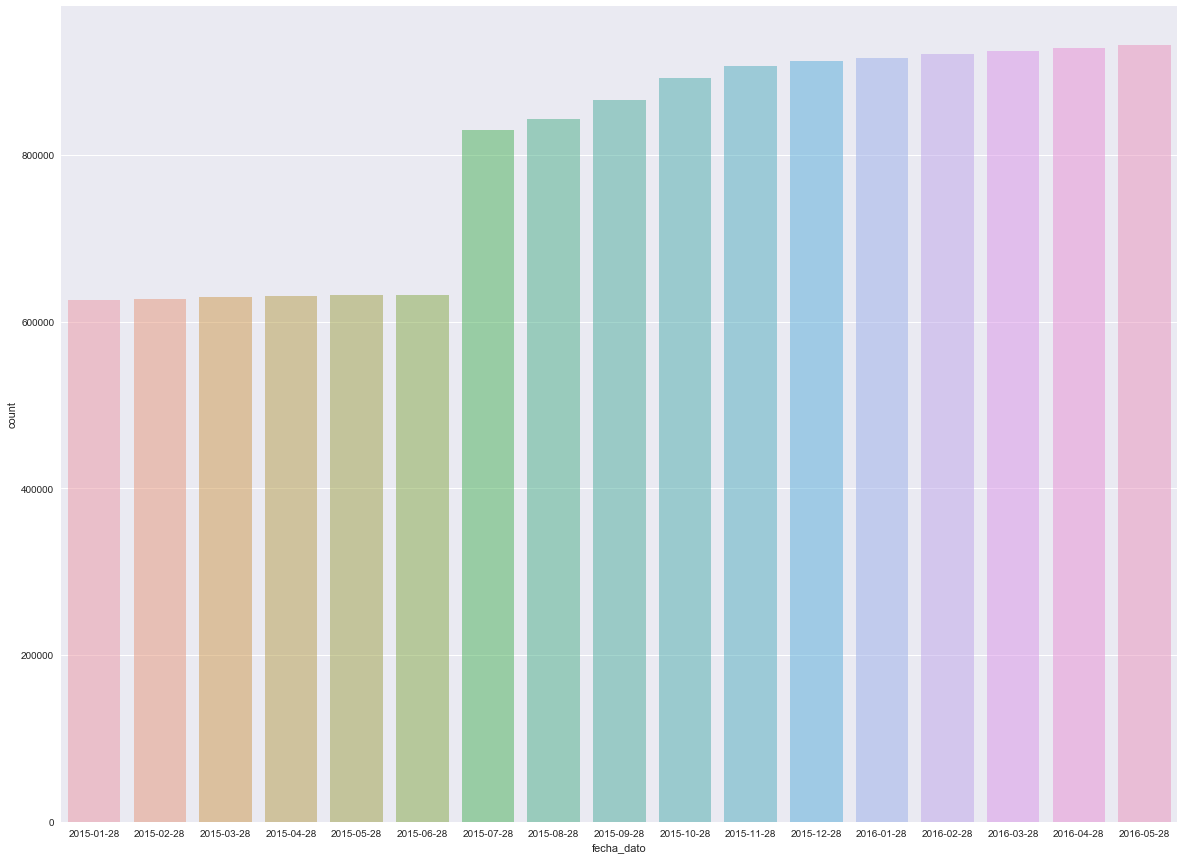

col :  ind_empleado


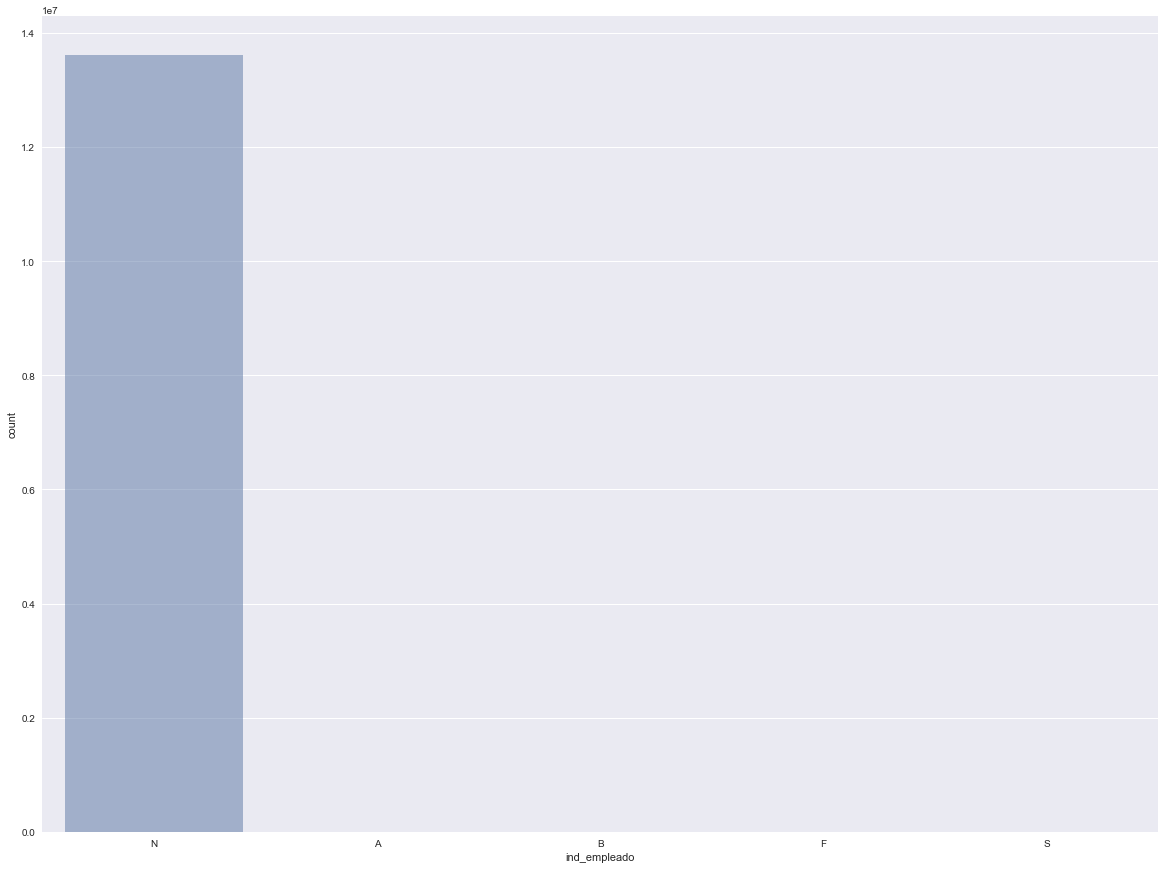

col :  pais_residencia


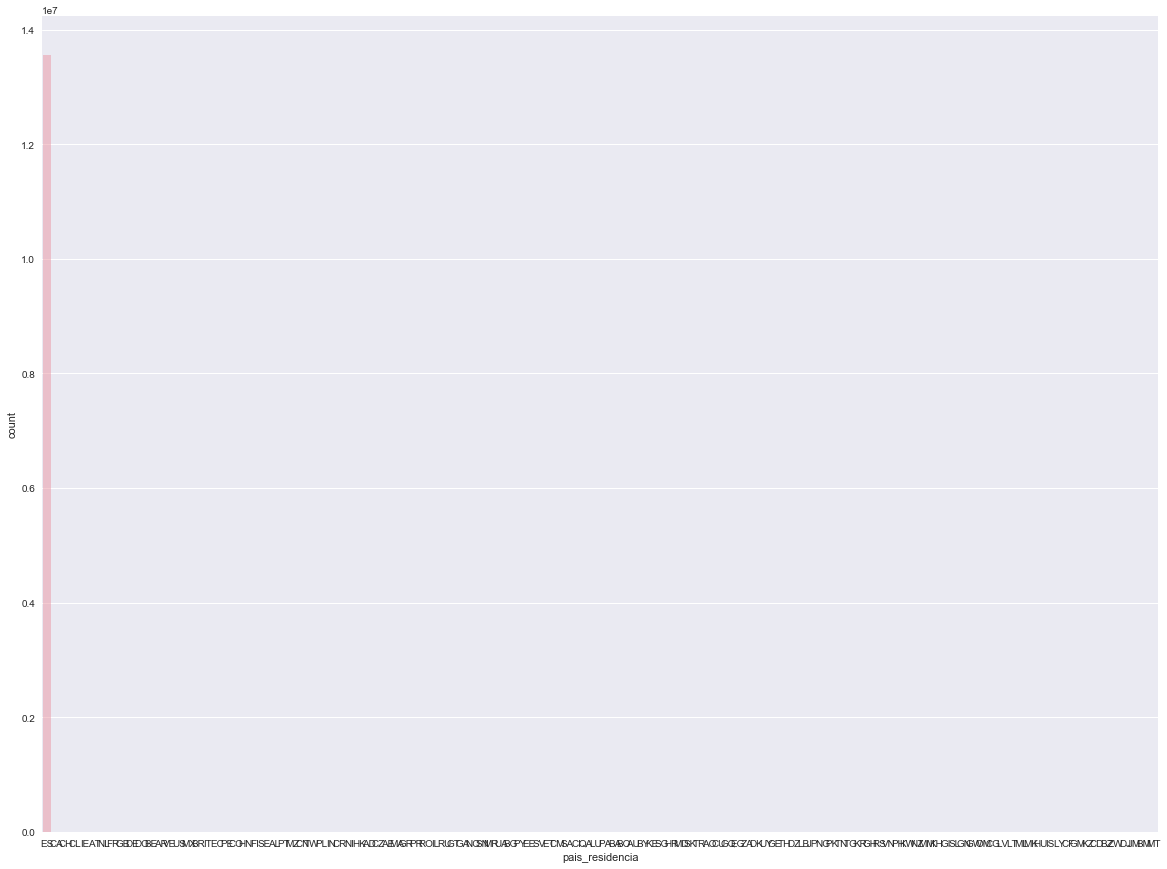

col :  sexo


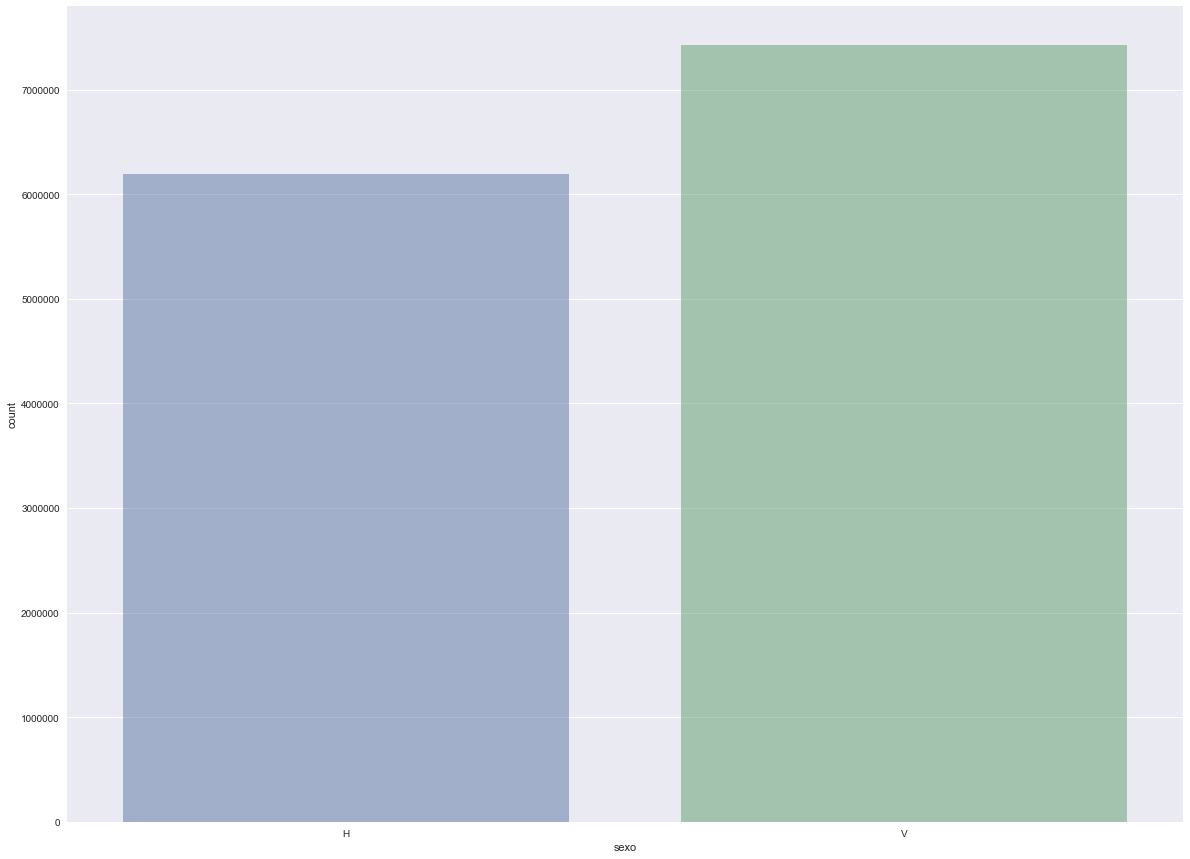

col :  age


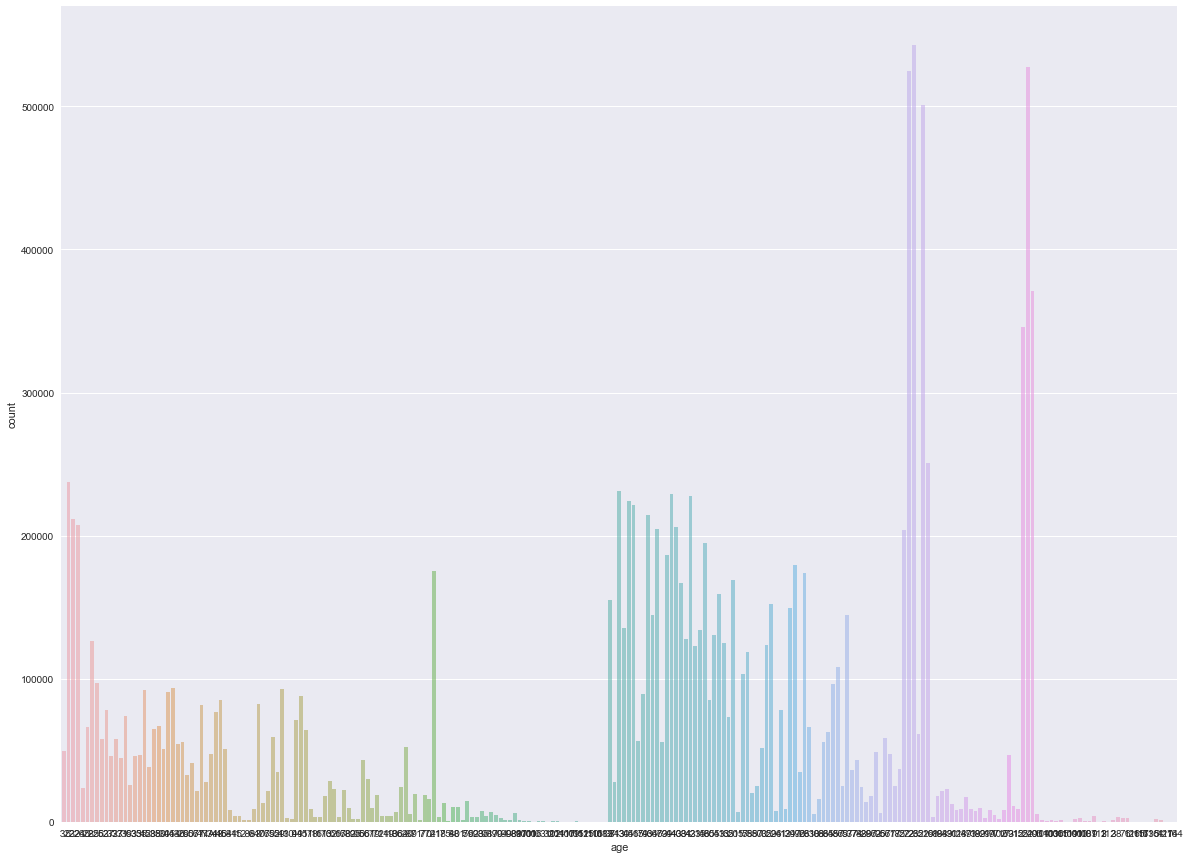

col :  fecha_alta


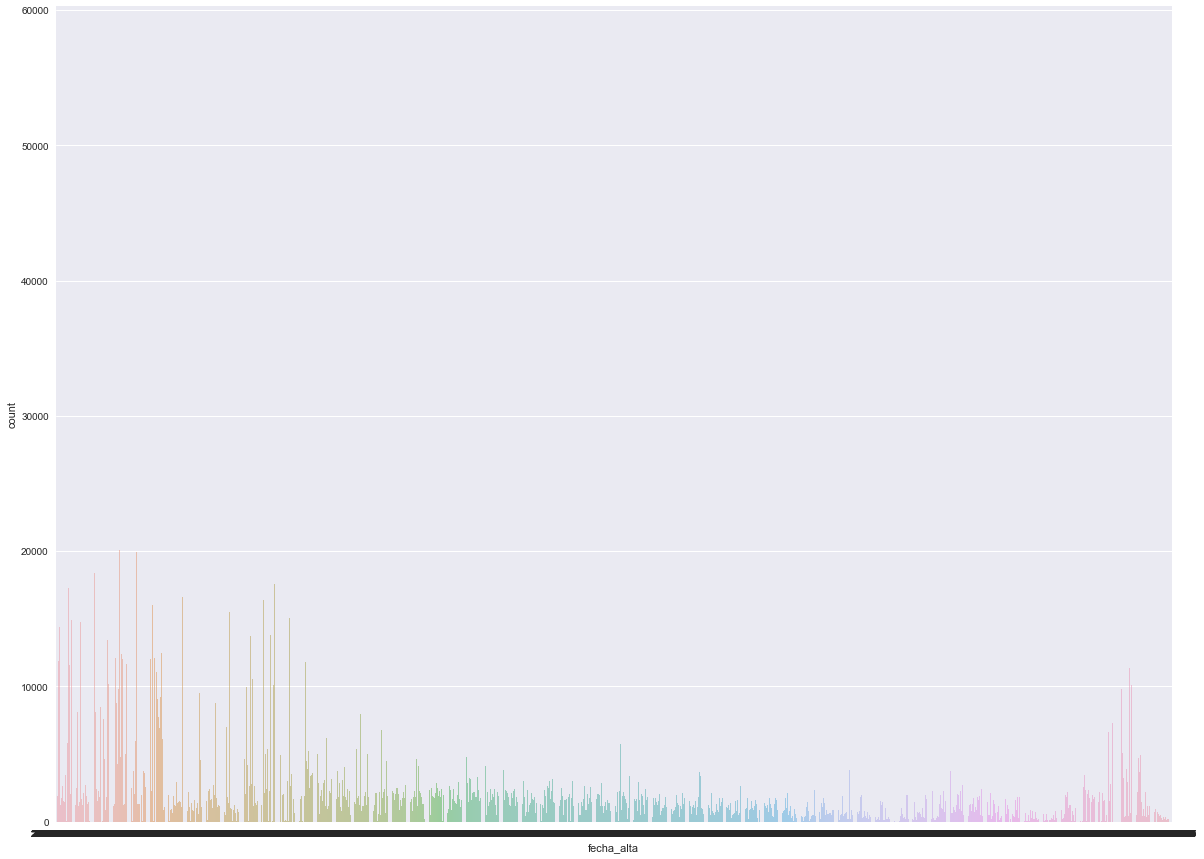

col :  ind_nuevo


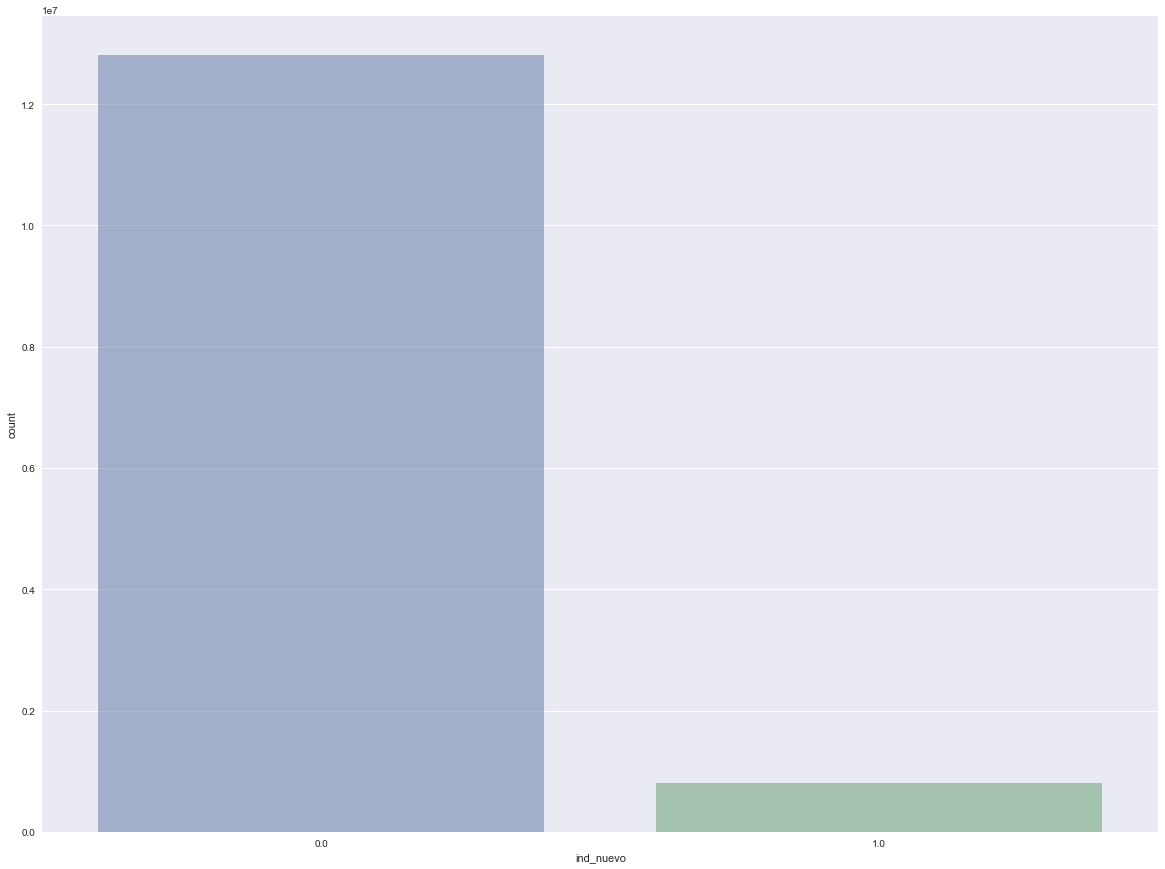

col :  antiguedad


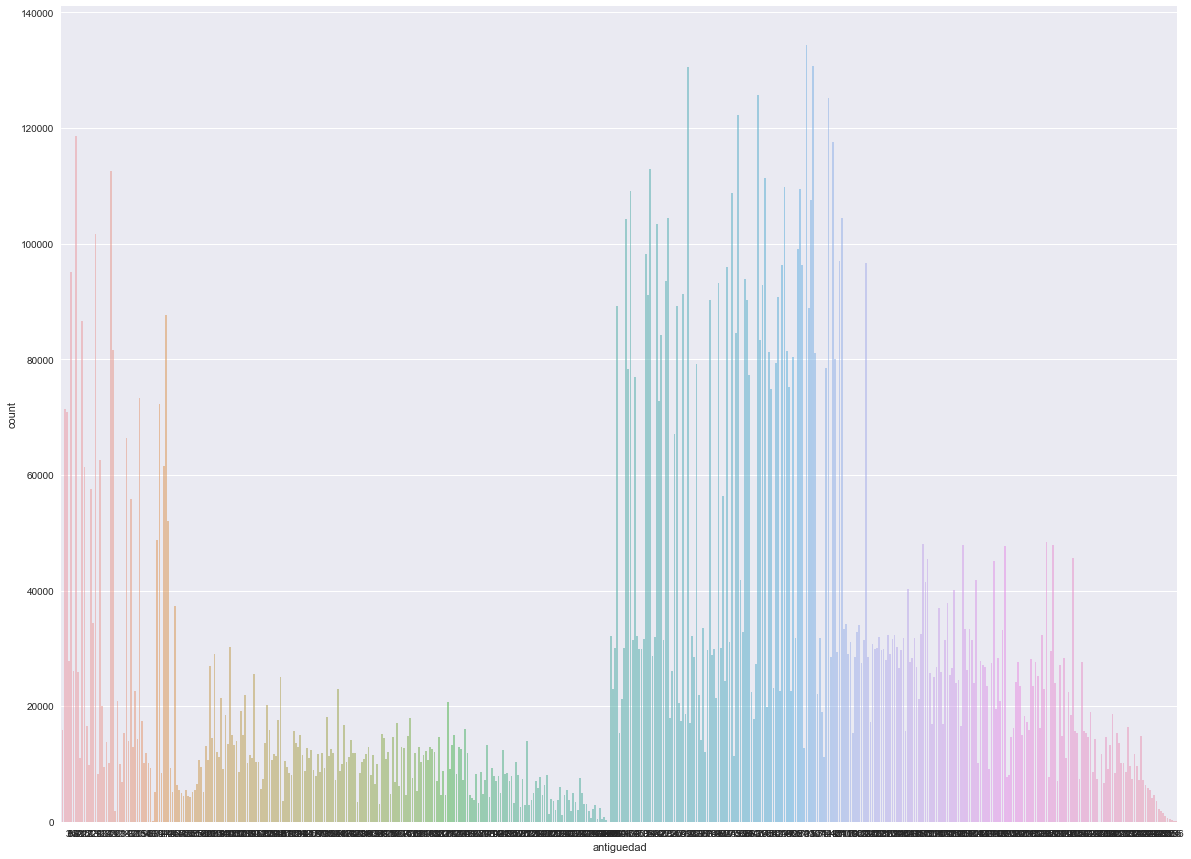

col :  indrel


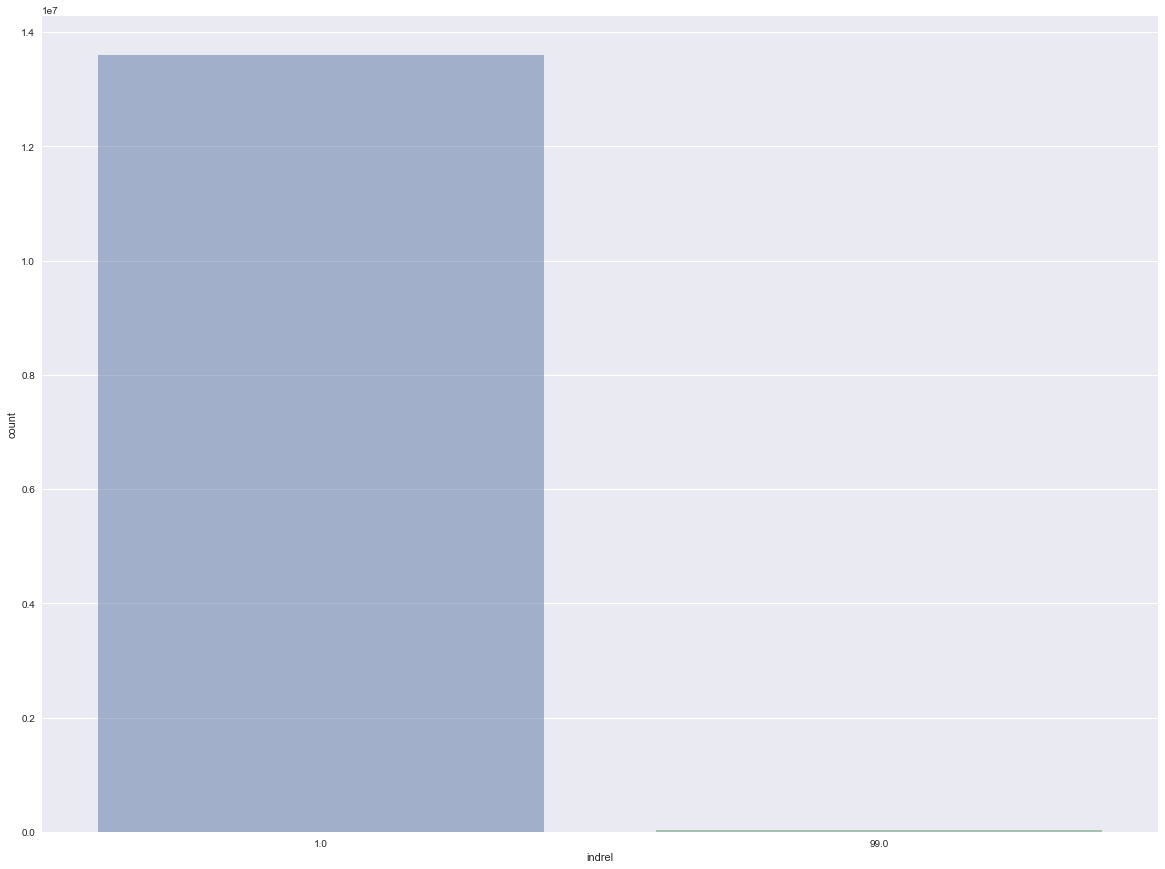

col :  ult_fec_cli_1t


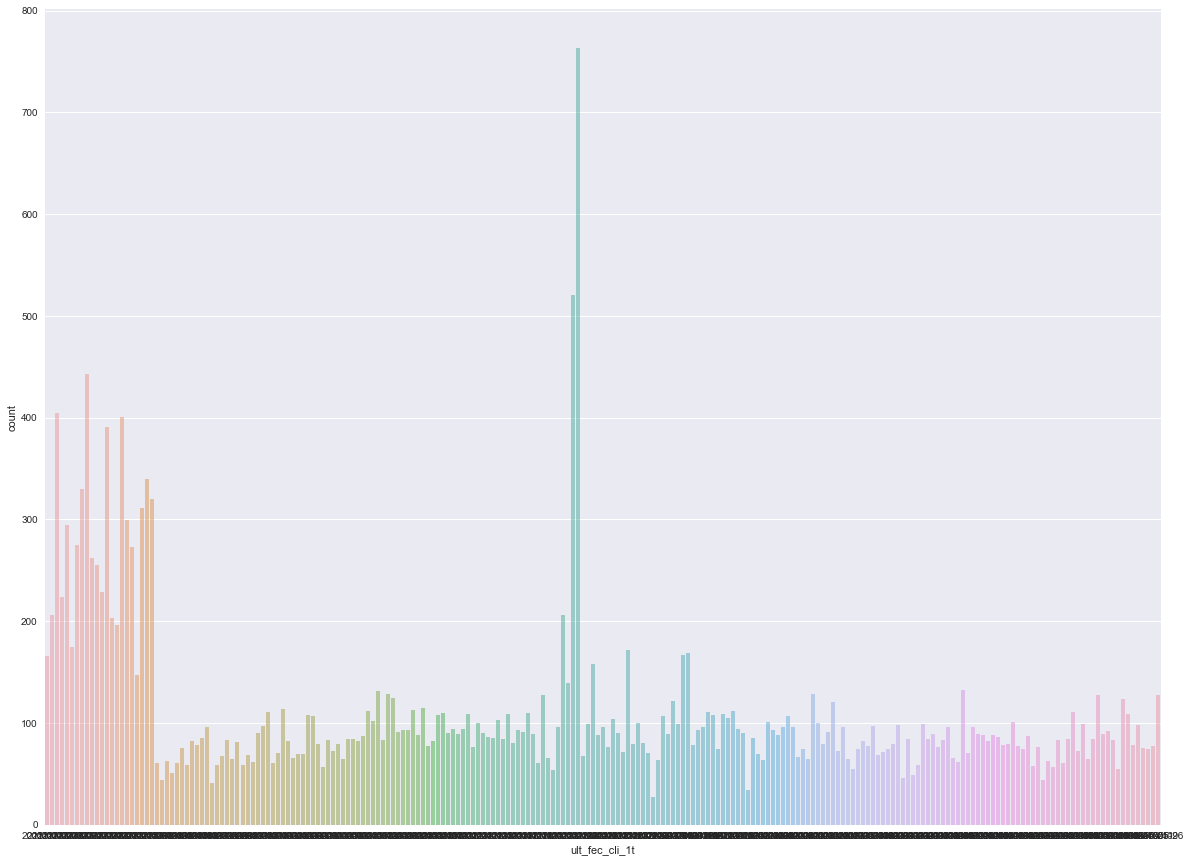

col :  indrel_1mes


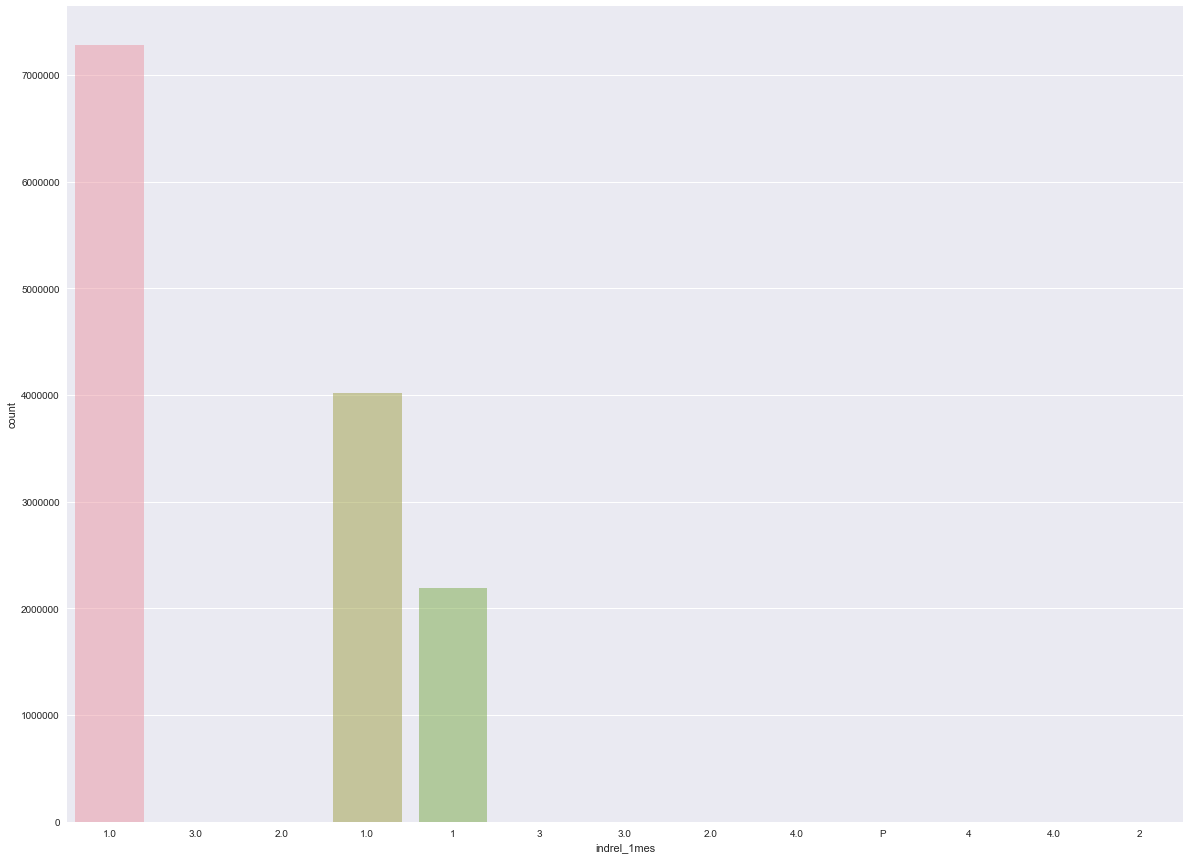

col :  tiprel_1mes


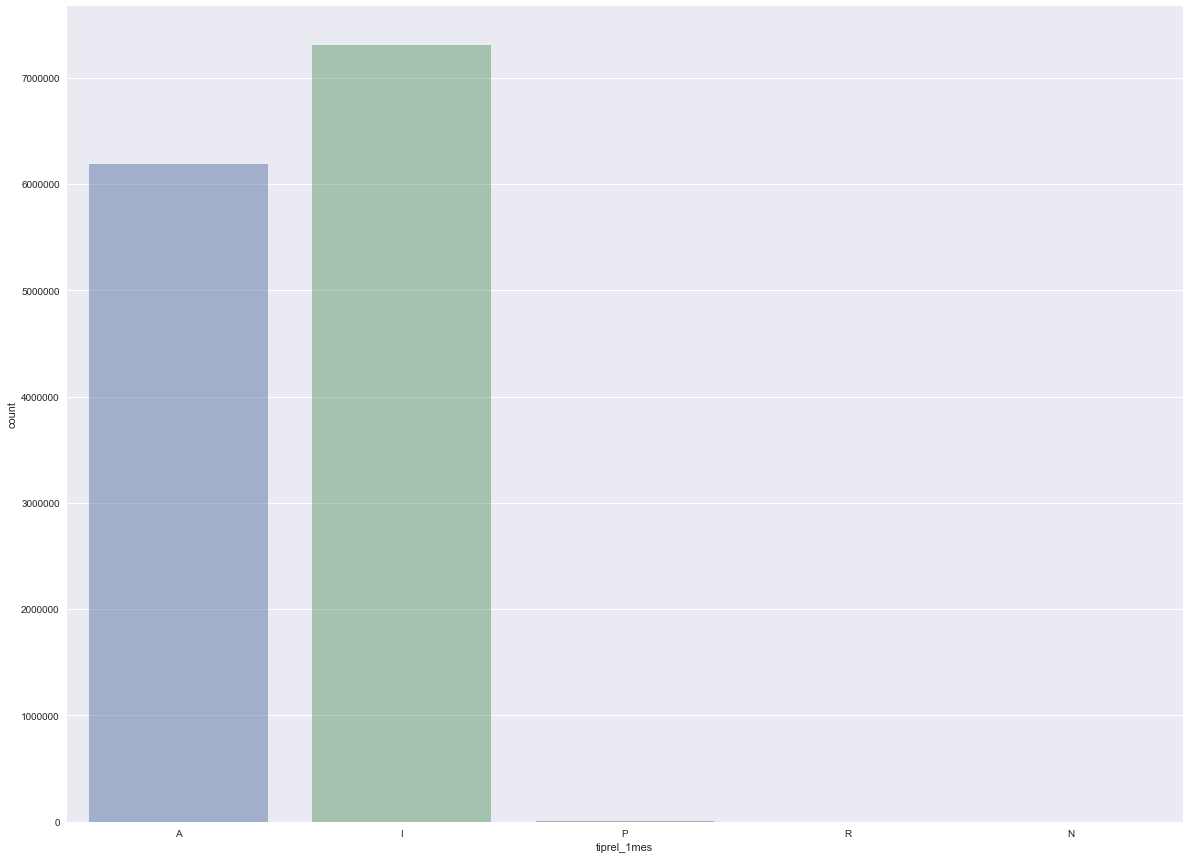

col :  indresi


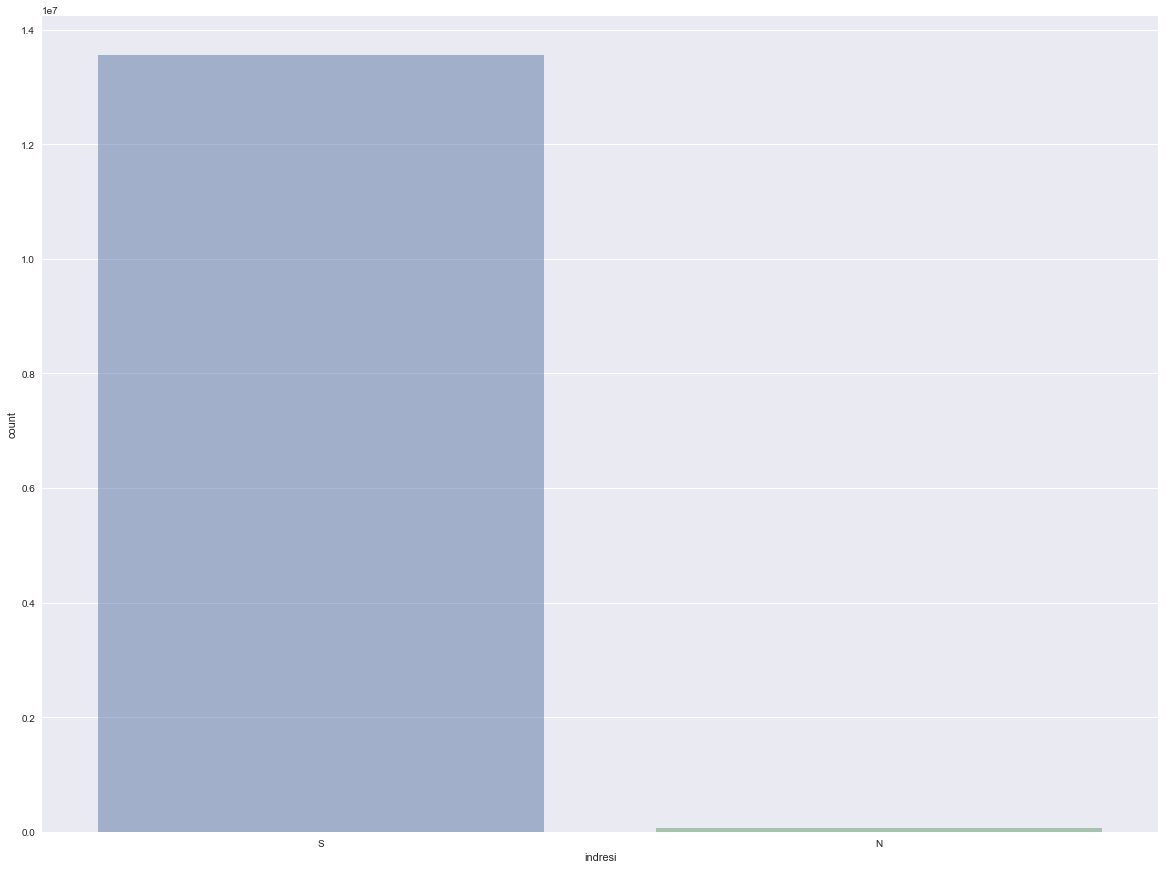

col :  indext


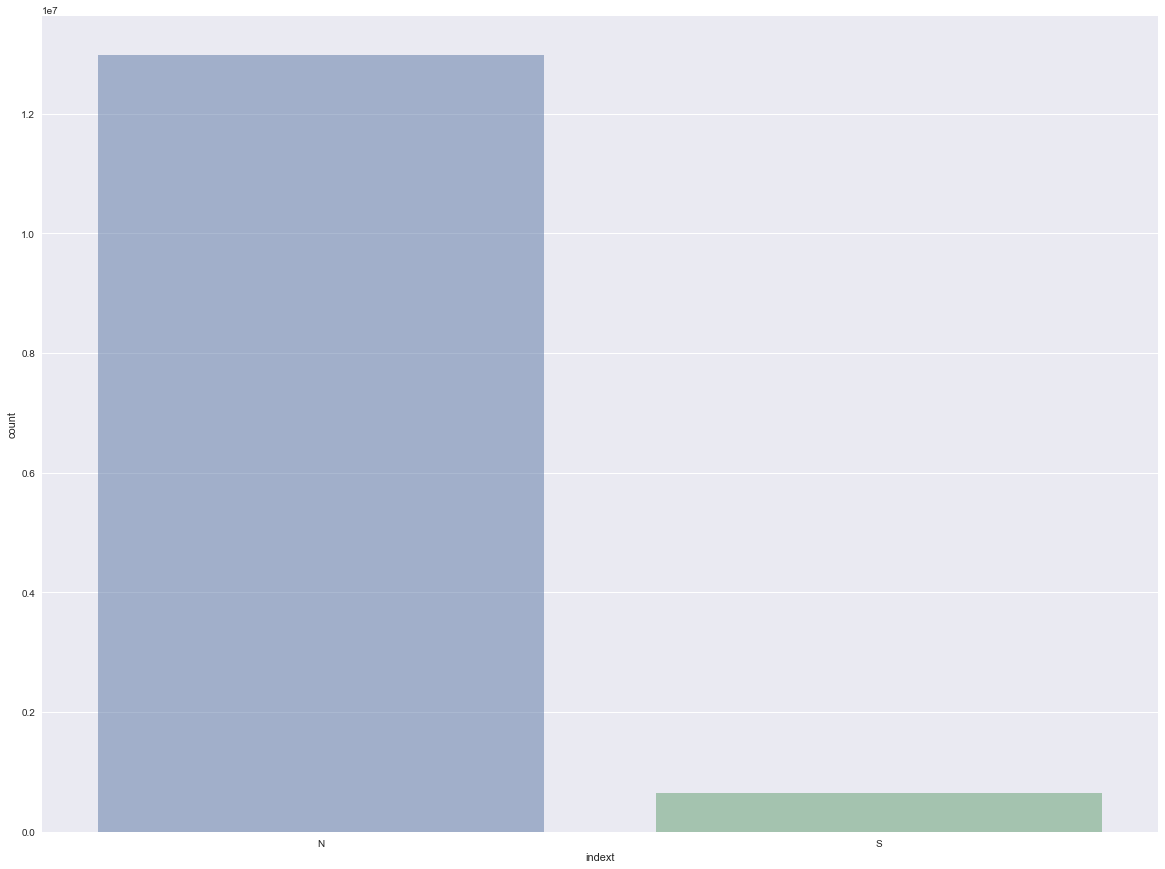

col :  conyuemp


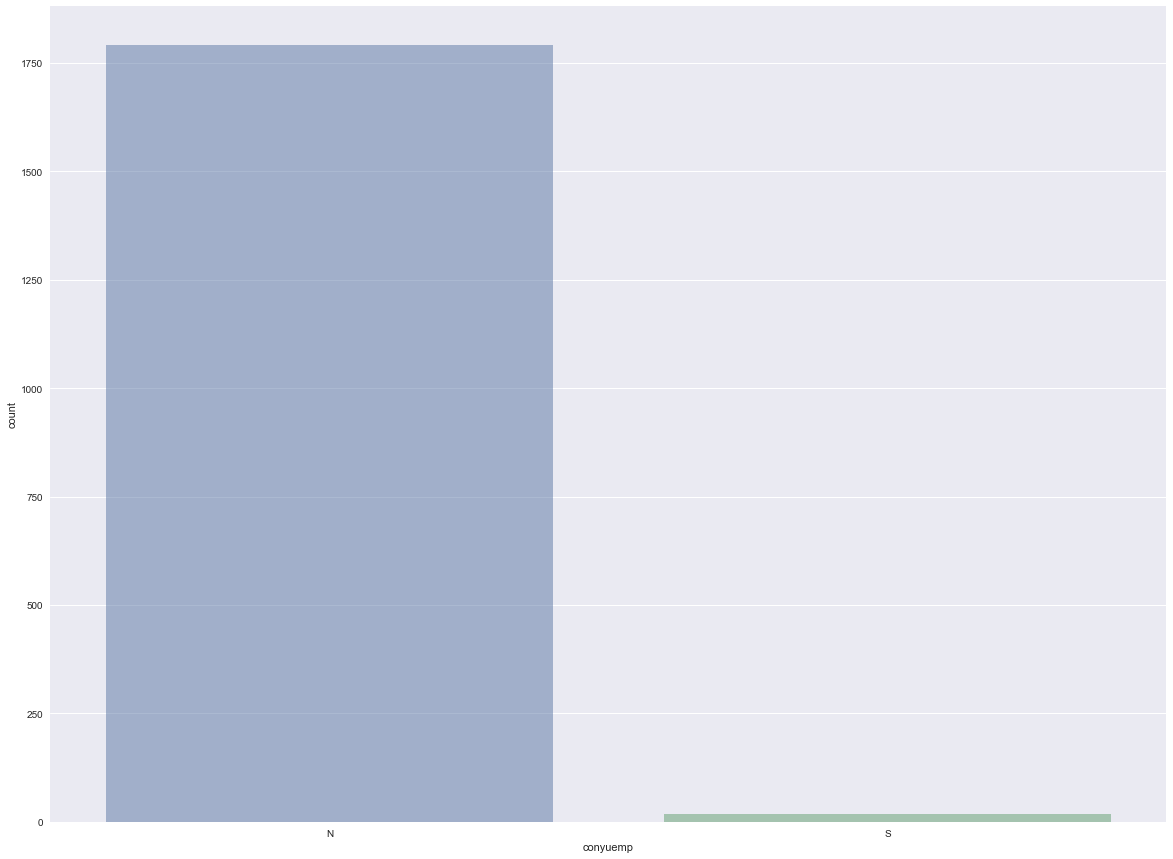

col :  canal_entrada


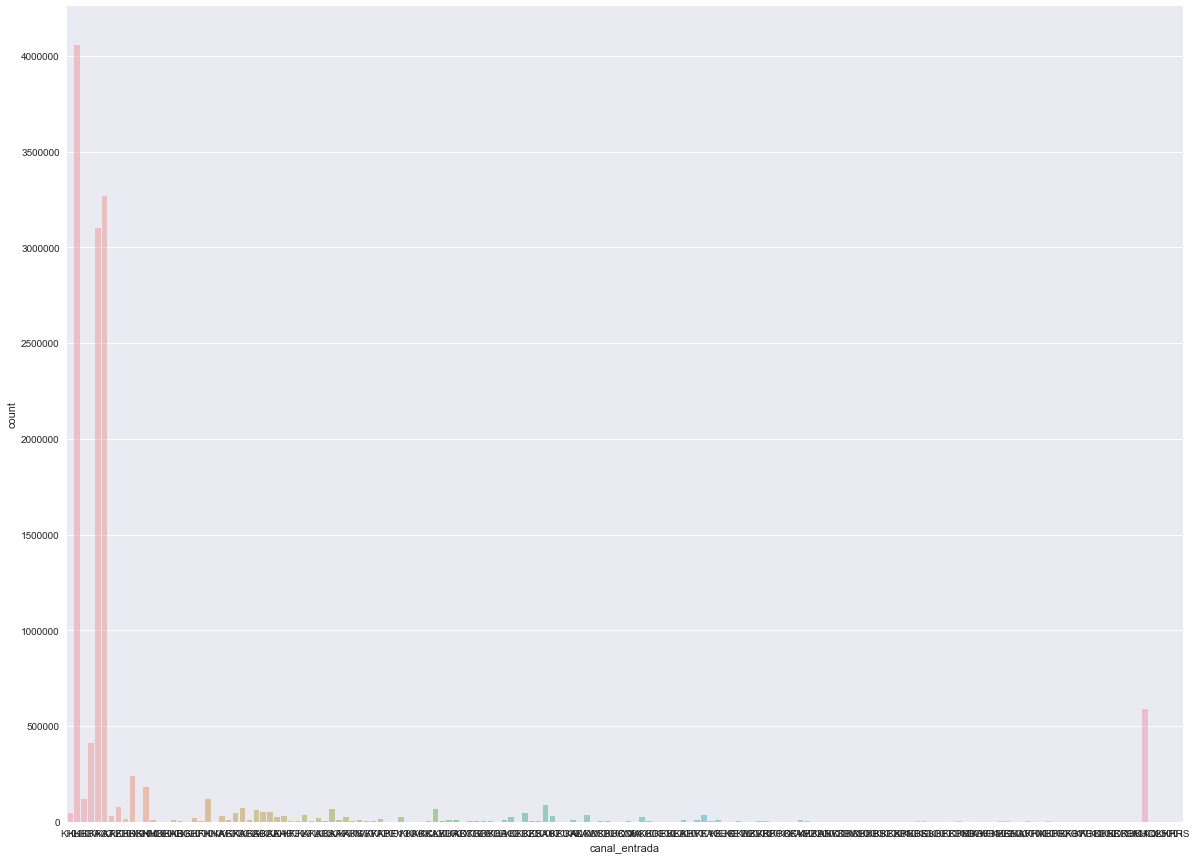

col :  indfall


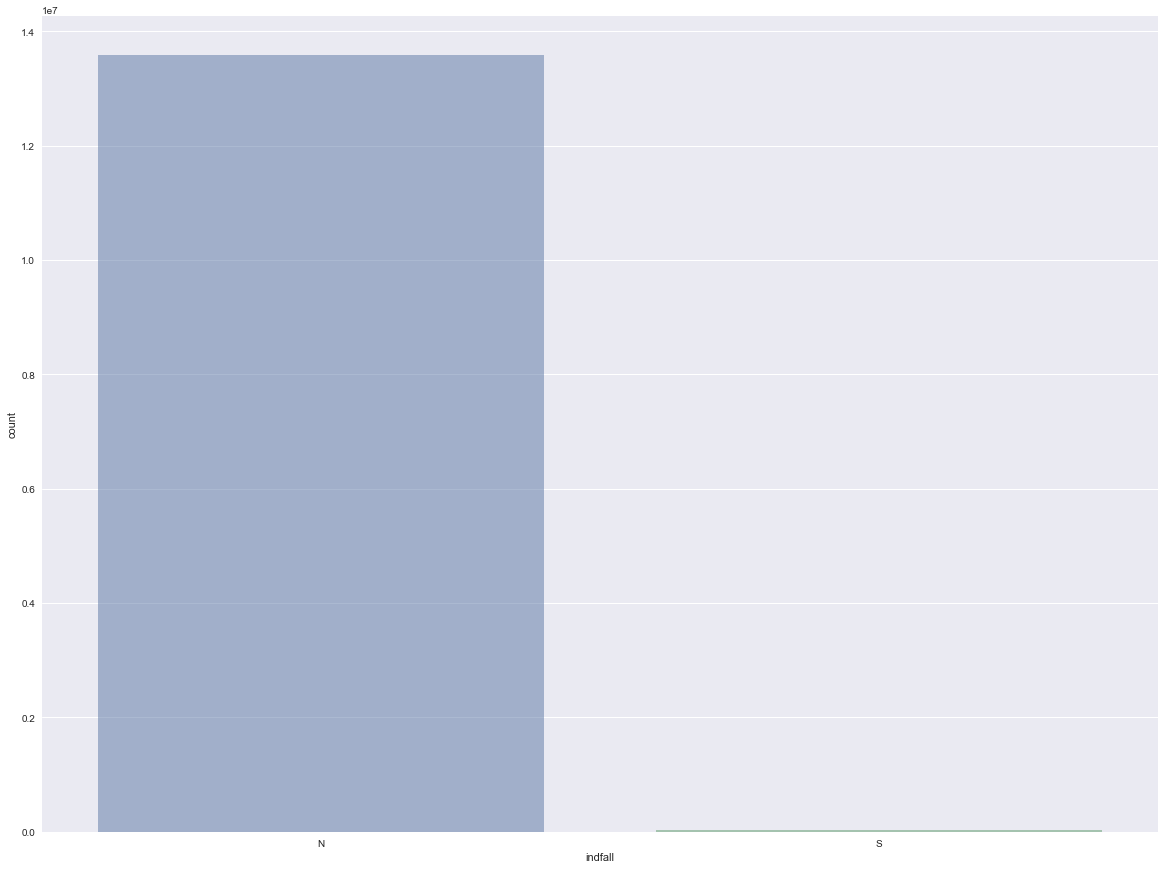

col :  tipodom


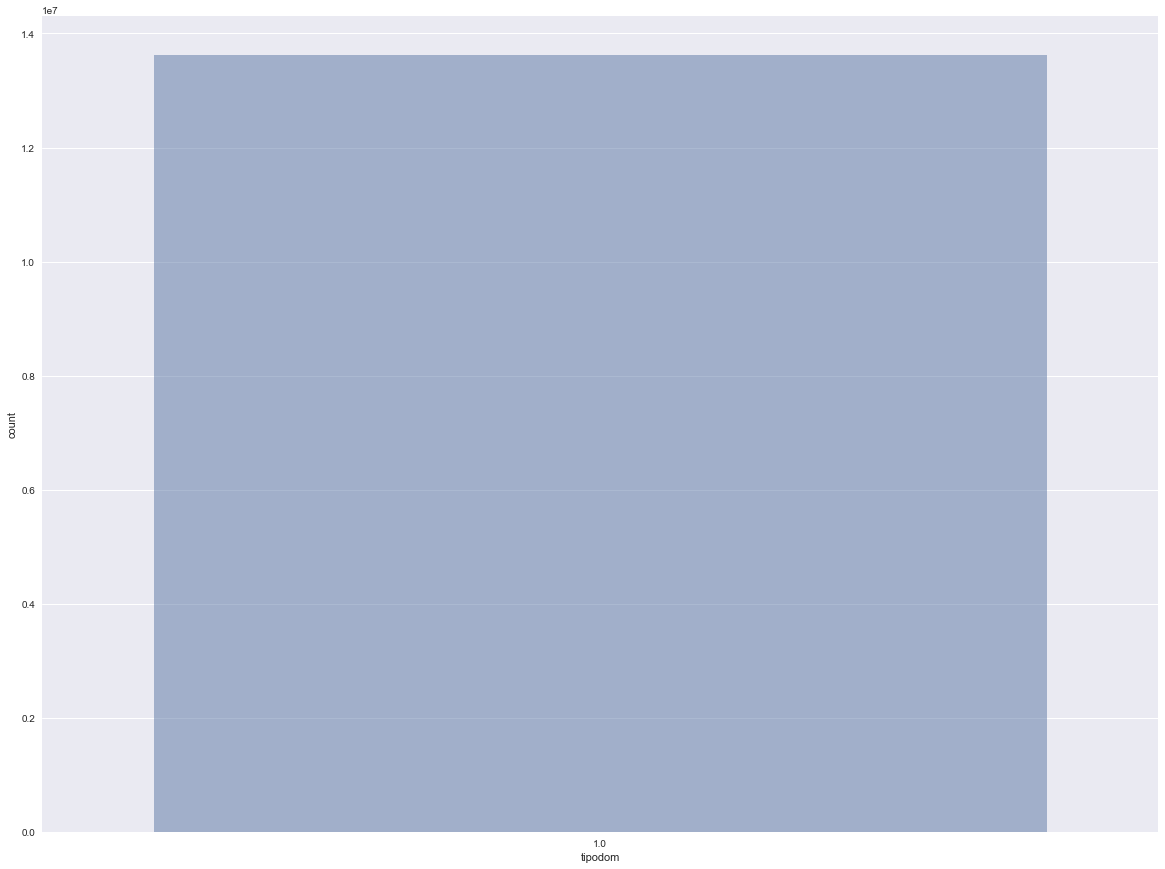

col :  cod_prov


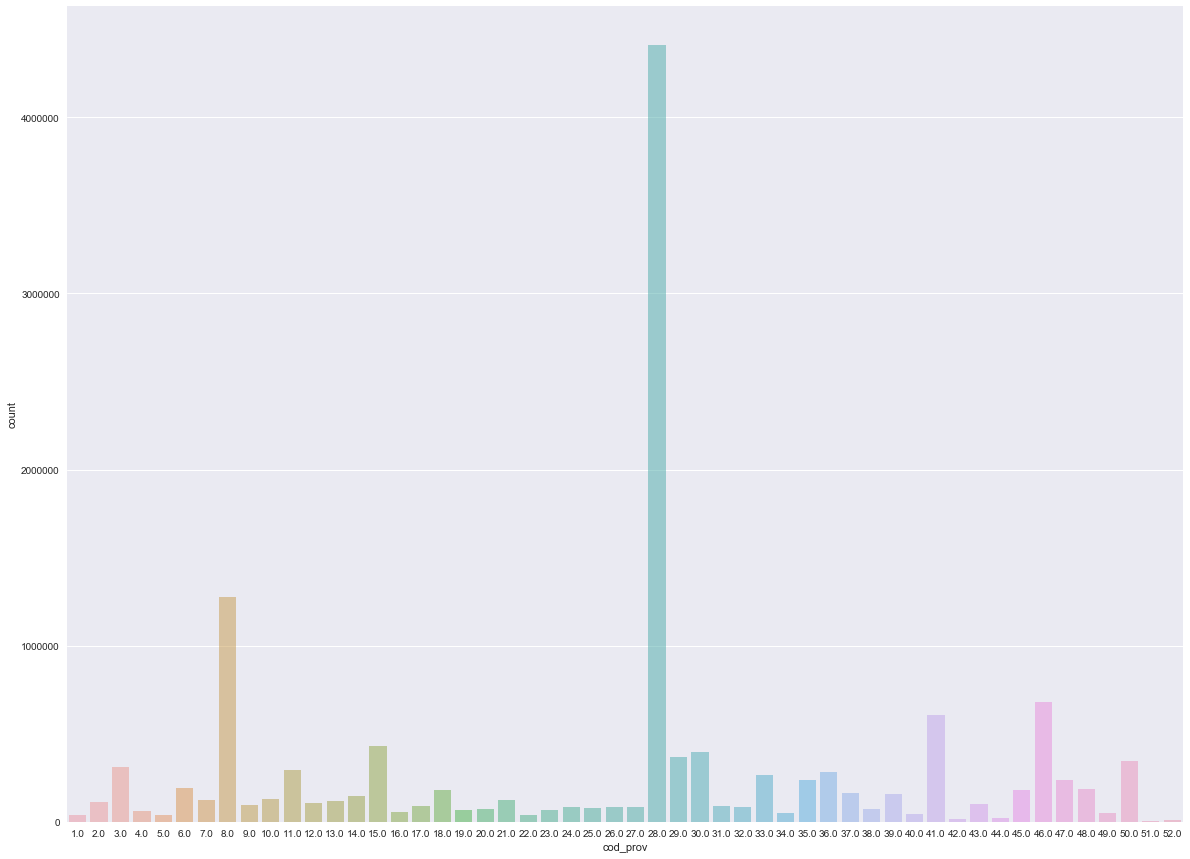

col :  nomprov


UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 4: ordinal not in range(128)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 4: ordinal not in range(128)

In [6]:
st = time.time()

# histogram of features
skip_cols = ['ncodpers']
for col in trn.columns:
    if col in skip_cols:
        continue
    print '='*50
    print 'col : ', col
    f, ax = plt.subplots(figsize=(20, 15))
    sns.countplot(x=col, data=trn, alpha=0.5)
    plt.show()
    
print_time(time.time(),st)
# 360 secs

In [7]:
# debug

col = 'nomprov'
print np.unique(trn[col])
print trn[col].value_counts()

# 'CORU\xc3\x91A, A' causing an error

[nan 'ALAVA' 'ALBACETE' 'ALICANTE' 'ALMERIA' 'ASTURIAS' 'AVILA' 'BADAJOZ'
 'BALEARS, ILLES' 'BARCELONA' 'BIZKAIA' 'BURGOS' 'CACERES' 'CADIZ'
 'CANTABRIA' 'CASTELLON' 'CEUTA' 'CIUDAD REAL' 'CORDOBA' 'CORU\xc3\x91A, A'
 'CUENCA' 'GIPUZKOA' 'GIRONA' 'GRANADA' 'GUADALAJARA' 'HUELVA' 'HUESCA'
 'JAEN' 'LEON' 'LERIDA' 'LUGO' 'MADRID' 'MALAGA' 'MELILLA' 'MURCIA'
 'NAVARRA' 'OURENSE' 'PALENCIA' 'PALMAS, LAS' 'PONTEVEDRA' 'RIOJA, LA'
 'SALAMANCA' 'SANTA CRUZ DE TENERIFE' 'SEGOVIA' 'SEVILLA' 'SORIA'
 'TARRAGONA' 'TERUEL' 'TOLEDO' 'VALENCIA' 'VALLADOLID' 'ZAMORA' 'ZARAGOZA']
MADRID                    4409600
BARCELONA                 1275219
VALENCIA                   682304
SEVILLA                    605164
CORUÑA, A                  429322
MURCIA                     396759
MALAGA                     367023
ZARAGOZA                   342543
ALICANTE                   313397
CADIZ                      294684
PONTEVEDRA                 280026
ASTURIAS                   265749
VALLADOLID            

In [8]:
# check column : age, antiguedad, renta

col = 'age'
print np.unique(trn[col])
print trn[col].value_counts()

# string, ' NA'

[2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78
 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 126 127 163
 164 '  2' '  3' '  4' '  5' '  6' '  7' '  8' '  9' ' 10' ' 11' ' 12'
 ' 13' ' 14' ' 15' ' 16' ' 17' ' 18' ' 19' ' 20' ' 21' ' 22' ' 23' ' 24'
 ' 25' ' 26' ' 27' ' 28' ' 29' ' 30' ' 31' ' 32' ' 33' ' 34' ' 35' ' 36'
 ' 37' ' 38' ' 39' ' 40' ' 41' ' 42' ' 43' ' 44' ' 45' ' 46' ' 47' ' 48'
 ' 49' ' 50' ' 51' ' 52' ' 53' ' 54' ' 55' ' 56' ' 57' ' 58' ' 59' ' 60'
 ' 61' ' 62' ' 63' ' 64' ' 65' ' 66' ' 67' ' 68' ' 69' ' 70' ' 71' ' 72'
 ' 73' ' 74' ' 75' ' 76' ' 77' ' 78' ' 79' ' 80' ' 81' ' 82' ' 83' ' 84'
 ' 85' ' 86' ' 87' ' 88' ' 89' ' 90' ' 91' ' 92' ' 93' ' 94' ' 95' ' 96'
 ' 97' ' 98' ' 99' ' NA' '100' '101' '102' 

In [9]:
# check column : age, antiguedad, renta

col = 'antiguedad'
print np.unique(trn[col])
print trn[col].value_counts()

# string, '     NA'

[-999999 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 '      0' '      1'
 '      2' '      3' '      4' '      5' 

In [10]:
# check column : age, antiguedad, renta

col = 'renta'
print np.unique(trn[col])
print trn[col].value_counts()

# nan

[ 1202.73  1471.23  2336.01 ...,      nan      nan      nan]
451931.22    5582
463625.16    1743
181042.20    1493
128318.52    1404
105260.88    1354
488798.49    1332
127141.50    1183
283325.67    1148
132335.73    1047
236690.34    1009
104563.80     954
227267.49     896
273387.54     886
111933.69     844
174407.10     823
227397.72     813
155930.43     804
218030.01     794
163432.47     712
208961.79     680
555605.55     677
168733.62     669
135522.15     657
148736.19     653
152601.99     649
248233.11     627
288997.44     625
326853.09     624
47550.39      607
91673.25      586
             ... 
31253.64        1
73367.82        1
46808.19        1
179561.43       1
108875.73       1
128959.86       1
39686.61        1
192297.42       1
74075.85        1
55041.57        1
65108.82        1
86106.78        1
144388.74       1
156827.52       1
80427.69        1
195859.59       1
97200.18        1
65845.32        1
130968.03       1
19559.37        1
147186.60       1
102

In [11]:
col = 'nomprov'
trn[col].replace('CORU\xc3\x91A, A', 'CORU', inplace=True)

col = 'age'
trn[col].replace(' NA',0,inplace=True)
trn[col] = trn[col].astype(int)

col = 'antiguedad'
trn[col].replace('     NA',-2,inplace=True)
trn[col] = trn[col].astype(int)
trn[col].replace(-999999,-1,inplace=True)

col = 'renta'
trn[col].fillna(0, inplace=True)
trn[col] = (trn[col]/1000).astype(np.int64)

# run above three codes again

col :  age


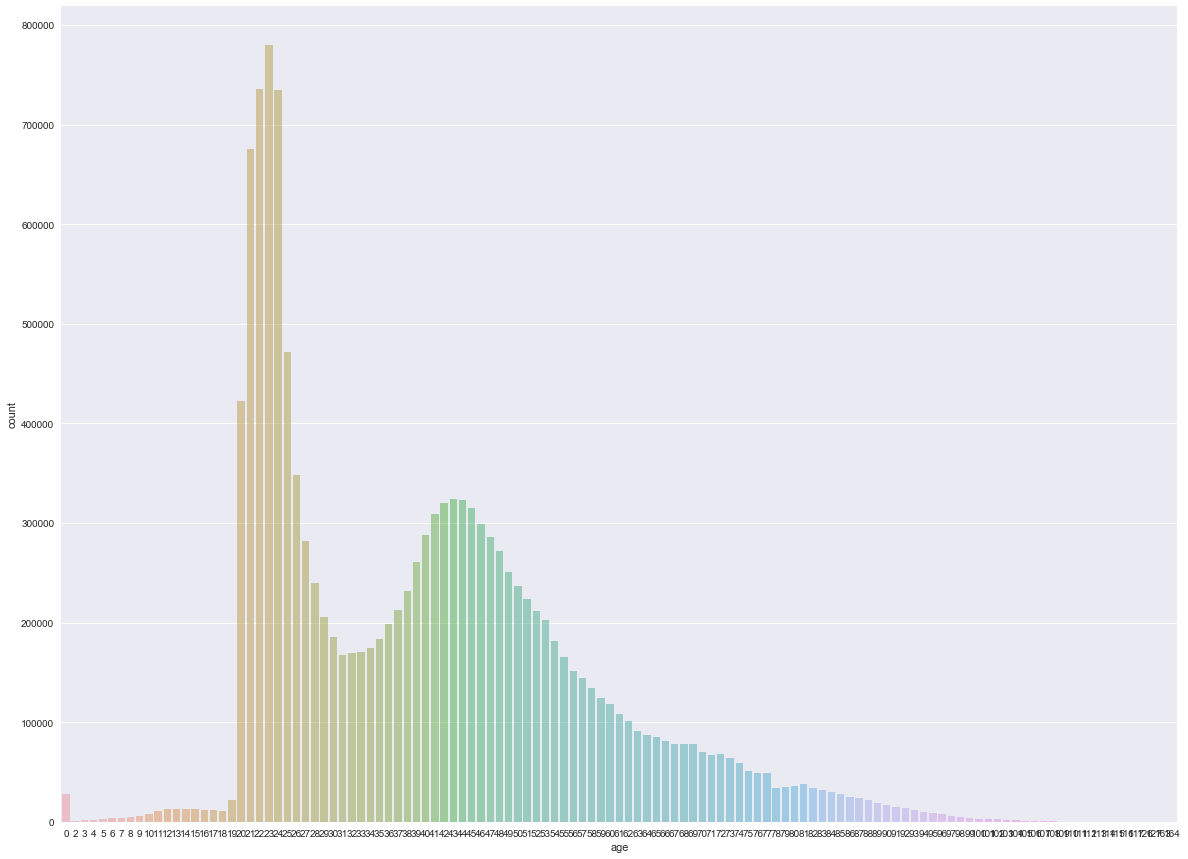

col :  antiguedad


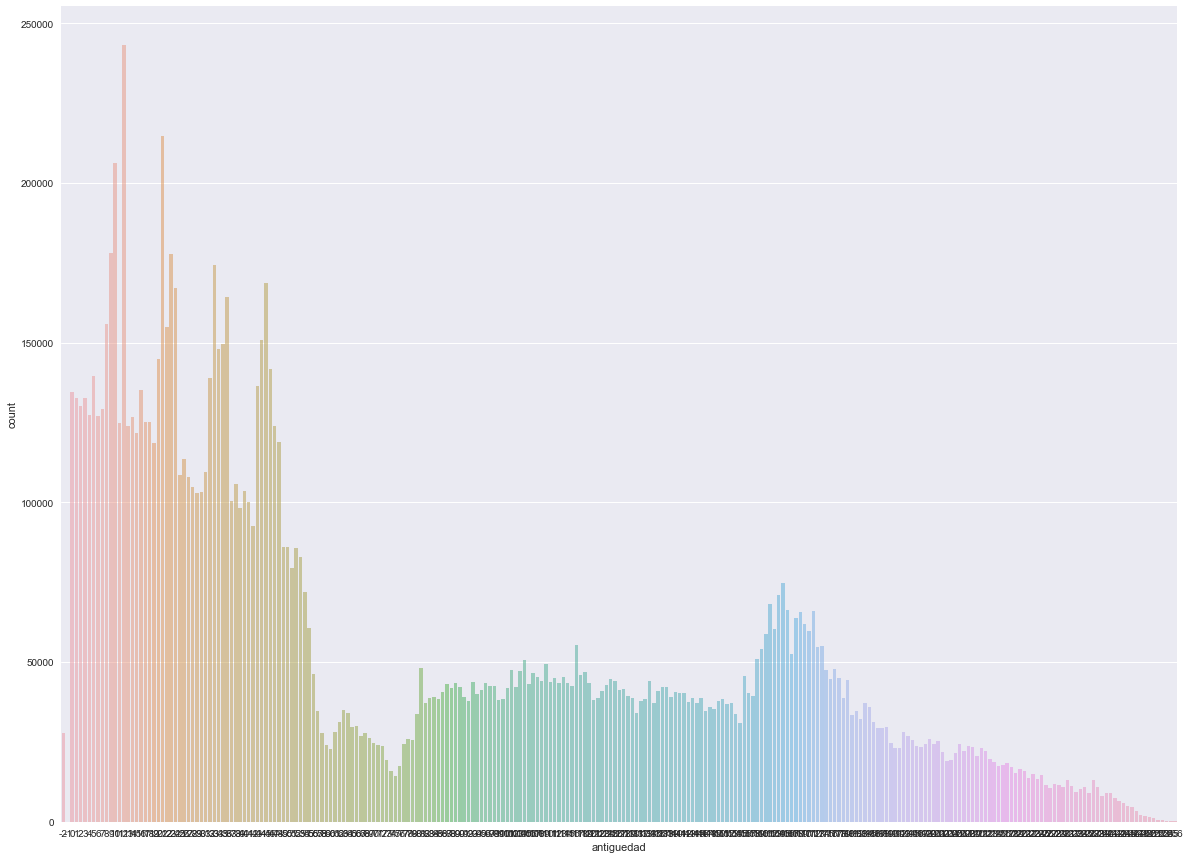

col :  renta


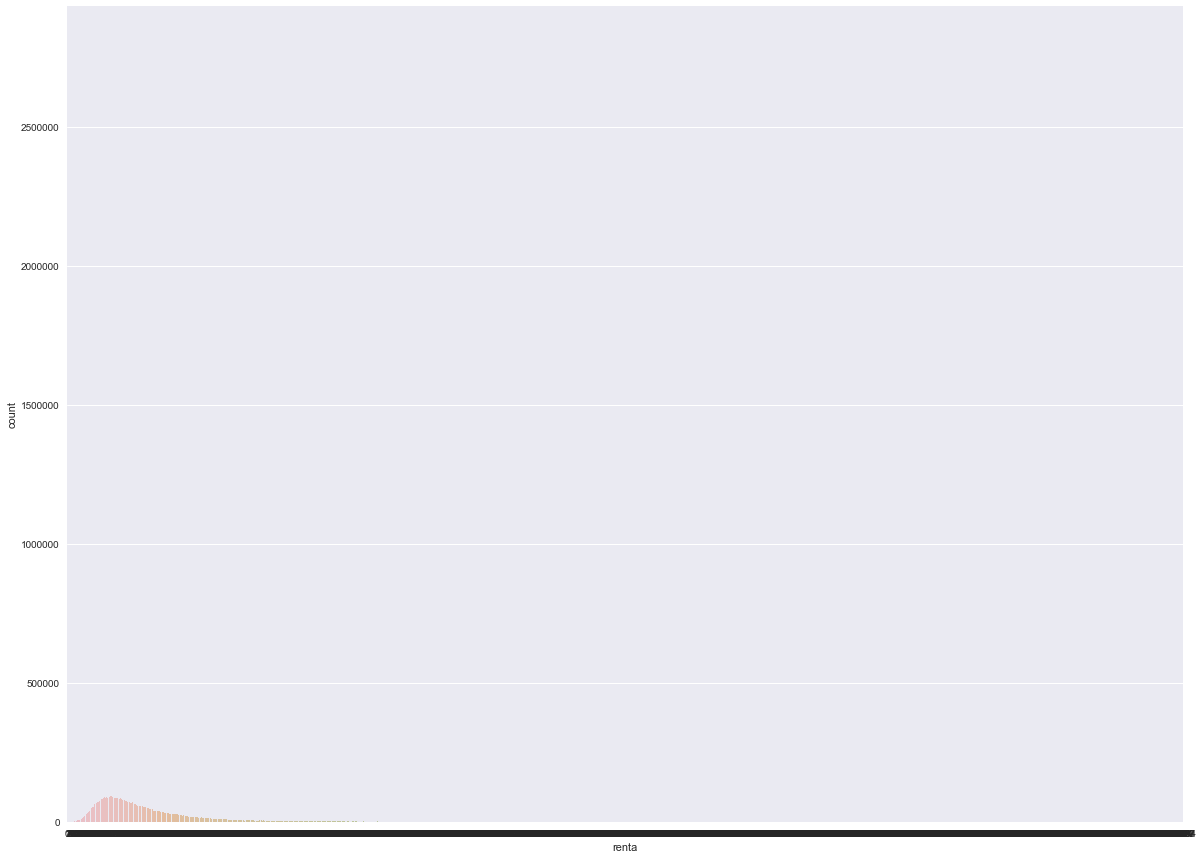

In [12]:
cols = ['age','antiguedad','renta']
for col in cols:
    print '='*50
    print 'col : ', col
    f, ax = plt.subplots(figsize=(20, 15))
    sns.countplot(x=col, data=trn, alpha=0.5)
    plt.show()

col :  nomprov


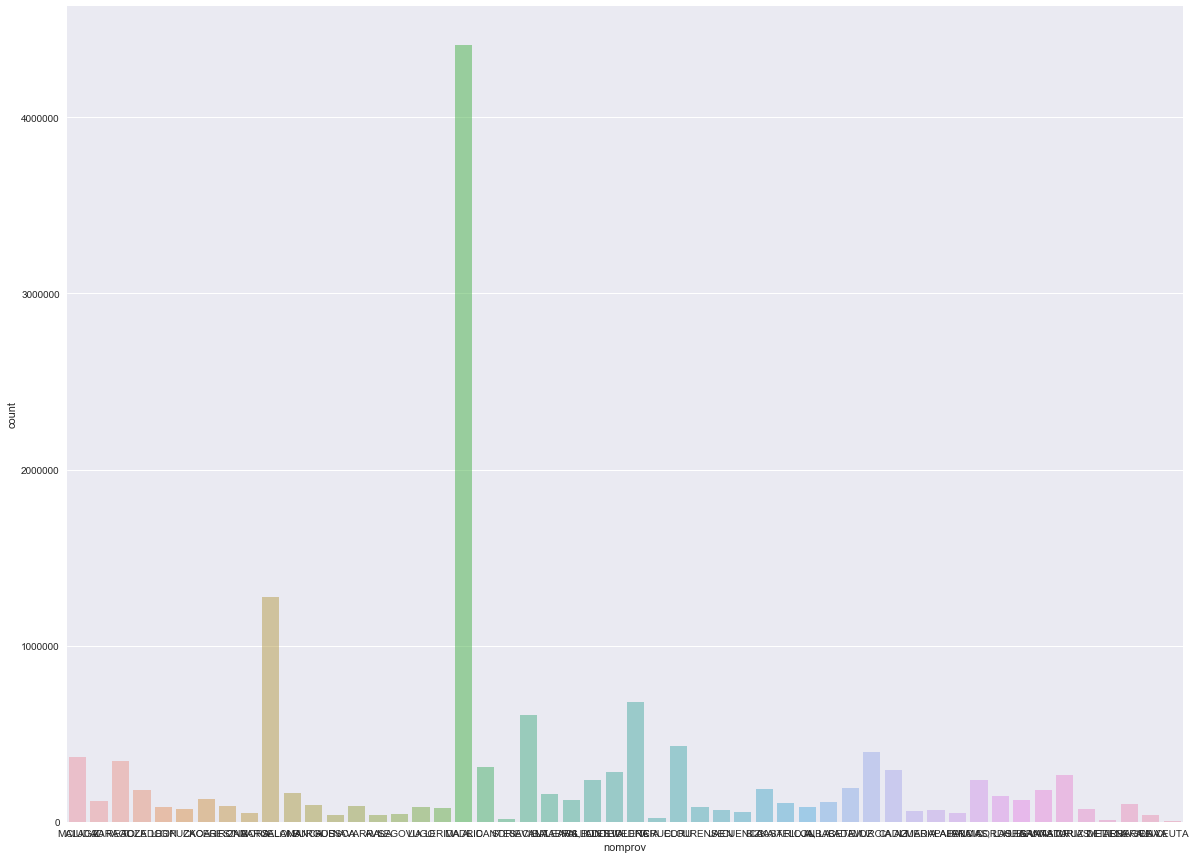

col :  ind_actividad_cliente


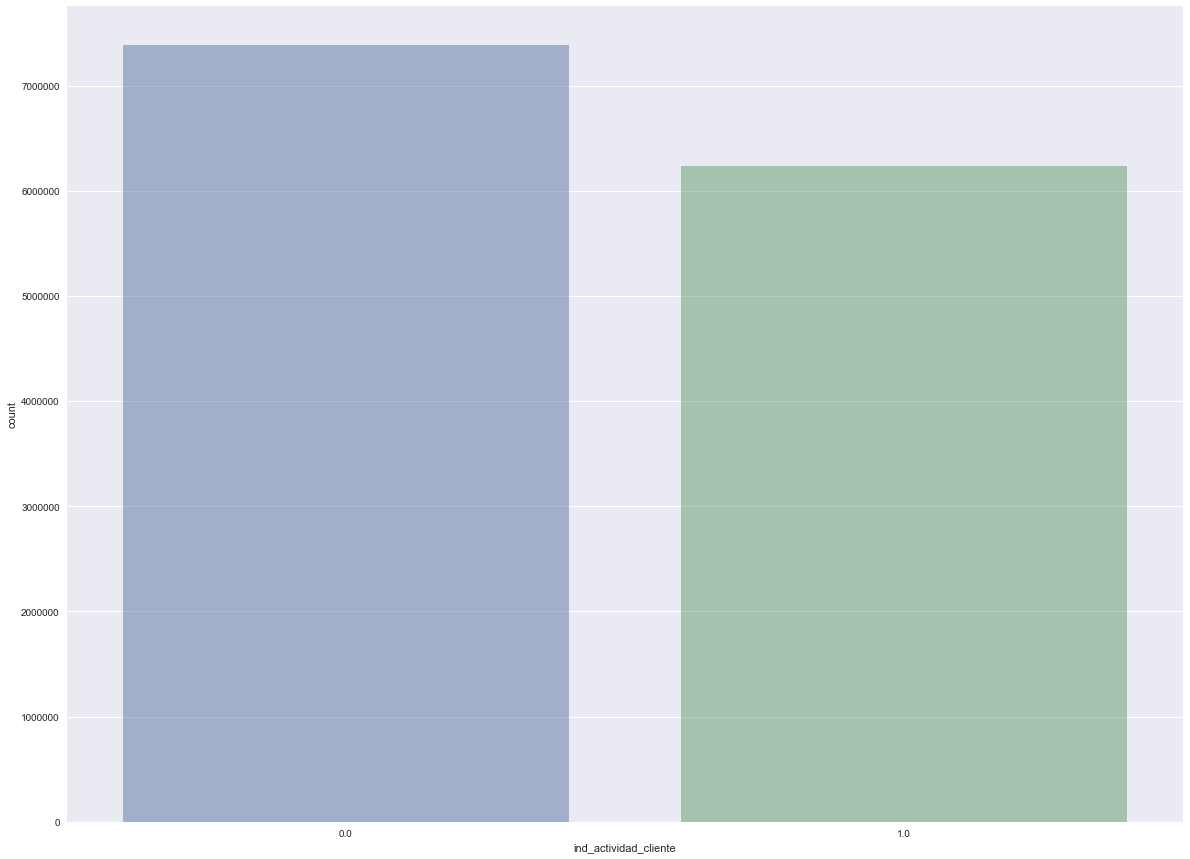

col :  renta


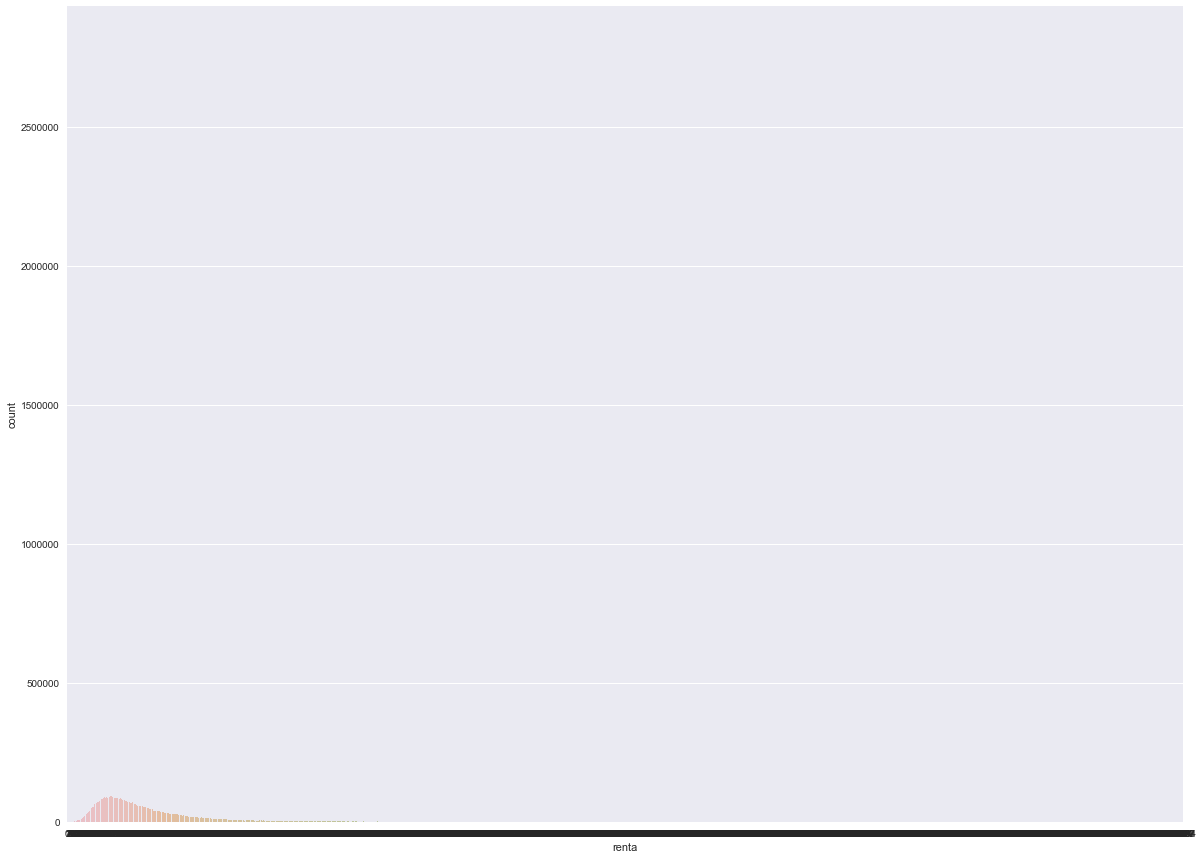

col :  segmento


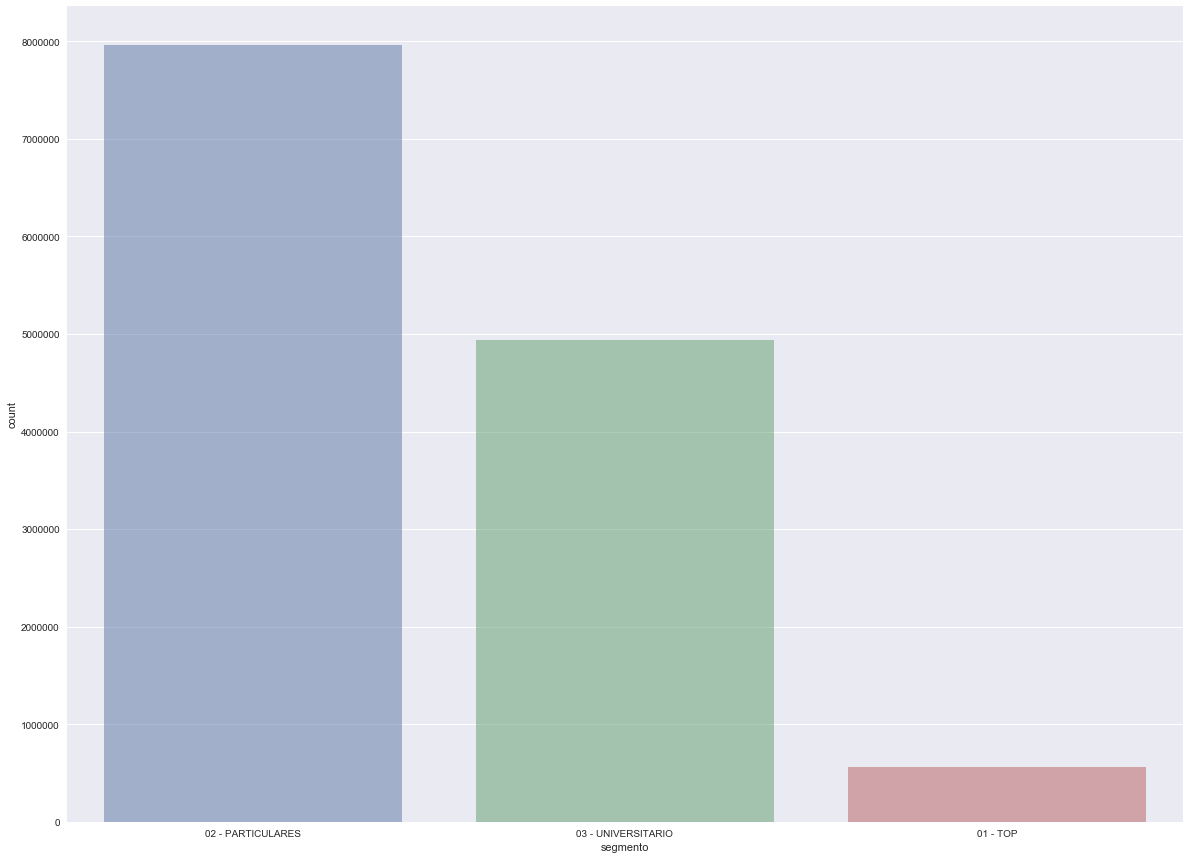

col :  ind_ahor_fin_ult1


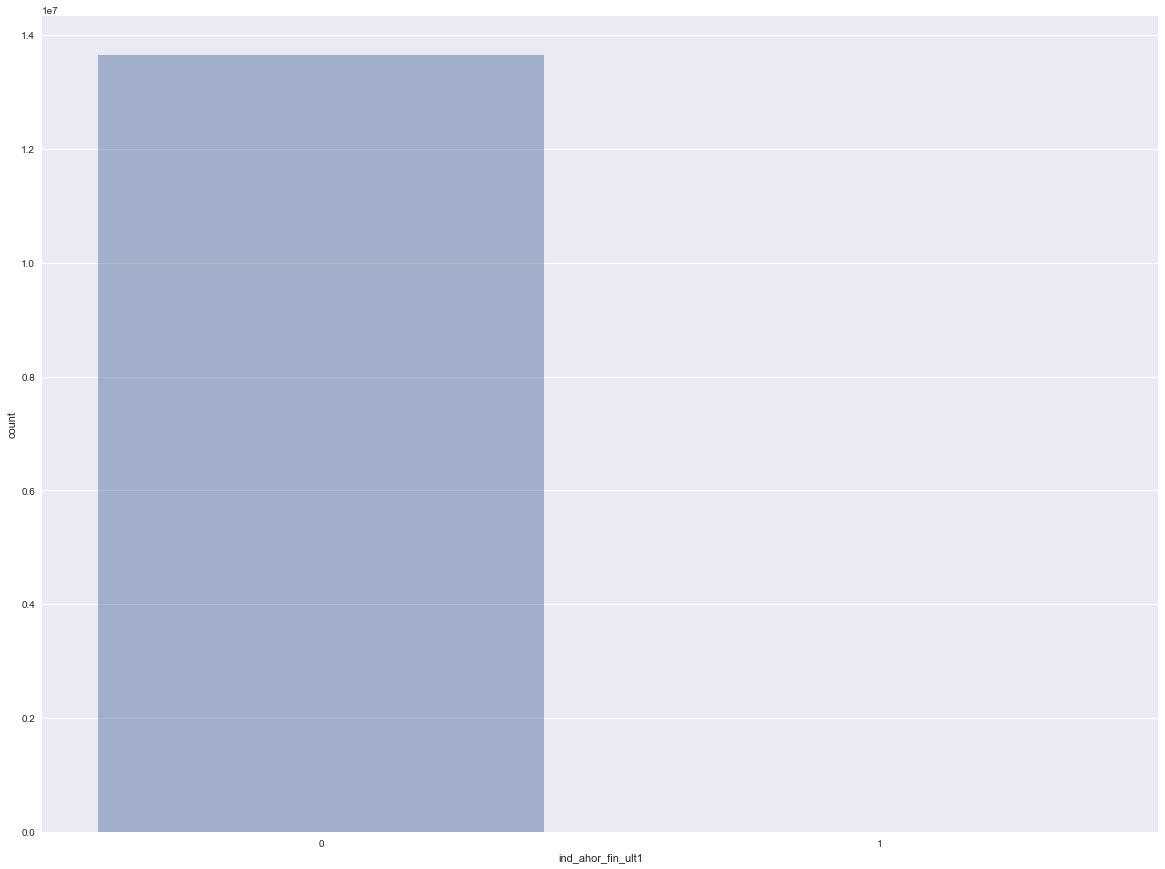

col :  ind_aval_fin_ult1


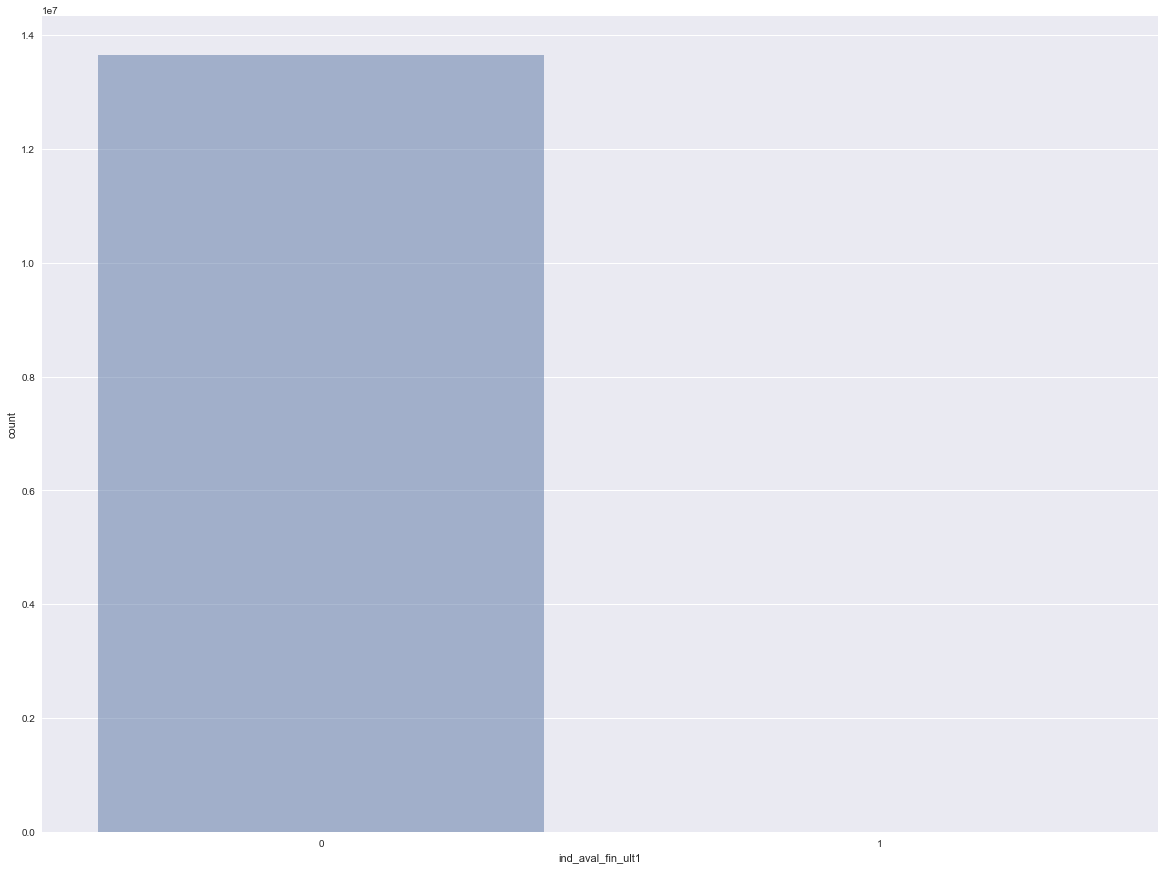

col :  ind_cco_fin_ult1


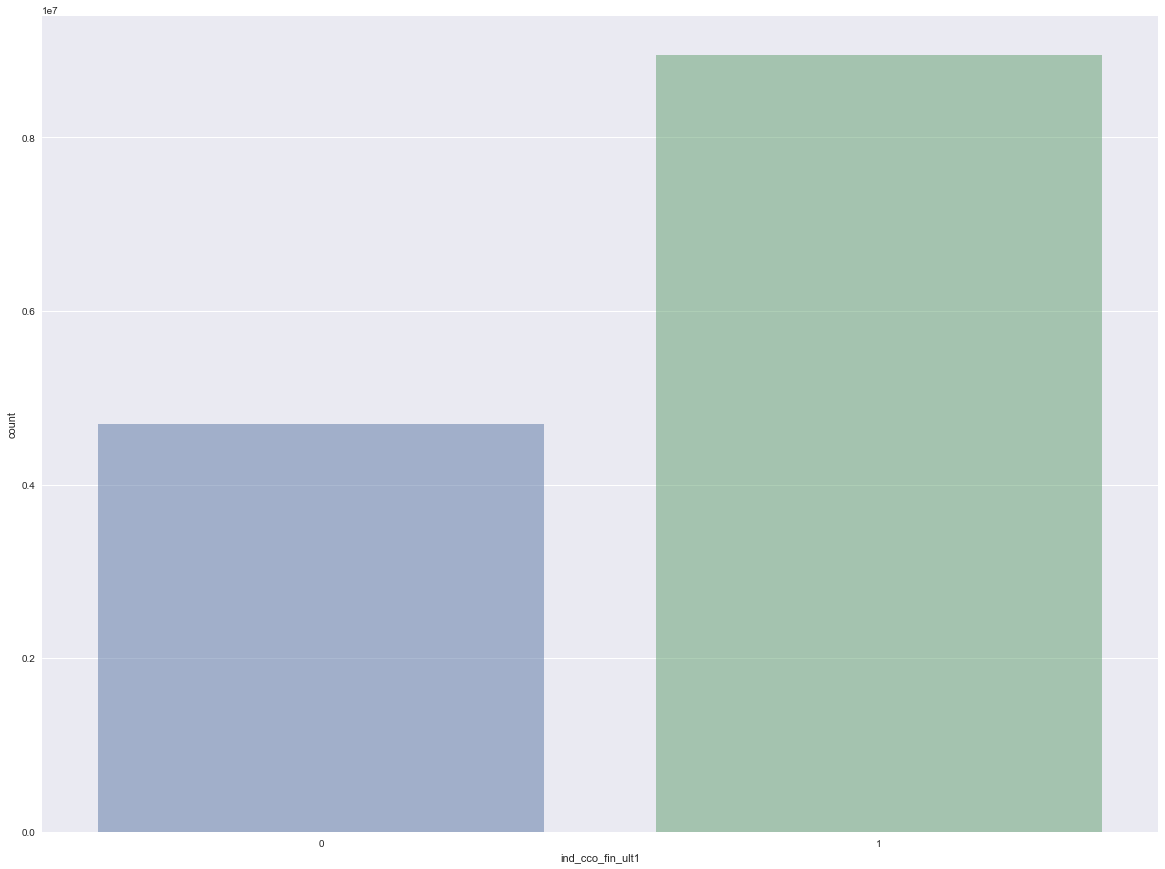

col :  ind_cder_fin_ult1


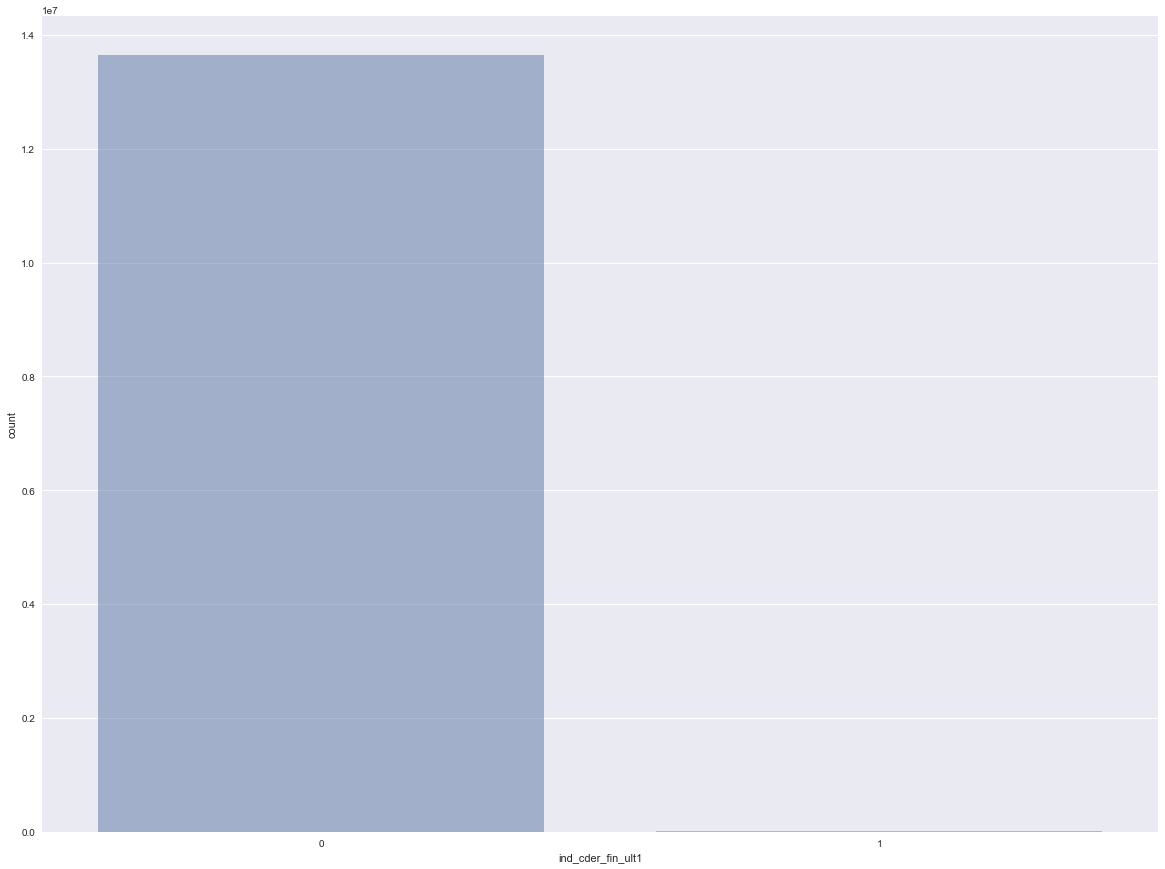

col :  ind_cno_fin_ult1


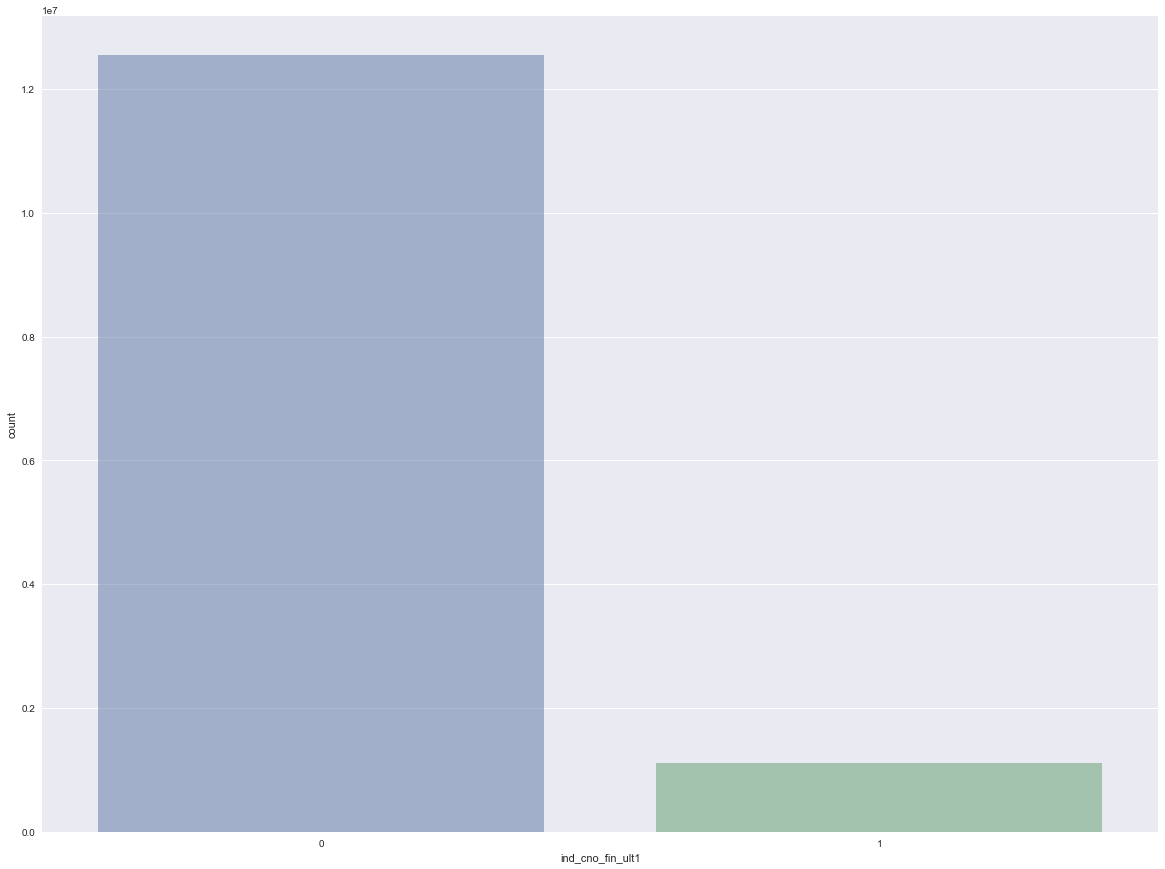

col :  ind_ctju_fin_ult1


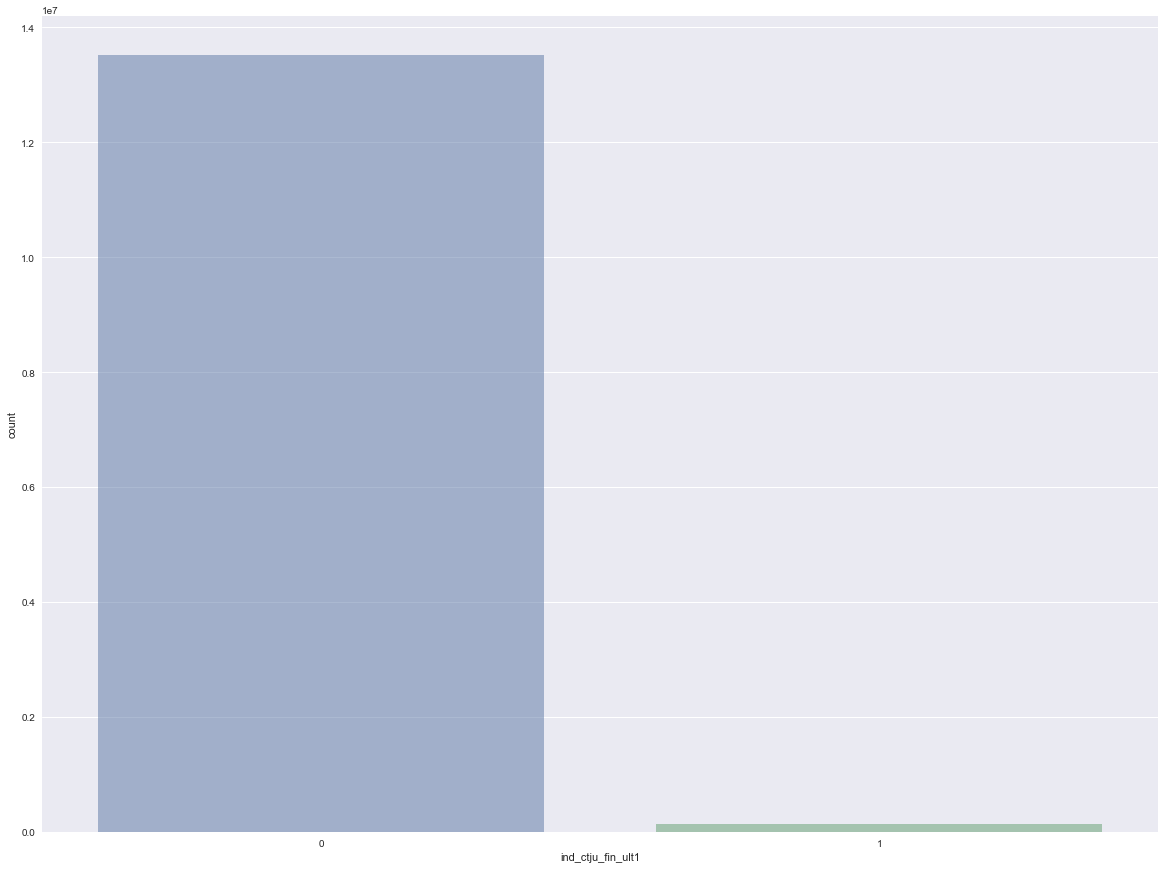

col :  ind_ctma_fin_ult1


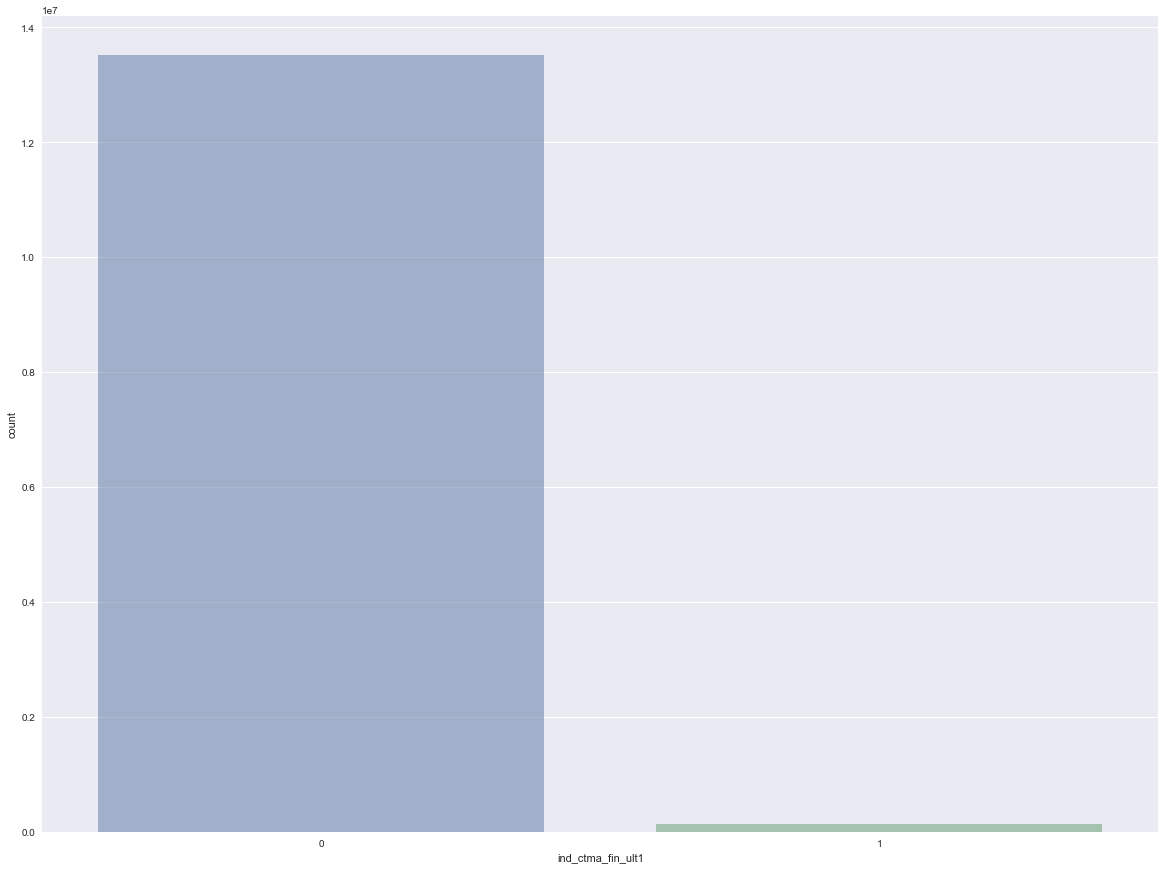

col :  ind_ctop_fin_ult1


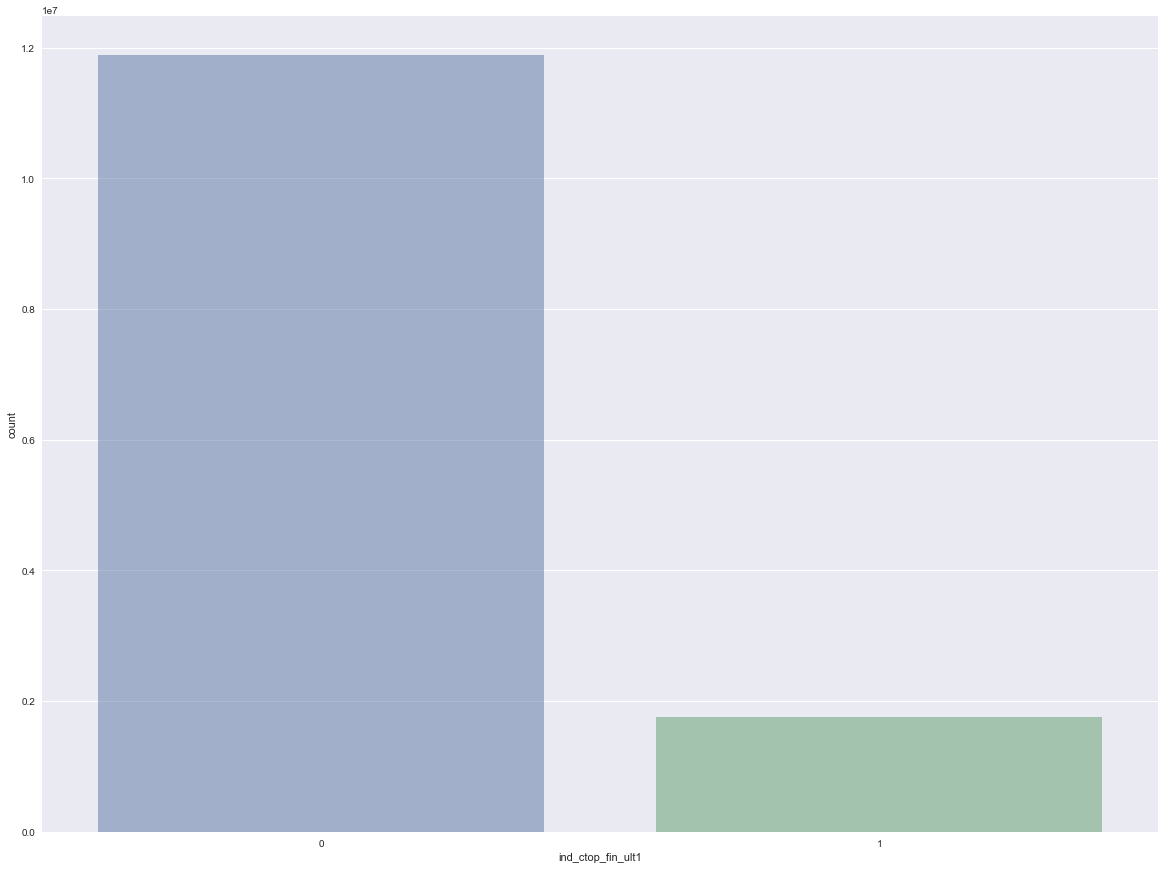

col :  ind_ctpp_fin_ult1


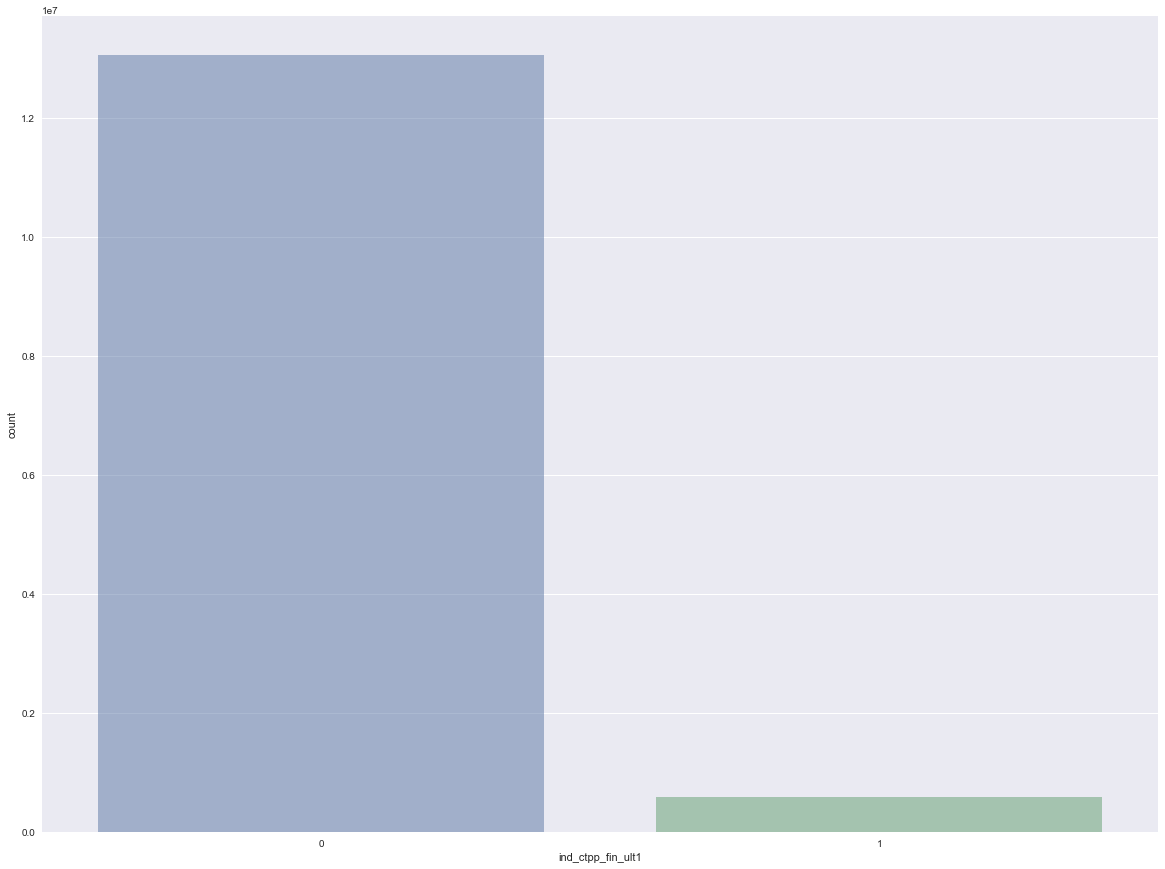

col :  ind_deco_fin_ult1


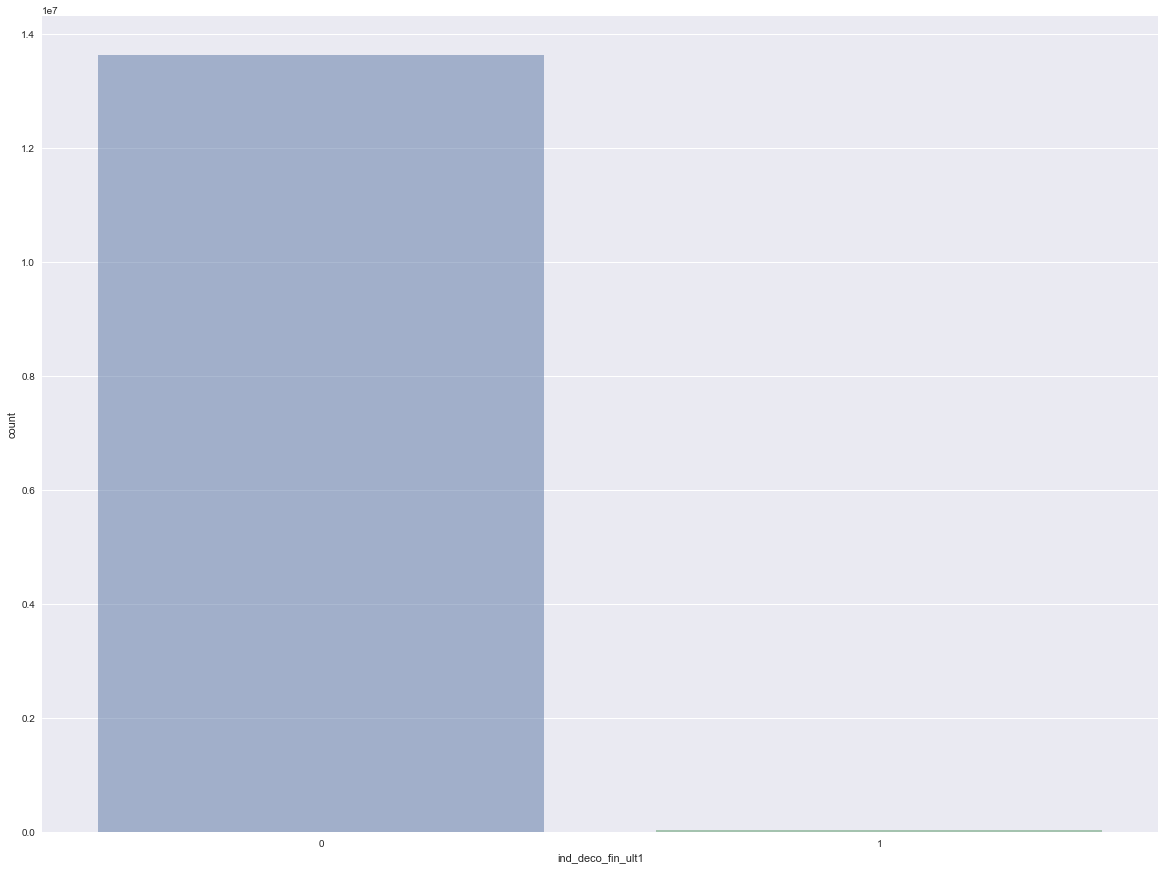

col :  ind_deme_fin_ult1


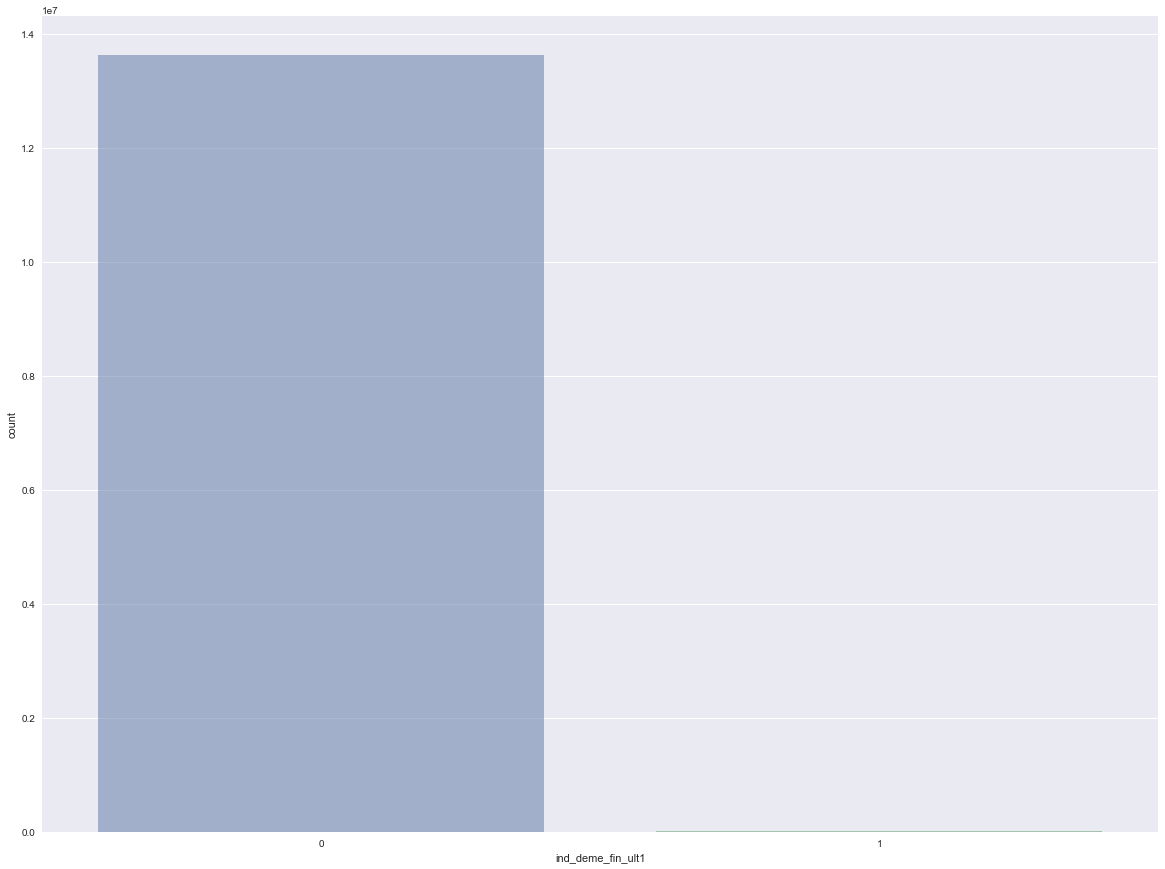

col :  ind_dela_fin_ult1


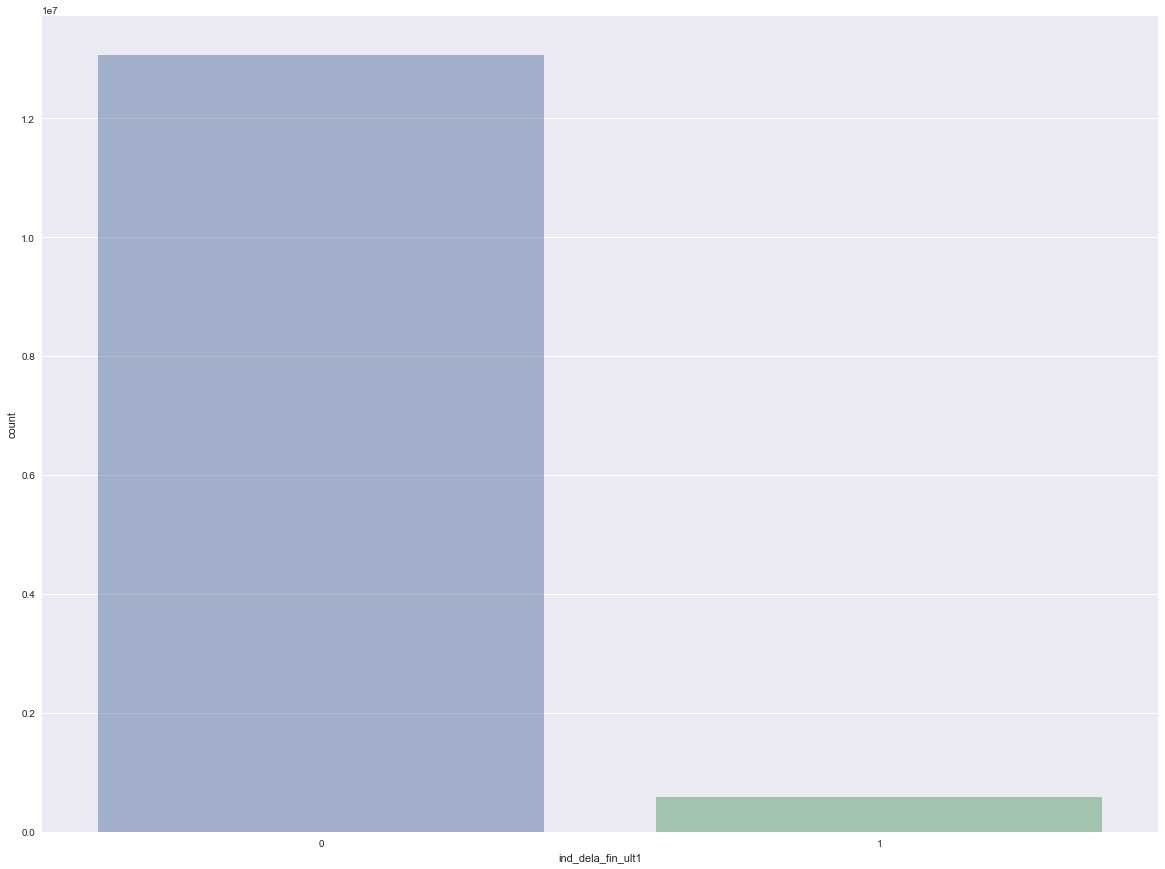

col :  ind_ecue_fin_ult1


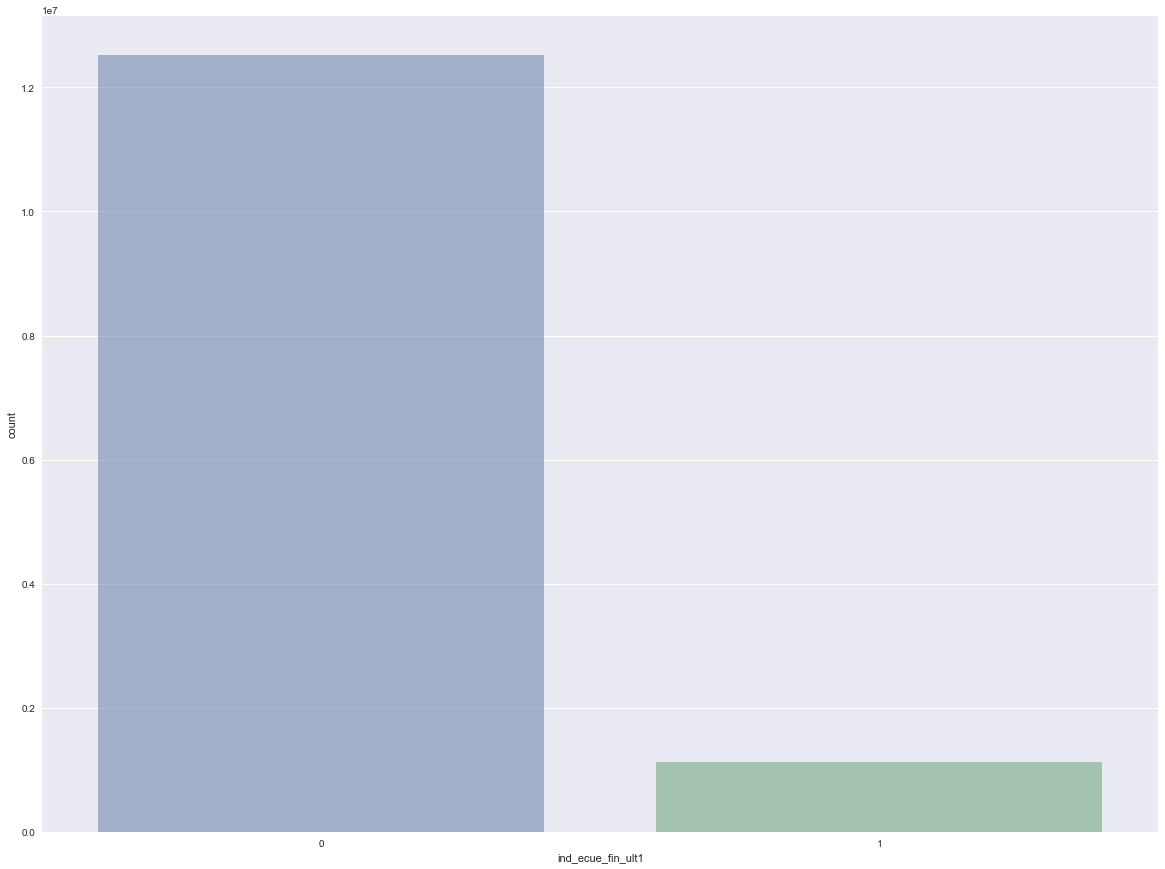

col :  ind_fond_fin_ult1


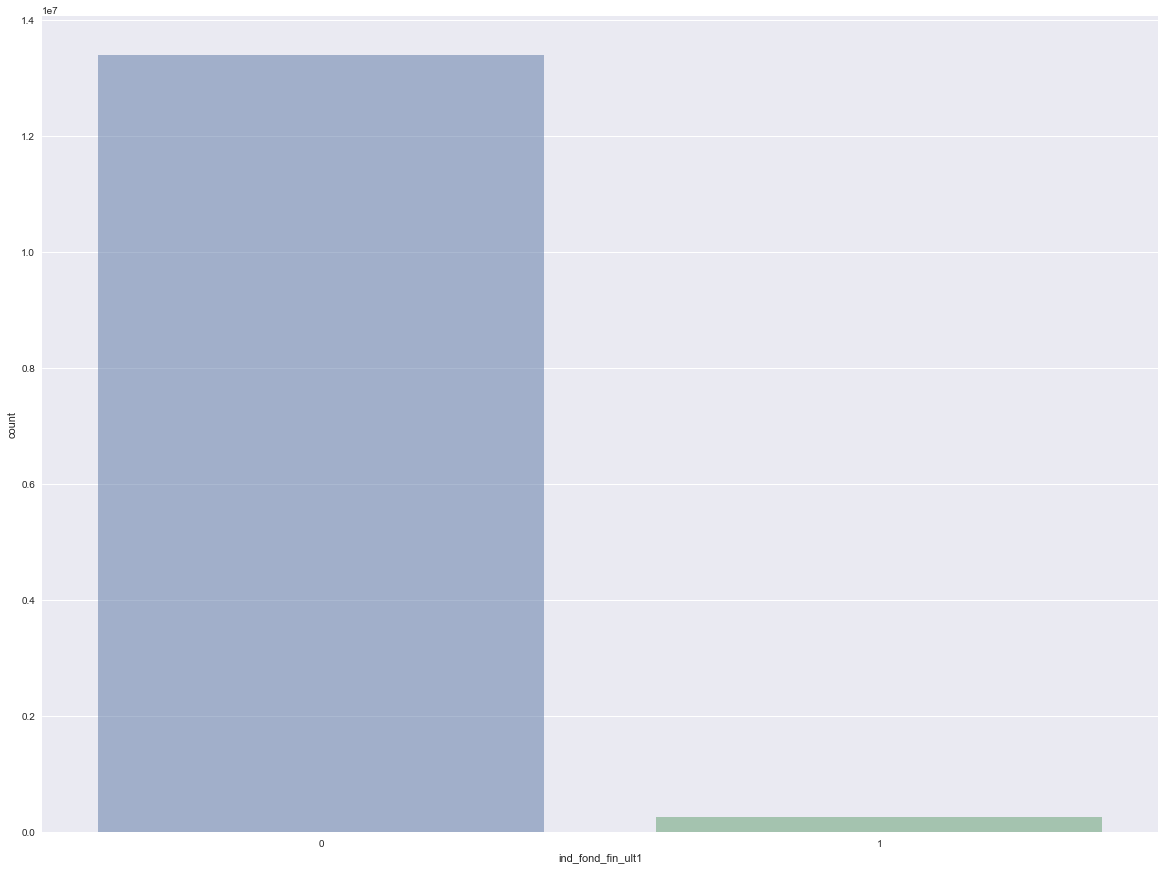

col :  ind_hip_fin_ult1


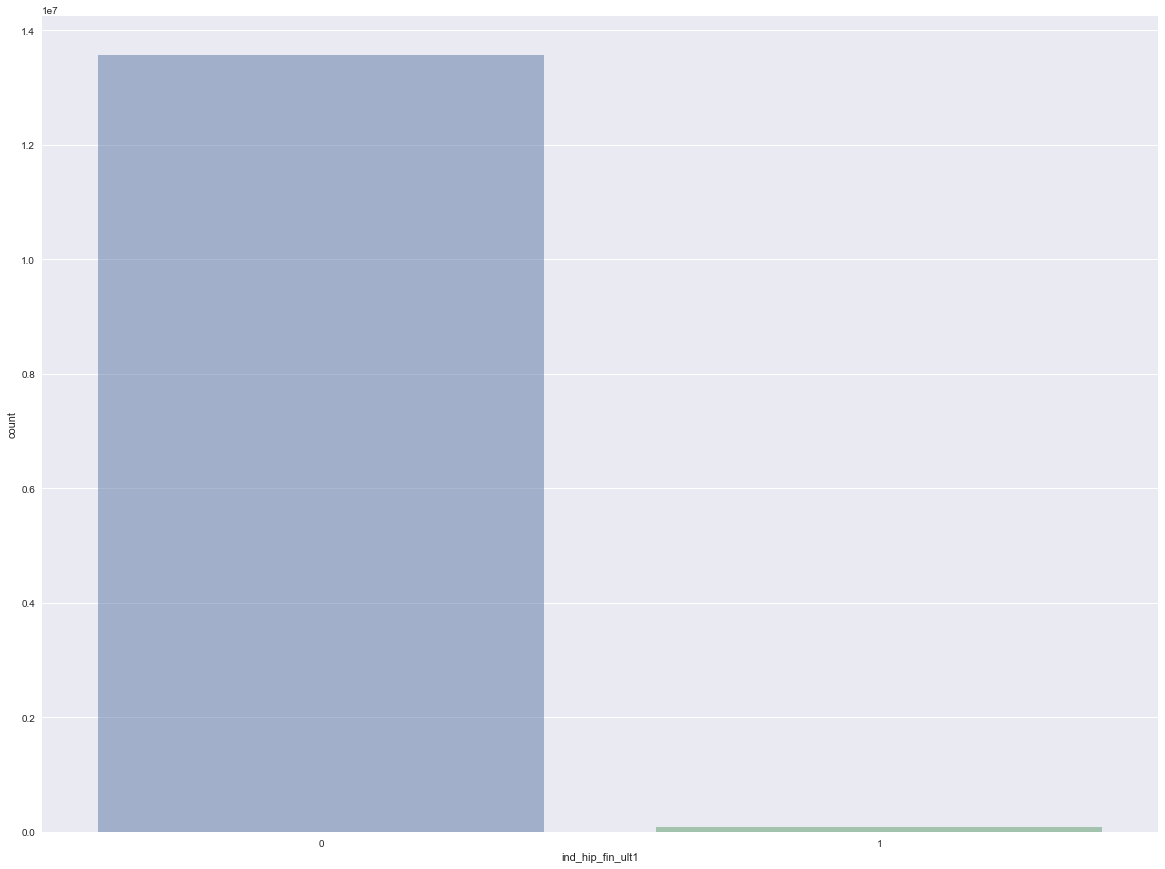

col :  ind_plan_fin_ult1


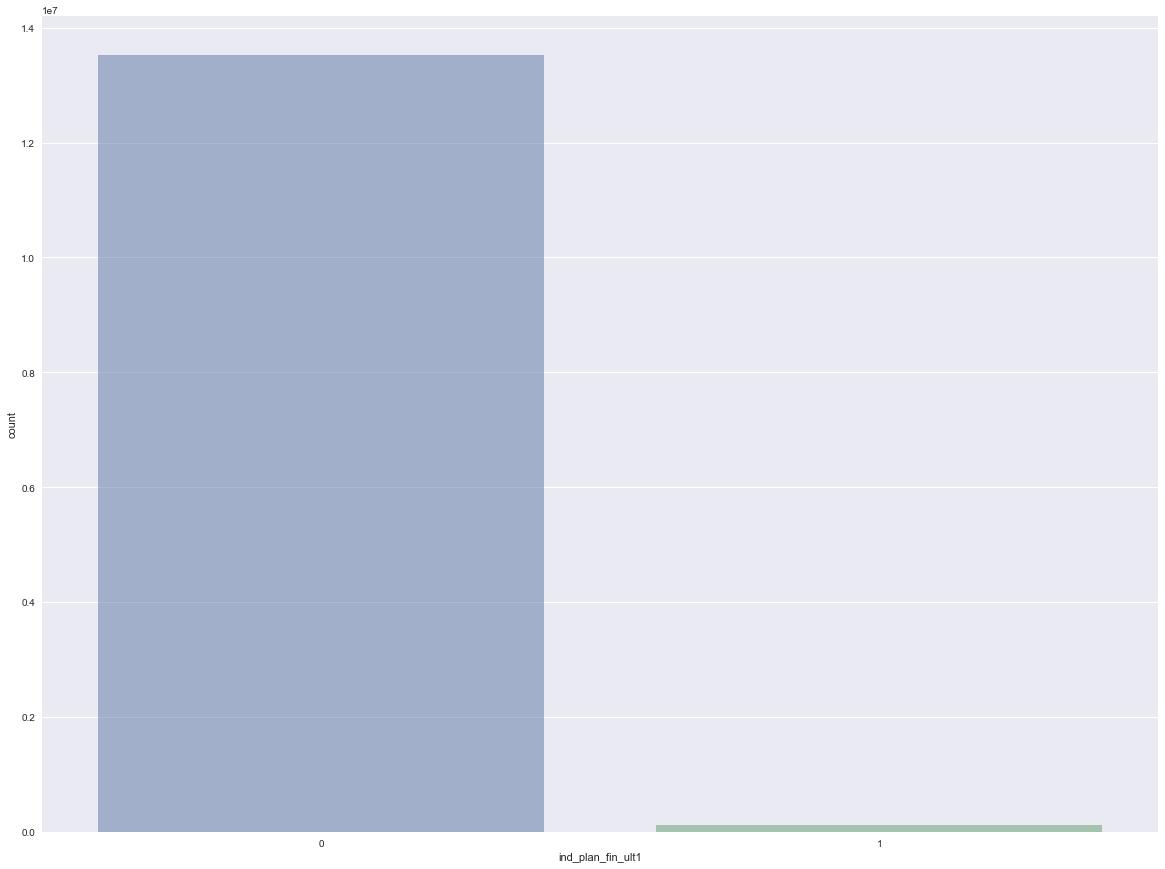

col :  ind_pres_fin_ult1


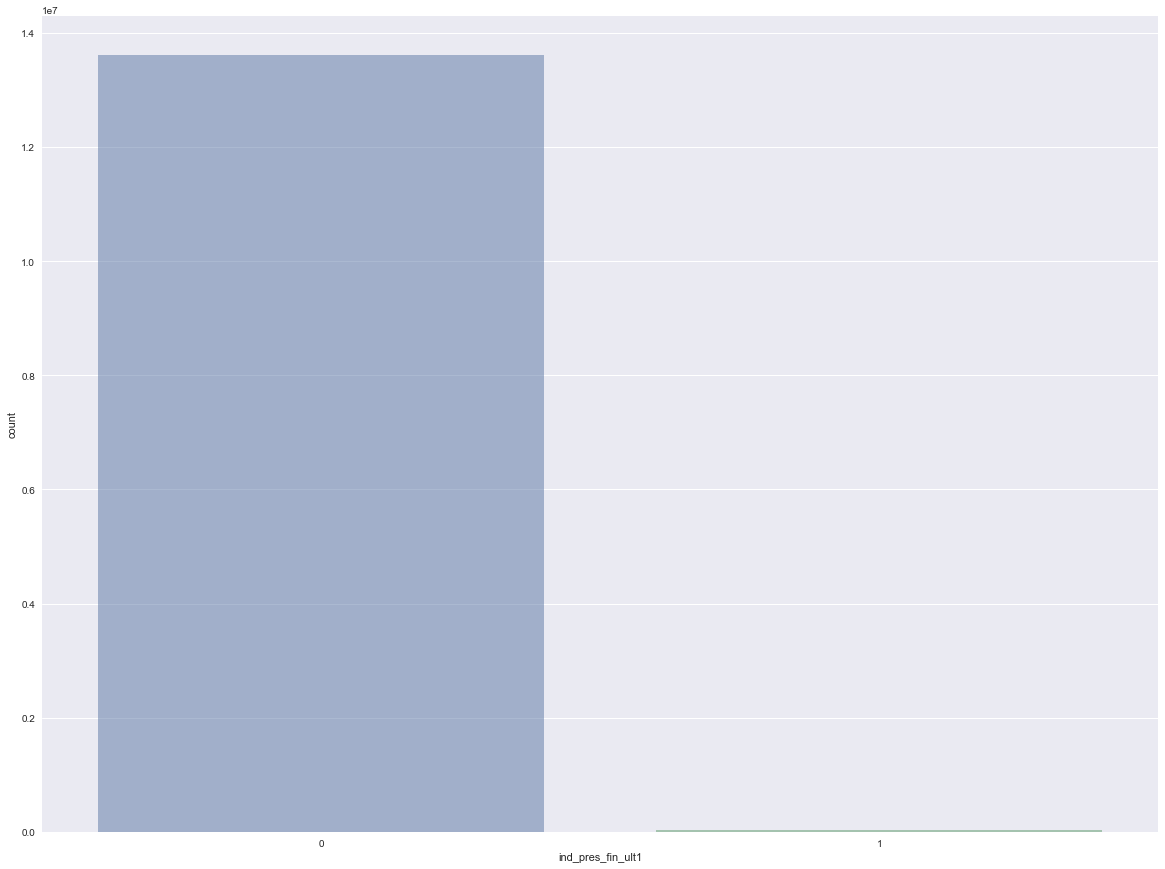

col :  ind_reca_fin_ult1


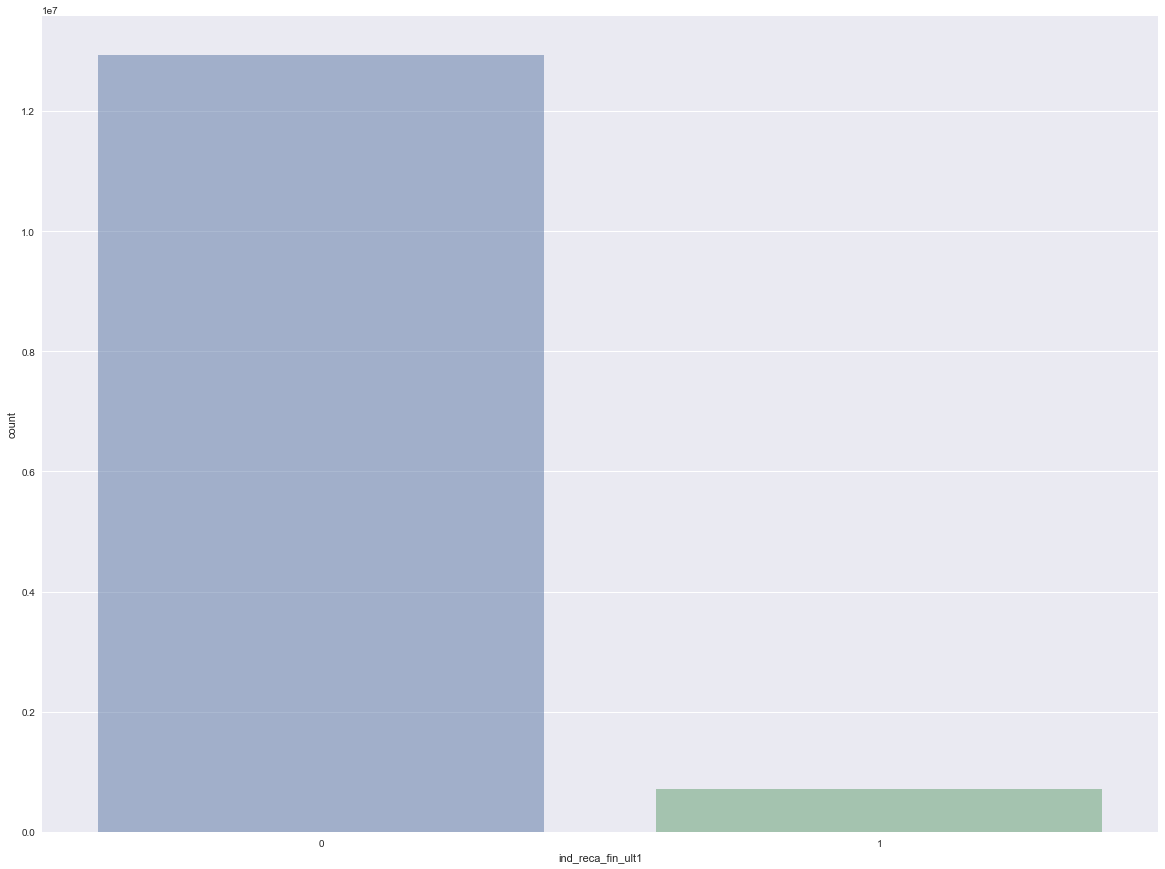

col :  ind_tjcr_fin_ult1


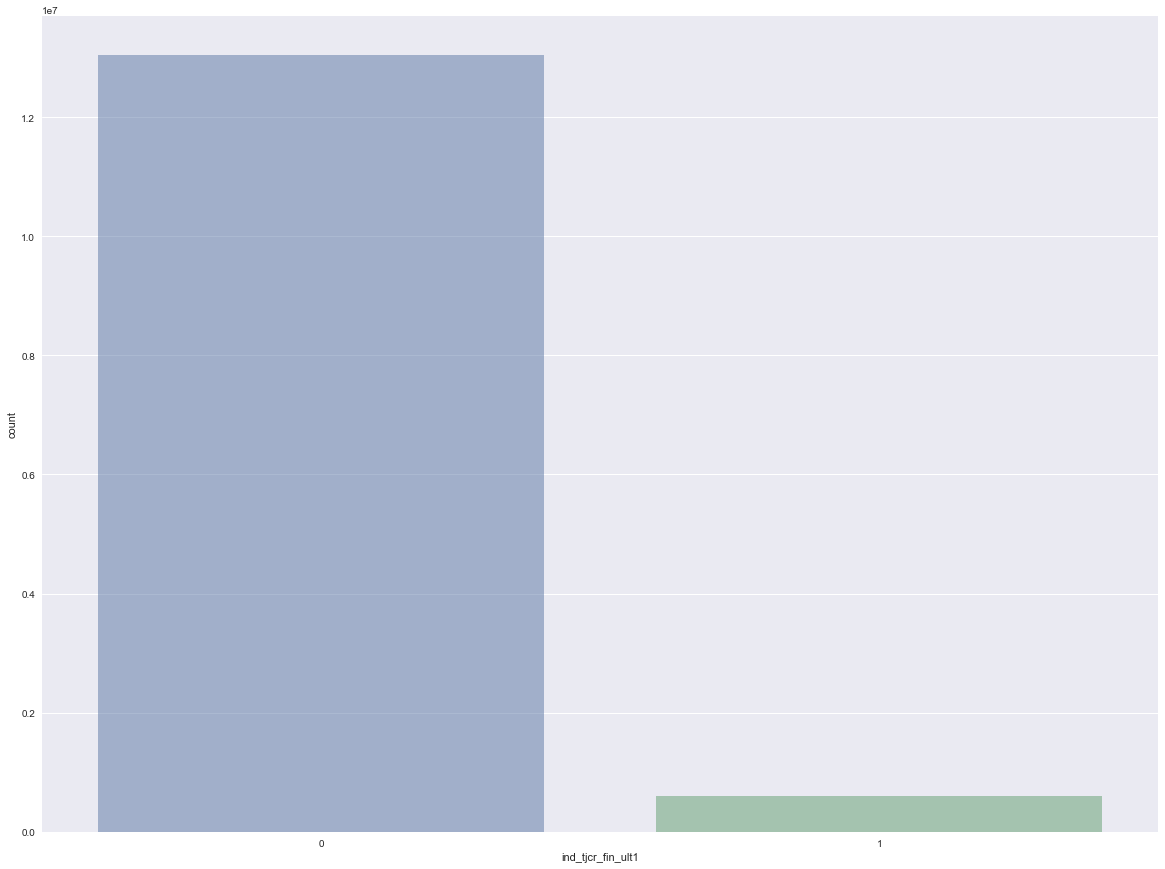

col :  ind_valo_fin_ult1


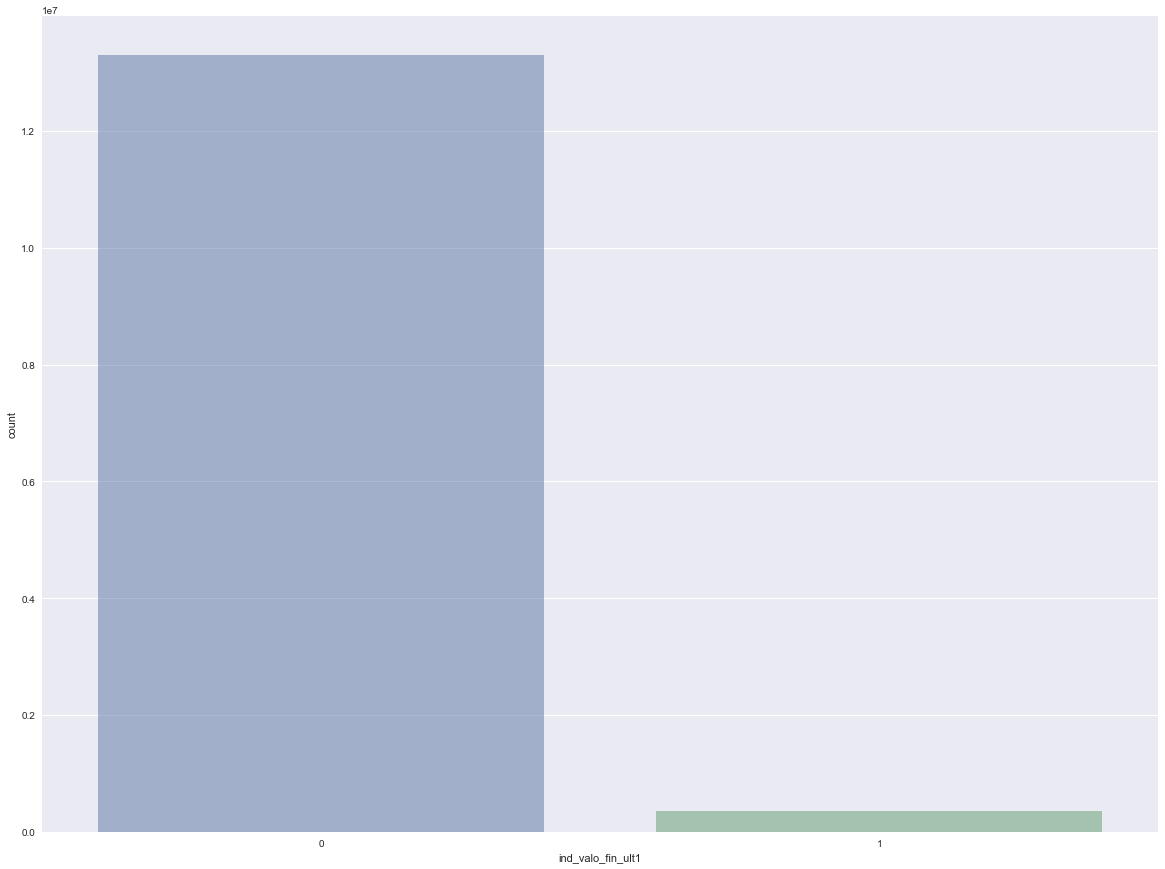

col :  ind_viv_fin_ult1


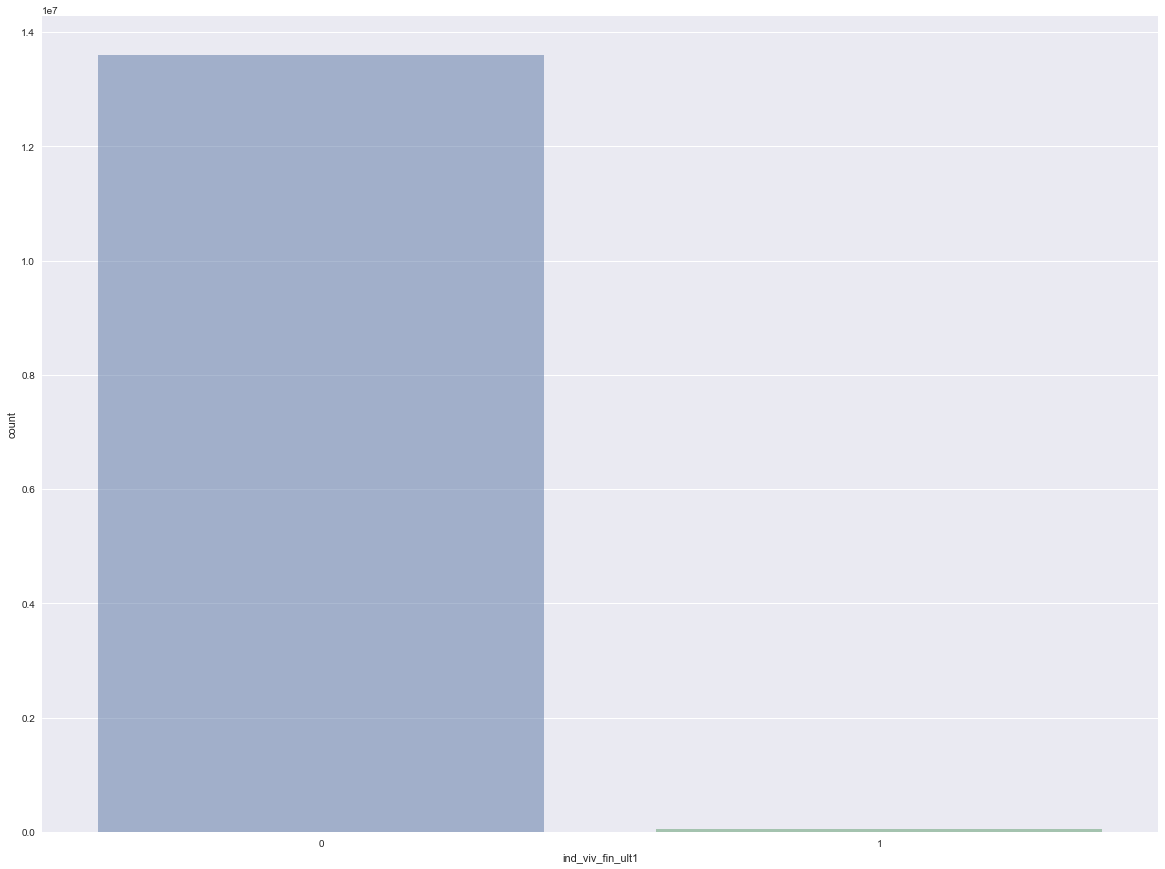

col :  ind_nomina_ult1


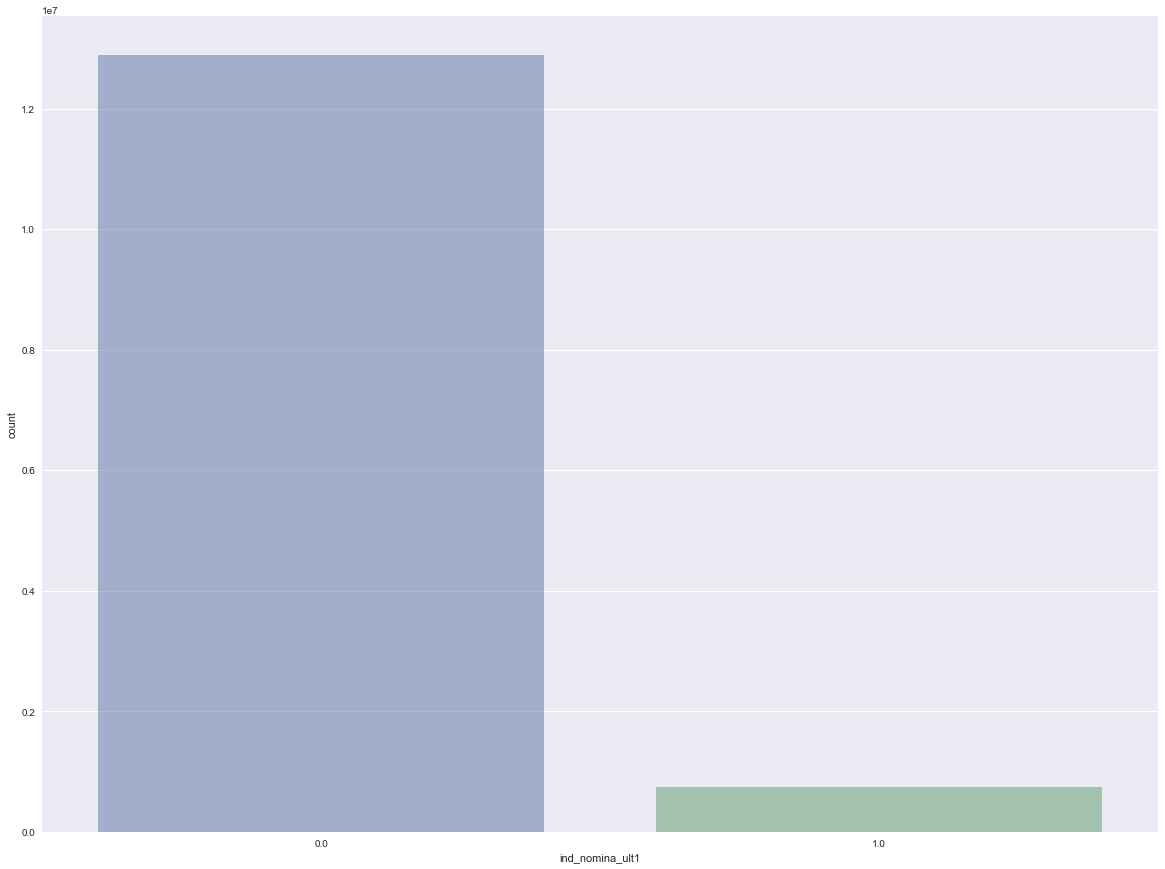

col :  ind_nom_pens_ult1


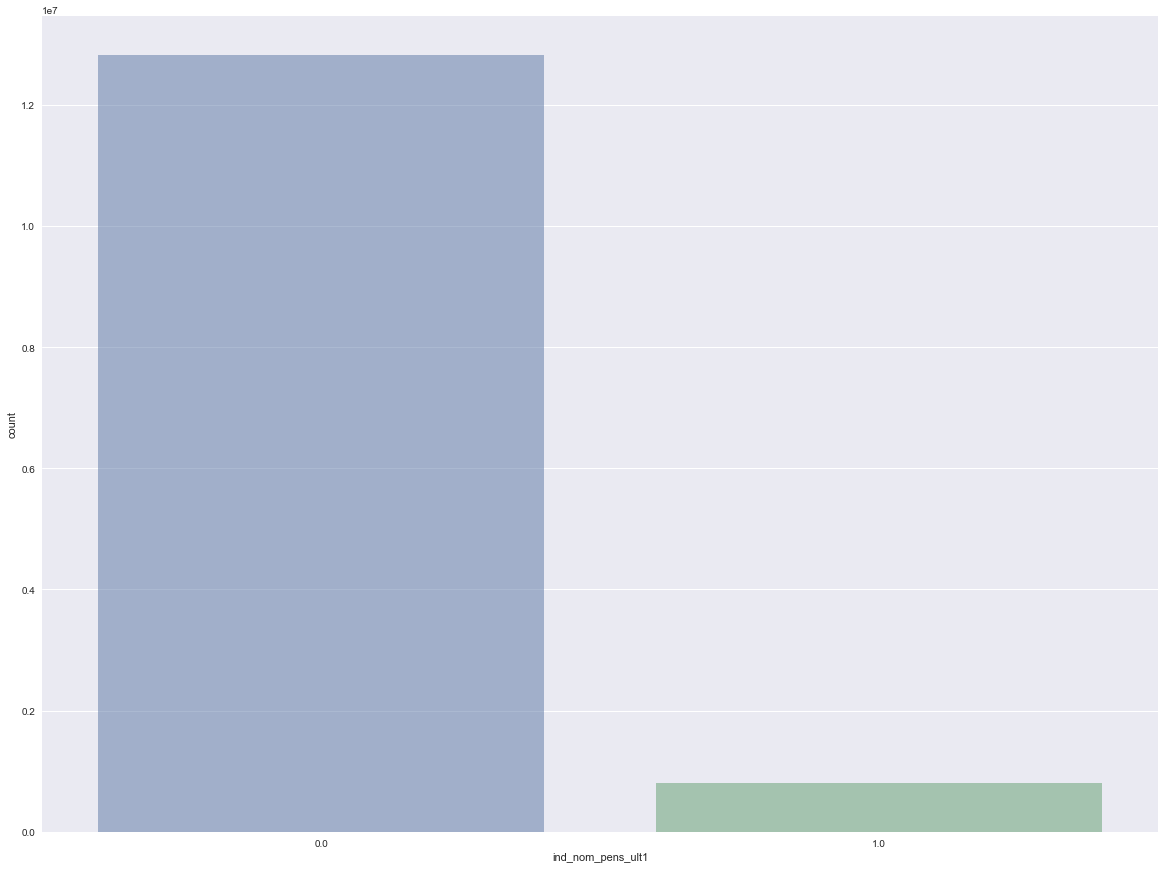

col :  ind_recibo_ult1


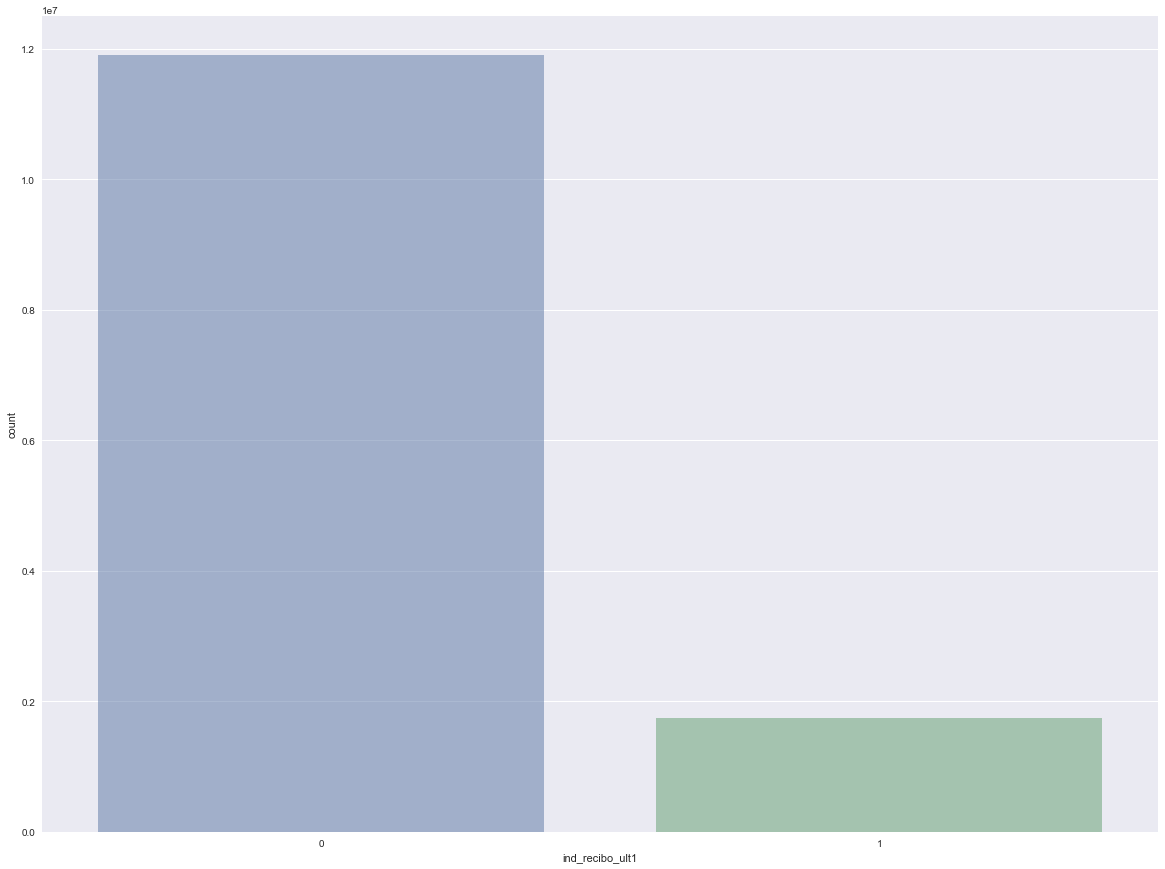

99.0 secs


In [13]:
st = time.time()

flag = False
# histogram of features
for col in trn.columns:
    if col == 'nomprov':
        flag = True
    if flag:
        print '='*50
        print 'col : ', col
        f, ax = plt.subplots(figsize=(20, 15))
        sns.countplot(x=col, data=trn, alpha=0.5)
        plt.show()
    
print_time(time.time(),st)
# 101 secs

### 03 Stacked Histogram

In [14]:
# prepare for visualization

months = np.unique(trn['fecha_dato']).tolist()
label_cols = trn.columns[24:].tolist()

label_over_time = []
for i in range(len(label_cols)):
    label_over_time.append(trn.groupby(['fecha_dato'])[label_cols[i]].agg('sum').tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    
color_list = ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

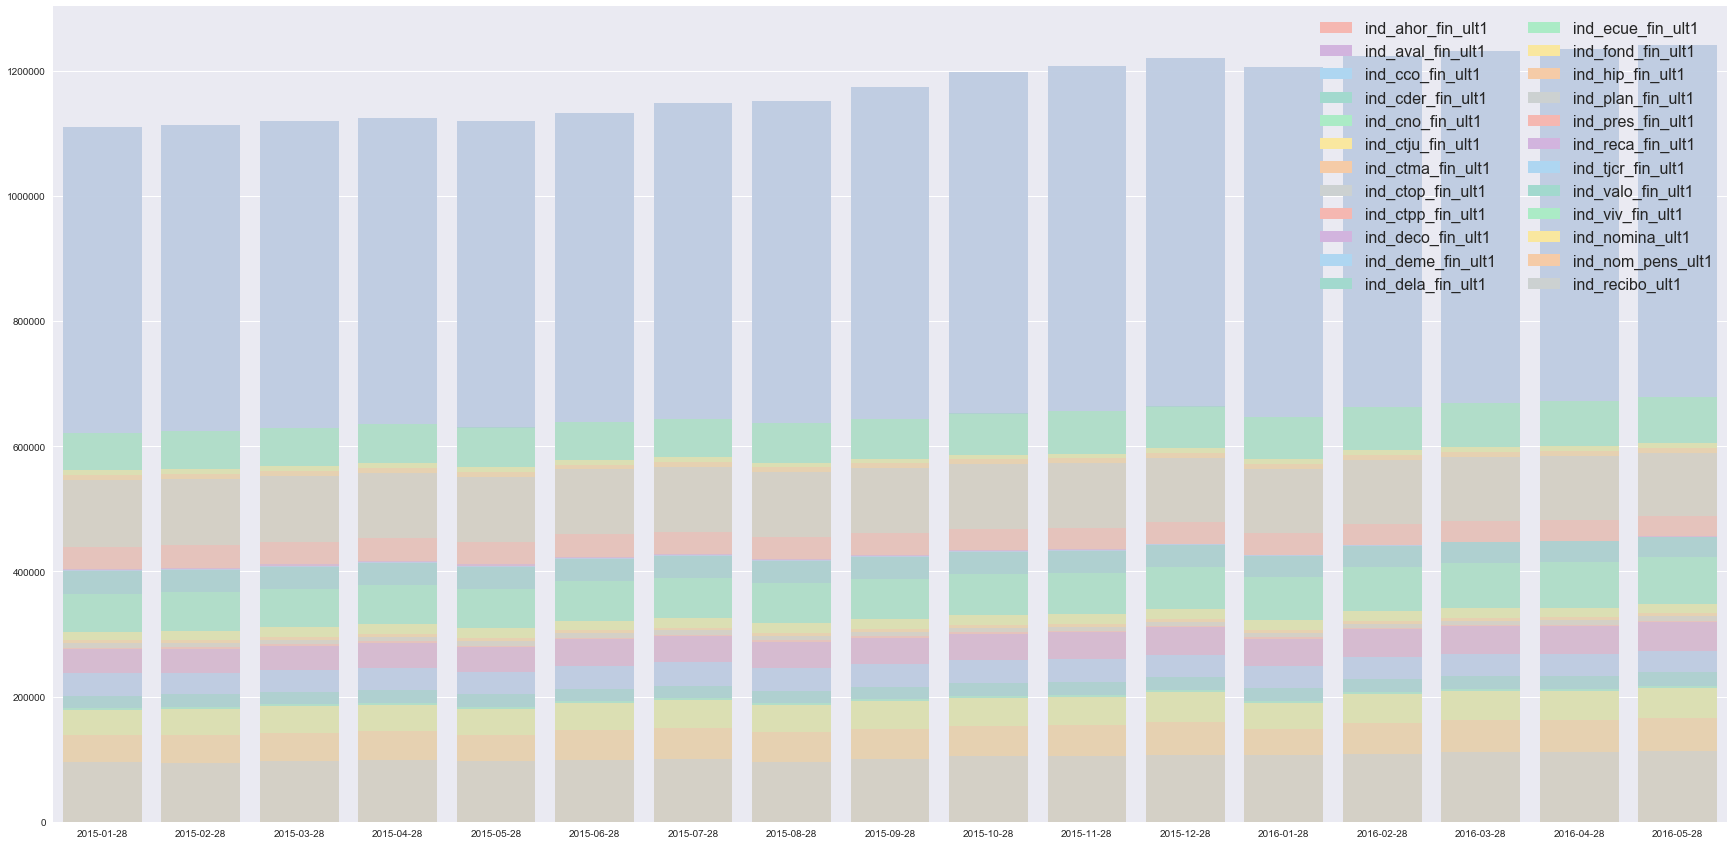

In [15]:
# plot stacked barplot of month vs labels
f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_over_time[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], \
           label_cols, loc=1, ncol = 2, prop={'size':16})

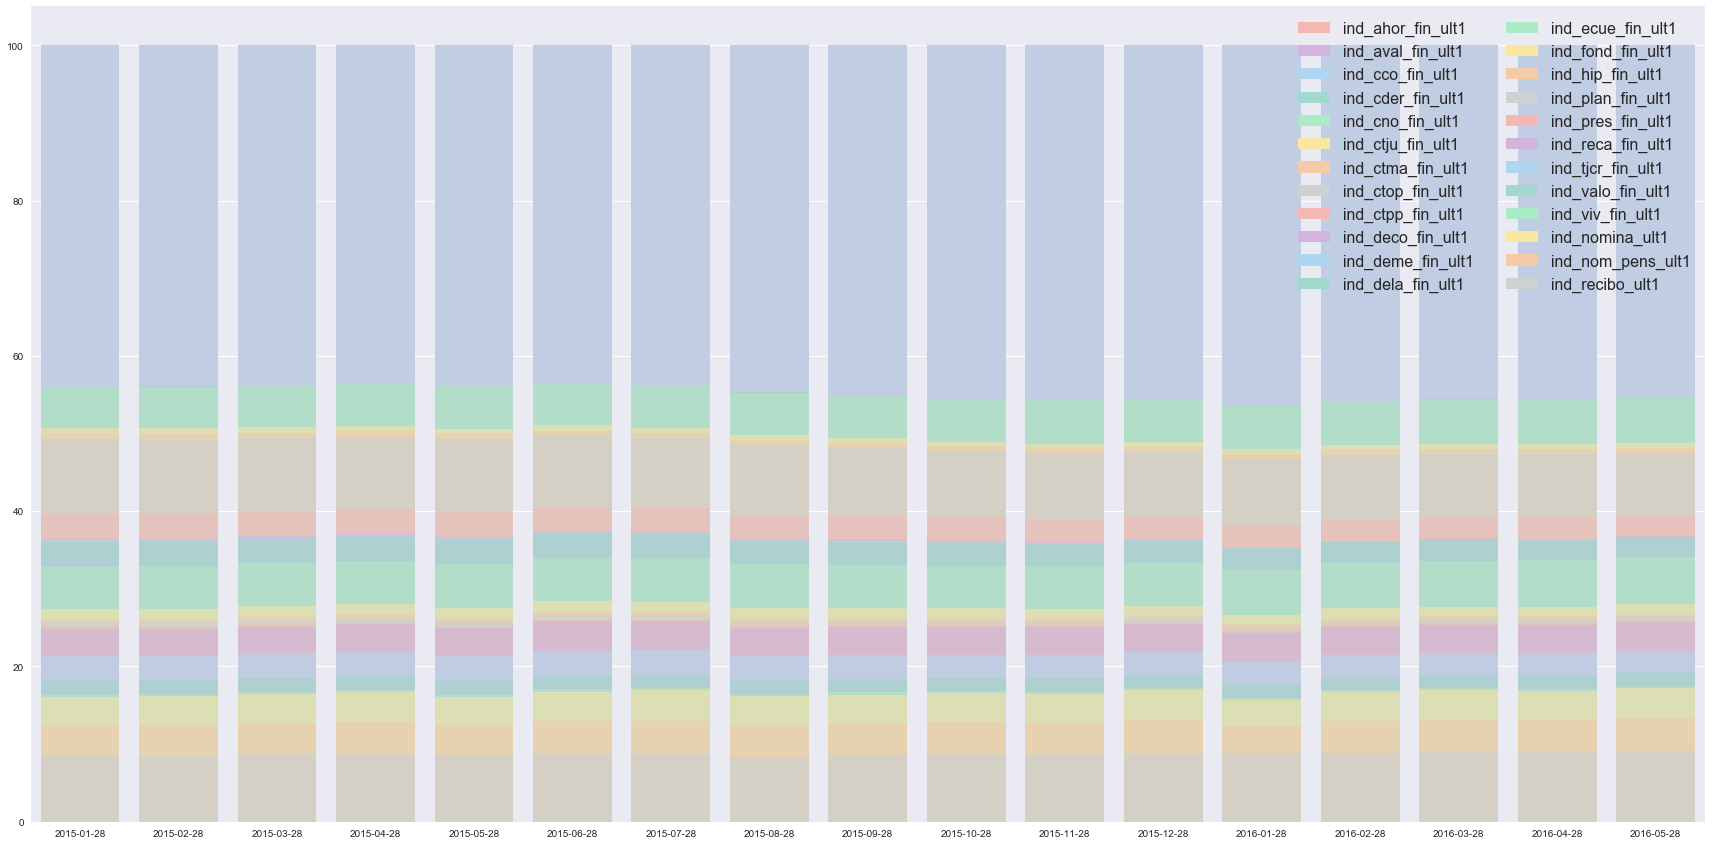

In [16]:
# plot stacked barplot of month vs labels in percentage
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0))) * 100

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], \
           label_cols, loc=1, ncol = 2, prop={'size':16})

### 04 What we want to predict: new purchases

In [17]:
labels = pd.read_csv('../input/labels.csv').astype(int)
fecha_dato = pd.read_csv('../input/train_ver2.csv', usecols=['fecha_dato'])

labels['date'] = fecha_dato.fecha_dato
months = np.unique(fecha_dato.fecha_dato).tolist()
label_cols = labels.columns.tolist()[:24]

# prepare for visualization

label_over_time = []
for i in range(len(label_cols)):
    label_over_time.append(labels.groupby(['date'])[label_cols[i]].agg('sum').tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    
color_list = ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

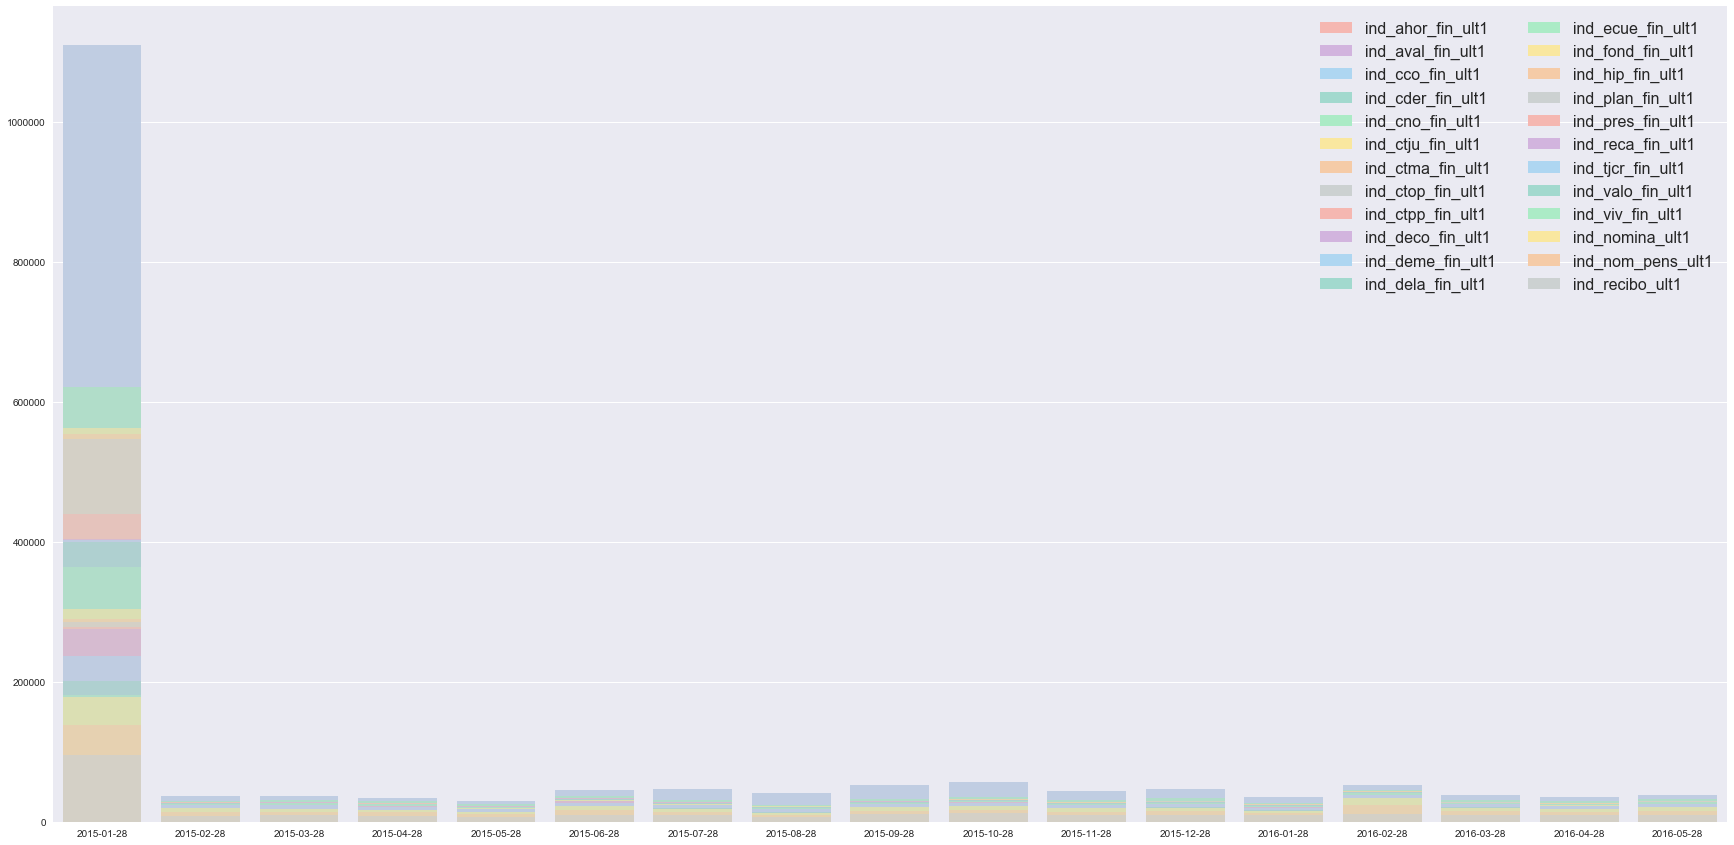

In [18]:
# plot stacked barplot of month vs labels
f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_over_time[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], \
           label_cols, loc=1, ncol = 2, prop={'size':16})

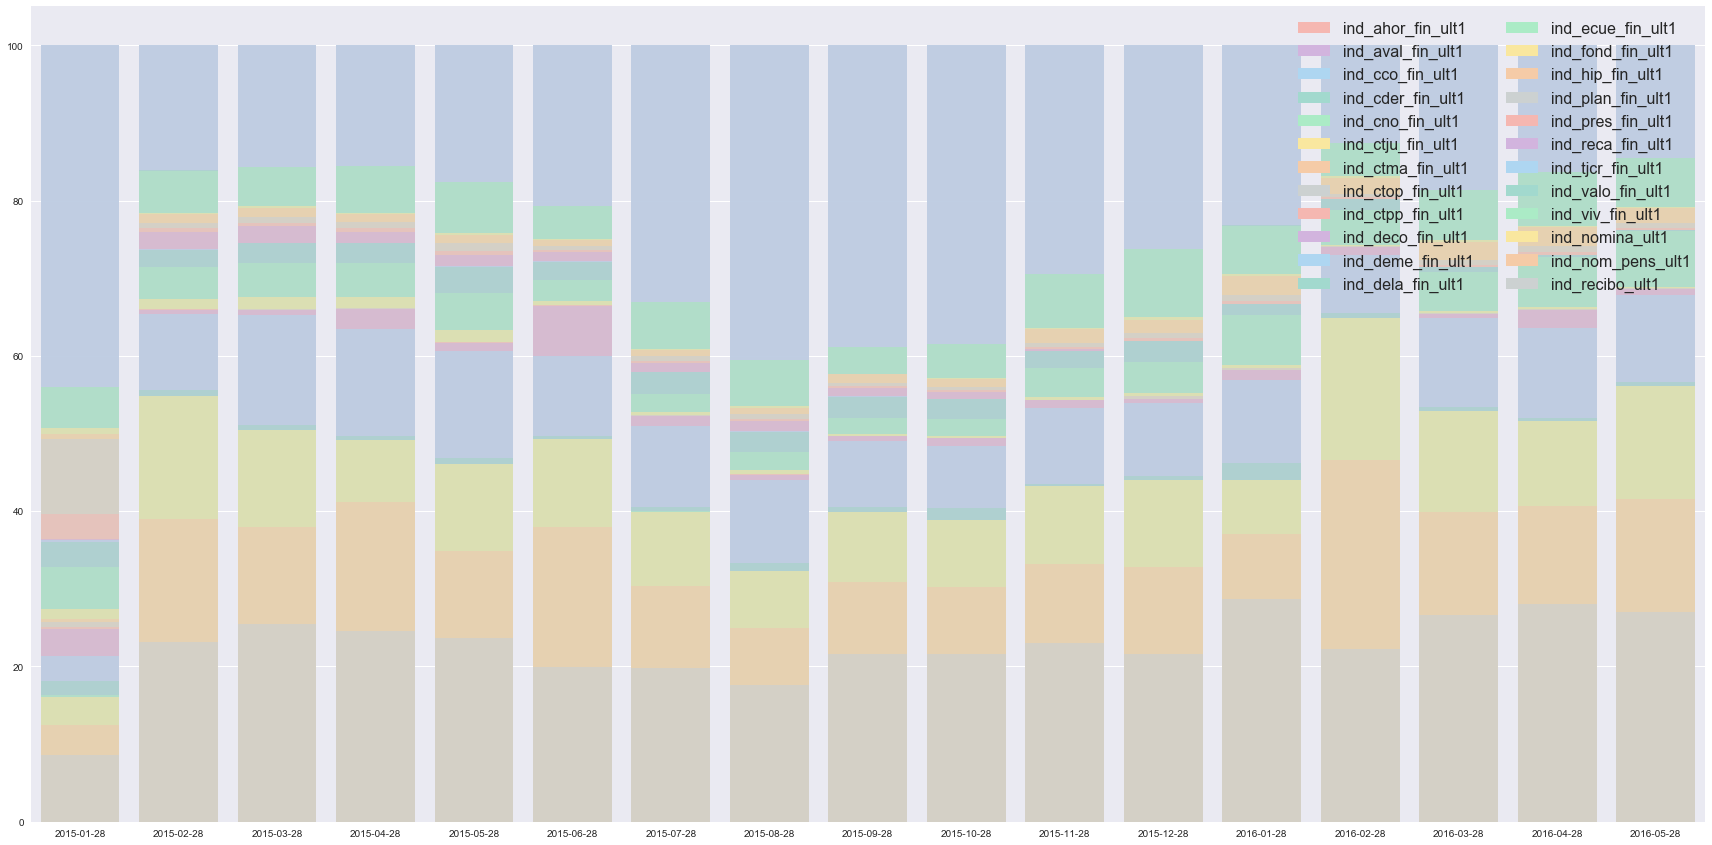

In [19]:
# plot stacked barplot of month vs labels in percentage
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0))) * 100

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], \
           label_cols, loc=1, ncol = 2, prop={'size':16})

### 05 Trim Data and Melt

##### Use Jun 2015 Data only
    - less data       == less information
    - less noise data == better information
    
    To Do:
        - clean NAs and strings
        - convert into single target column
        - save as train.csv

In [20]:
# use only June 2015 data
june_only = labels[labels.date == '2015-06-28'].iloc[:,:24]
june_only['add'] = june_only.sum(axis=1)
print sum(june_only['add'] > 0) # this must be 36k

36673


In [21]:
target_cols = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1',
       'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1']

In [22]:
st = time.time()
# load data
labels = pd.read_csv('../input/labels.csv').astype(int)
trn = pd.read_csv('../input/train_ver2.csv')
fecha_dato = trn['fecha_dato']

# get index
train_index = (labels[fecha_dato == '2015-06-28'].sum(axis=1) > 0)
train_index = train_index[train_index == True]

# trim train data and save
train = trn.ix[train_index.index]
train.iloc[:,24:] = labels.ix[train_index.index]

# melt data into single target dataframe
data = []
for ind, (run, row) in enumerate(train.iterrows()):
    for i in range(24):
        if row[24+i] == 1:
            temp = row[:24].values.tolist()
            temp.append(i)
            data.append(temp)
            
cols = trn.columns[:24].tolist()
cols.append('target')
train = pd.DataFrame(data, columns = cols)
train.to_csv('../input/train.csv',index=False)

print_time(time.time(),st)
# 232 secs

213.0 secs


In [23]:
### Refresh kernel to clear memory

### 06 EDA on Clean Data _ General

In [24]:
st = time.time()
# load data
trn = pd.read_csv('../input/train.csv')

# check column names
print '='*50
print 'trn.columns:\n',trn.columns

# check head
print '='*50
print 'trn.head():\n', trn.head()

# check overall stat
print '='*50
print 'trn.info():\n',trn.info()

print_time(time.time(),st)
# 1 secs

trn.columns:
Index([u'fecha_dato', u'ncodpers', u'ind_empleado', u'pais_residencia',
       u'sexo', u'age', u'fecha_alta', u'ind_nuevo', u'antiguedad', u'indrel',
       u'ult_fec_cli_1t', u'indrel_1mes', u'tiprel_1mes', u'indresi',
       u'indext', u'conyuemp', u'canal_entrada', u'indfall', u'tipodom',
       u'cod_prov', u'nomprov', u'ind_actividad_cliente', u'renta',
       u'segmento', u'target'],
      dtype='object')
trn.head():
   fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2015-06-28   1063111            N              ES    V   28  2012-09-19   
1  2015-06-28   1063111            N              ES    V   28  2012-09-19   
2  2015-06-28   1063273            N              ES    V   37  2012-09-19   
3  2015-06-28   1063273            N              ES    V   37  2012-09-19   
4  2015-06-28   1063250            N              ES    H   40  2012-09-19   

   ind_nuevo antiguedad  indrel   ...   conyuemp  canal_entrada indfall  \
0        0.0   

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
# clean data

for col in trn.columns:
    print col, np.unique(trn[col])

fecha_dato ['2015-06-28']
ncodpers [  15892   15896   15897 ..., 1403827 1403934 1403935]
ind_empleado [nan 'A' 'B' 'F' 'N']
pais_residencia [nan 'AD' 'AR' 'AT' 'AU' 'BE' 'BR' 'CH' 'CL' 'CO' 'DE' 'DO' 'ES' 'FI' 'FR'
 'GA' 'GB' 'GQ' 'GR' 'IT' 'MA' 'MX' 'NG' 'NL' 'OM' 'PA' 'PE' 'PL' 'PT' 'SG'
 'US' 'VE']
sexo [nan 'H' 'V']
age ['  2' '  3' '  4' '  5' '  6' '  8' '  9' ' 10' ' 11' ' 12' ' 13' ' 14'
 ' 15' ' 16' ' 17' ' 18' ' 19' ' 20' ' 21' ' 22' ' 23' ' 24' ' 25' ' 26'
 ' 27' ' 28' ' 29' ' 30' ' 31' ' 32' ' 33' ' 34' ' 35' ' 36' ' 37' ' 38'
 ' 39' ' 40' ' 41' ' 42' ' 43' ' 44' ' 45' ' 46' ' 47' ' 48' ' 49' ' 50'
 ' 51' ' 52' ' 53' ' 54' ' 55' ' 56' ' 57' ' 58' ' 59' ' 60' ' 61' ' 62'
 ' 63' ' 64' ' 65' ' 66' ' 67' ' 68' ' 69' ' 70' ' 71' ' 72' ' 73' ' 74'
 ' 75' ' 76' ' 77' ' 78' ' 79' ' 80' ' 81' ' 82' ' 83' ' 84' ' 85' ' 86'
 ' 87' ' 88' ' 89' ' 90' ' 91' ' 92' ' 93' ' 94' ' 95' ' 96' ' 97' ' 98'
 ' NA' '100' '101' '110' '113' '116']
fecha_alta [nan '1995-01-16' '1995-02-06' ..., '201

In [26]:
st = time.time()
# load data
trn = pd.read_csv('../input/train.csv').drop(['target', 'tipodom'], axis=1)
tst = pd.read_csv('../input/test_ver2.csv').drop(['tipodom'], axis=1)

# clean NAs
col = 'ind_empleado'
trn[col].fillna('NN',inplace=True)

col = 'pais_residencia'
trn[col].fillna('NN',inplace=True)

col = 'sexo'
trn[col].fillna('NN',inplace=True)
tst[col].fillna('NN',inplace=True)

col = 'age'
trn[col].replace(' NA', 0, inplace=True)
trn[col] = trn[col].astype(np.int64)

col = 'fecha_alta'
trn[col].fillna('2015-06-30',inplace=True)

col = 'ind_nuevo'
trn[col].fillna(-1,inplace=True)
trn[col] = trn[col].astype(int)

col = 'antiguedad'
trn[col].replace('     NA', 0, inplace=True)
trn[col] = trn[col].astype(np.int64)
tst[col].replace(-999999, 0, inplace=True)

col = 'indrel'
trn[col].fillna(0, inplace=True)
trn[col].replace(99,2, inplace=True)
trn[col] = trn[col].astype(int)
tst[col].replace(99,2, inplace=True)

col = 'ult_fec_cli_1t'
trn[col].fillna('2015-06-30', inplace=True)
tst[col].fillna('2016-05-30', inplace=True)

col = 'indrel_1mes'
trn[col].fillna(2, inplace=True)
tst[col].fillna(2, inplace=True)
trn[col] = trn[col].astype(int)
tst[col] = tst[col].astype(int)

col = 'tiprel_1mes'
trn[col].fillna('NN', inplace=True)
tst[col].fillna('NN', inplace=True)

col = 'indresi'
trn[col].fillna('NN', inplace=True)

col = 'indext'
trn[col].fillna('NN', inplace=True)

col = 'conyuemp'
trn[col].fillna('NN', inplace=True)
tst[col].fillna('NN', inplace=True)

col = 'canal_entrada'
trn[col].fillna('NN', inplace=True)
tst[col].fillna('NN', inplace=True)

col = 'indfall'
trn[col].fillna('NN', inplace=True)

col = 'tipodom'
# drop tipodom, tst has only one unique value

col = 'cod_prov'
trn[col].fillna(0, inplace=True)
tst[col].fillna(0, inplace=True)
trn[col] = trn[col].astype(int)
tst[col] = tst[col].astype(int)

col = 'nomprov'
trn[col].fillna('NN', inplace=True)
tst[col].fillna('NN', inplace=True)
trn[col].replace('CORU\xc3\x91A, A','CORU',inplace=True)
tst[col].replace('CORU\xc3\x91A, A','CORU',inplace=True)

col = 'ind_actividad_cliente'
trn[col].fillna(-1, inplace=True)
trn[col] = trn[col].astype(int)

col = 'renta'
trn[col].fillna(0, inplace=True)
tst[col].replace('         NA', 0, inplace=True)
tst[col] = tst[col].astype(np.float64)

col = 'segmento'
trn[col].fillna('NN', inplace=True)
tst[col].fillna('NN', inplace=True)

# save
trn.to_csv('../input/train_clean.csv',index=False)
tst.to_csv('../input/test_clean.csv', index=False)

print_time(time.time(),st)
# 11 secs

10.0 secs


In [27]:
# re-run the previous np.unique(col)

### 07 EDA on Clean Data _ Histogram

col :  fecha_dato


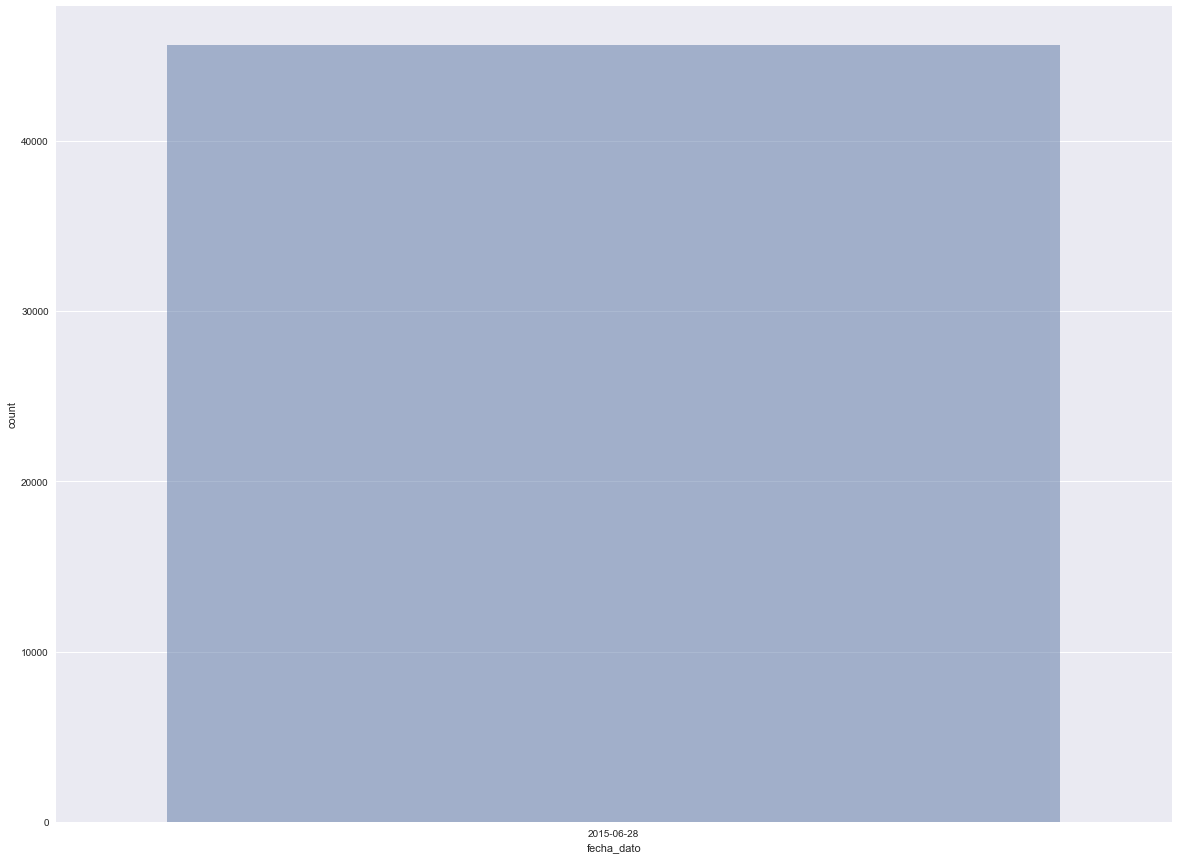

col :  ind_empleado


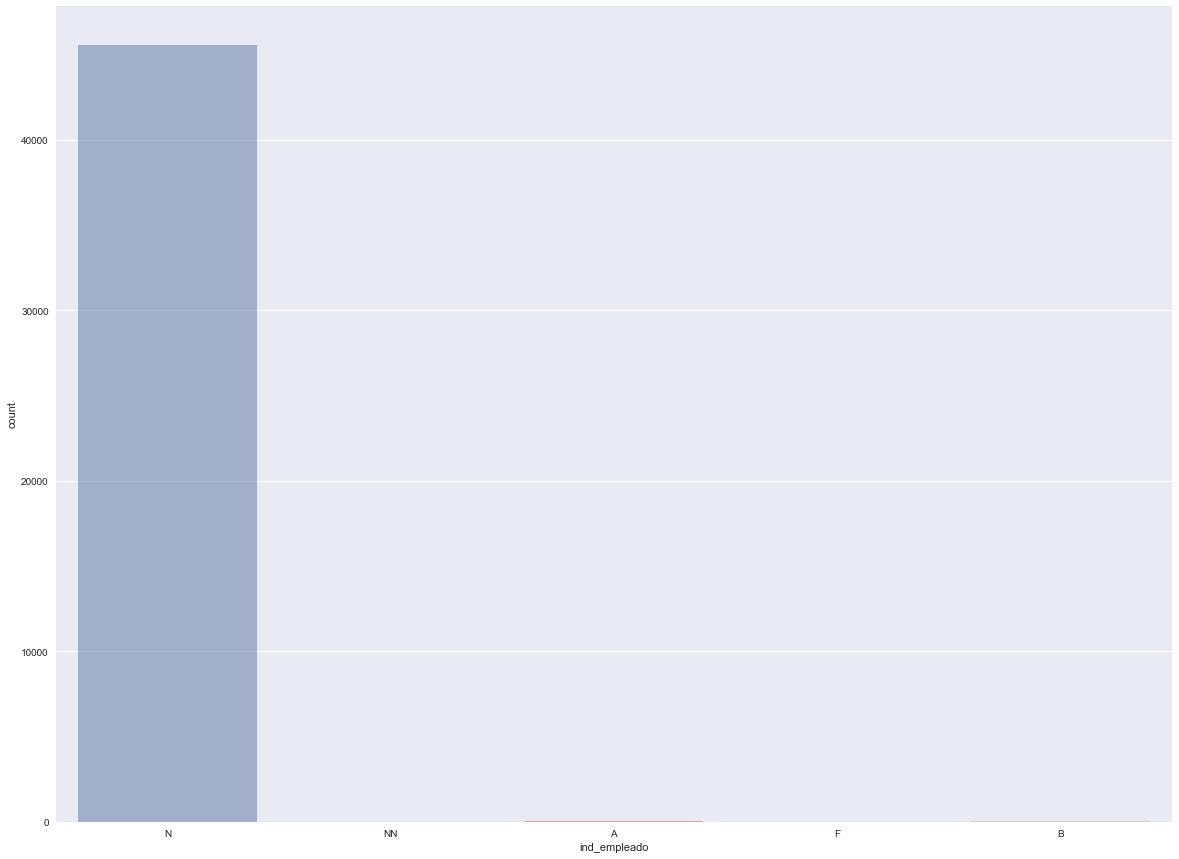

col :  pais_residencia


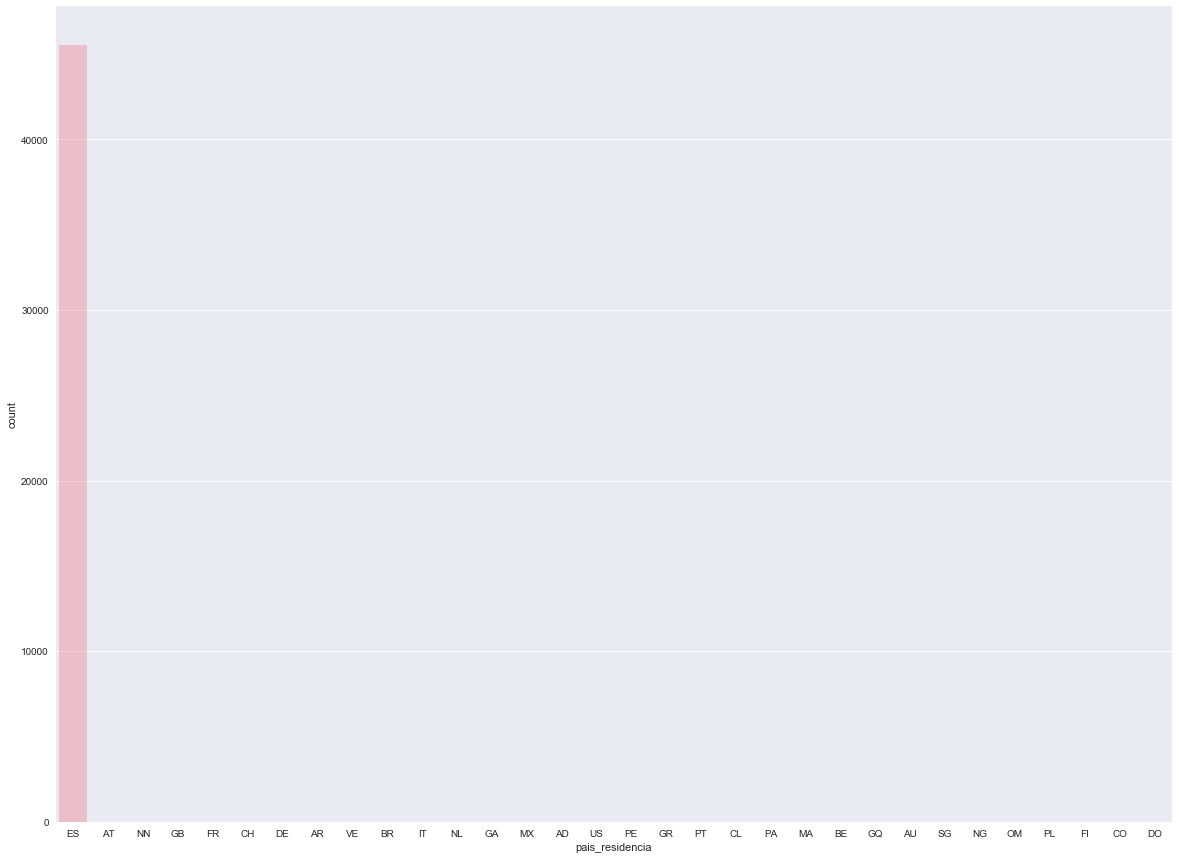

col :  sexo


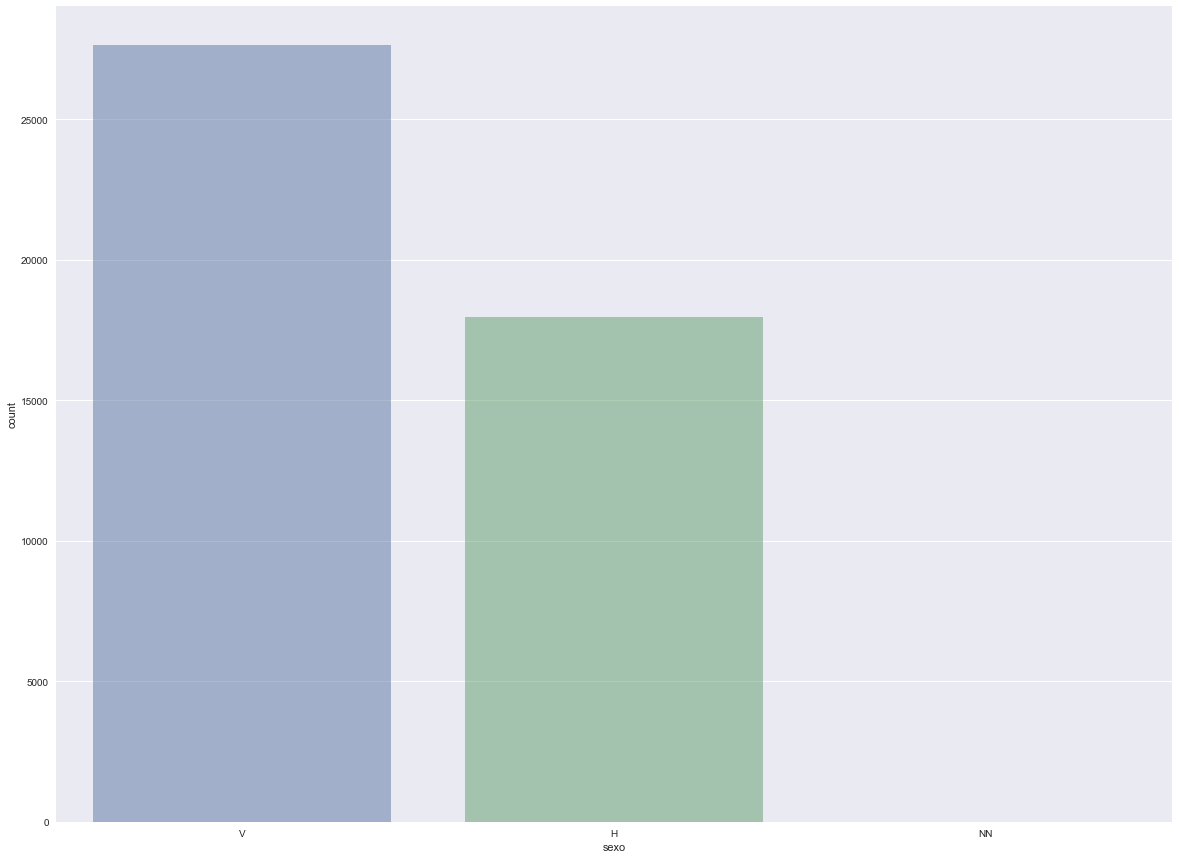

col :  age


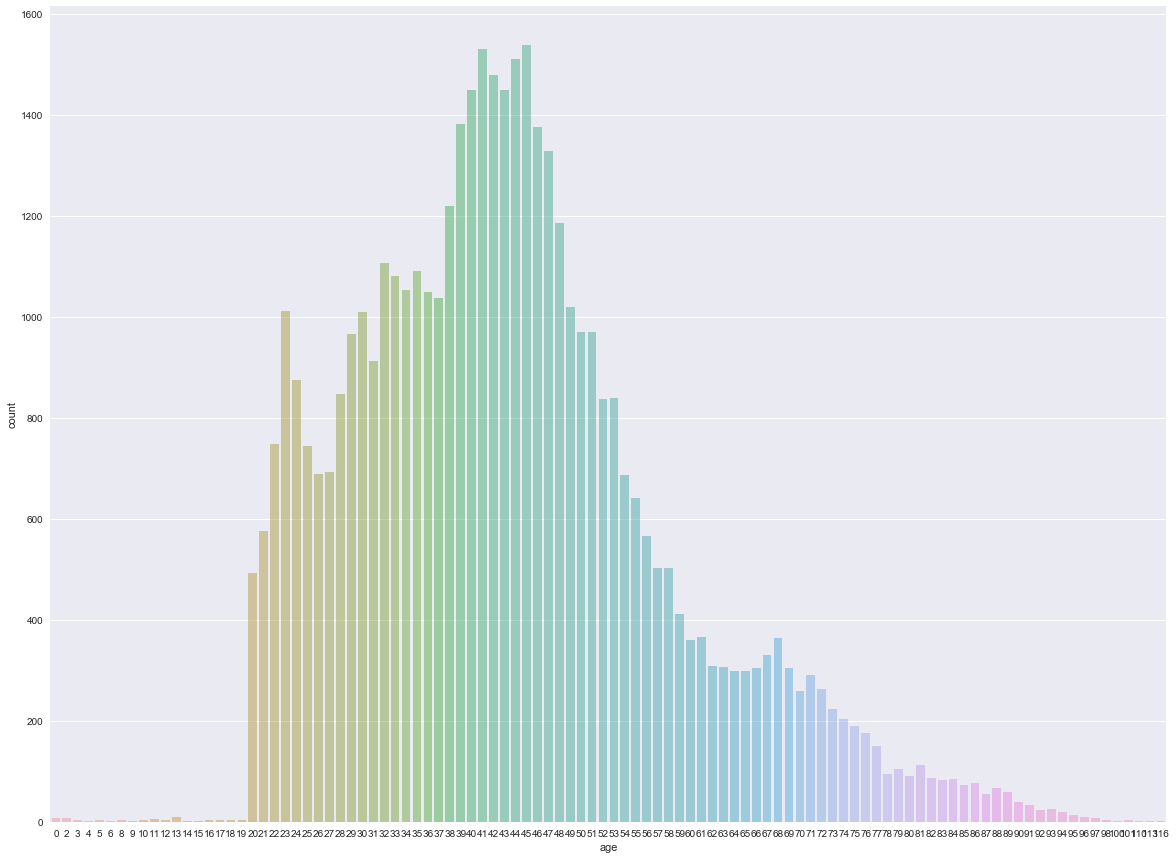

col :  fecha_alta


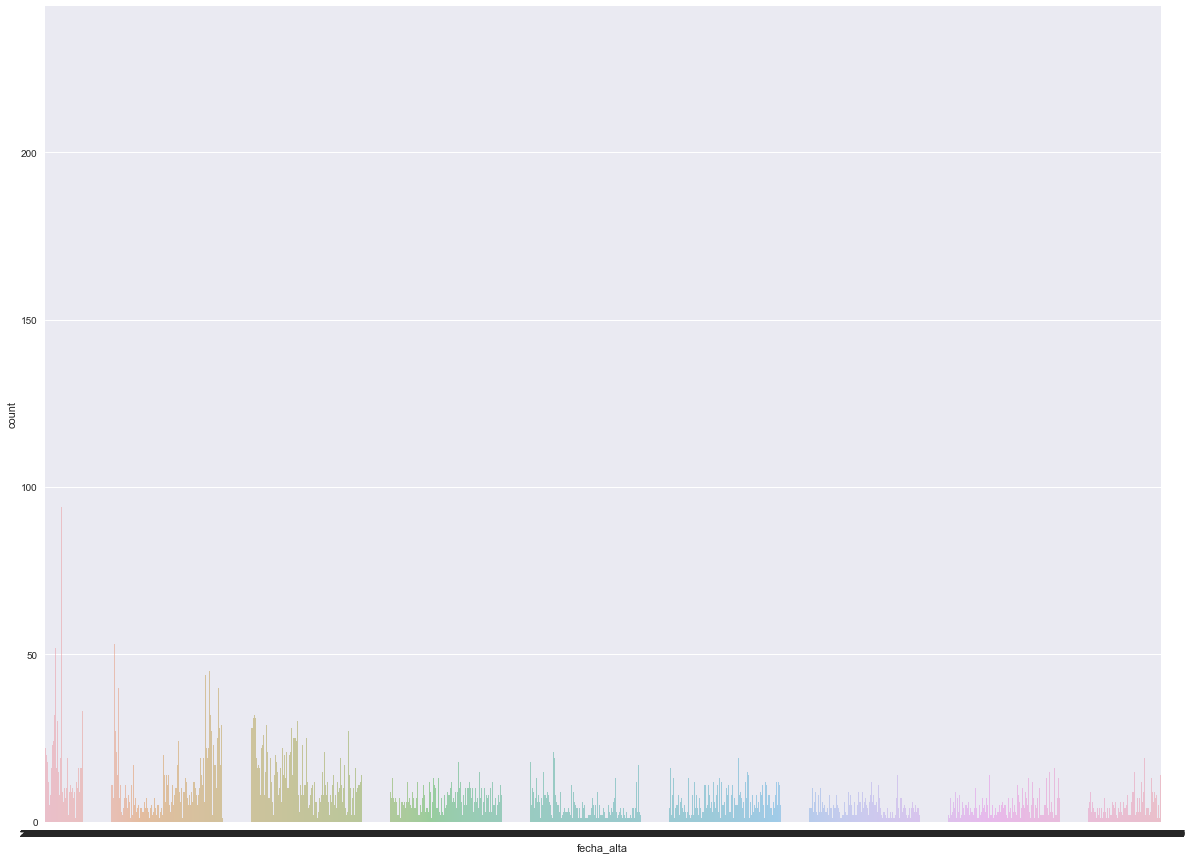

col :  ind_nuevo


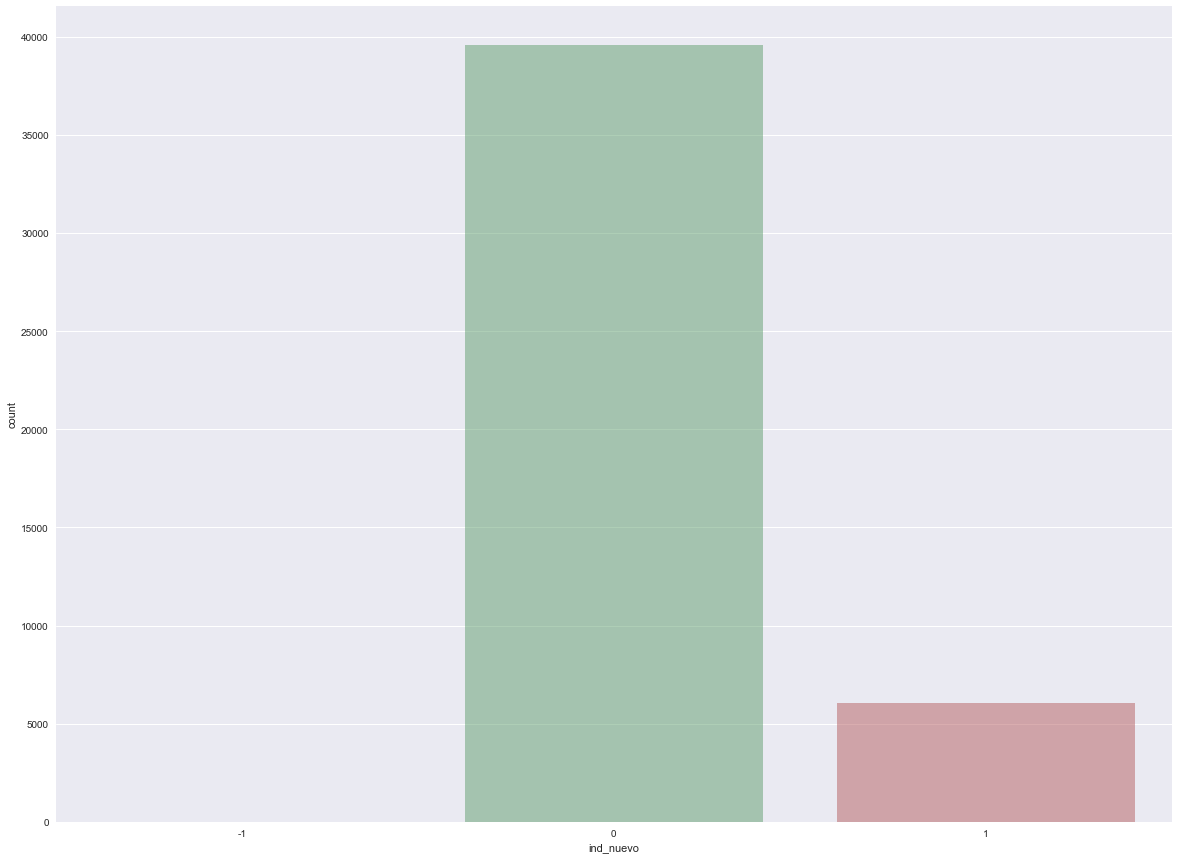

col :  antiguedad


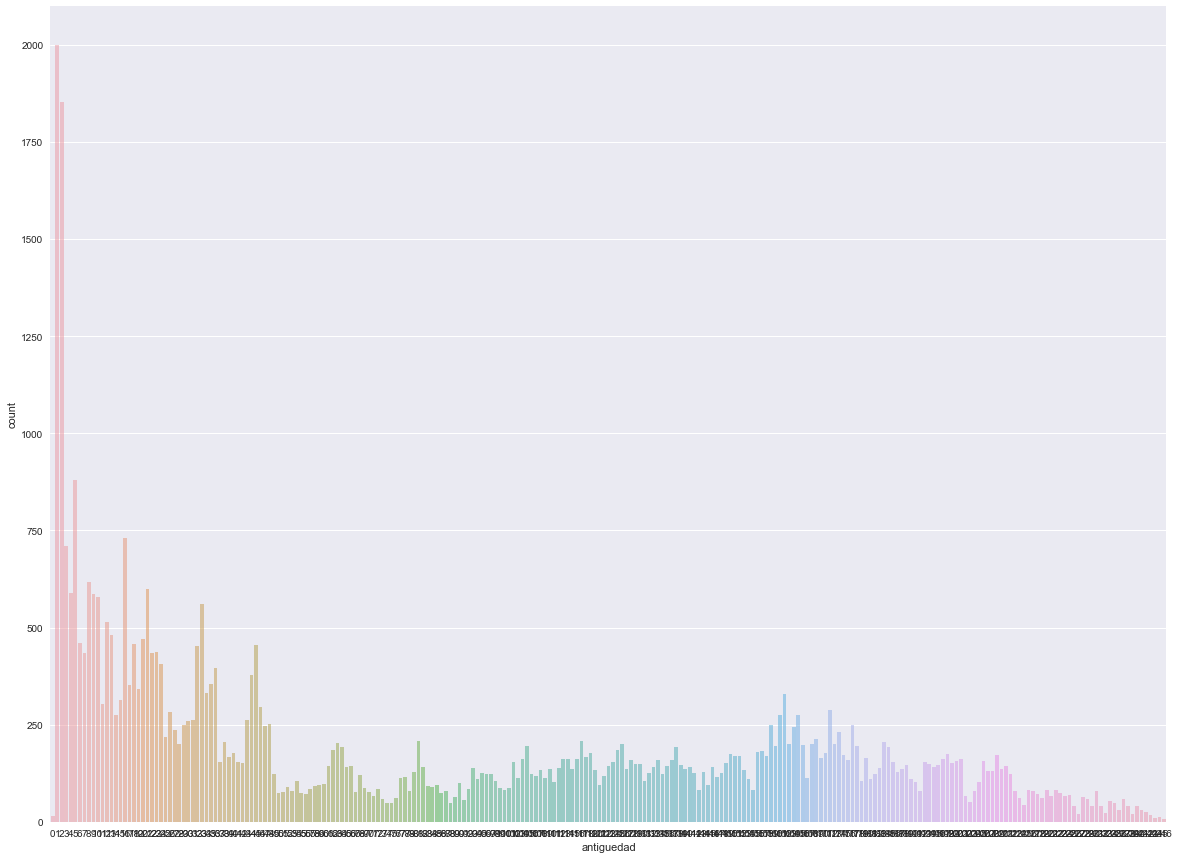

col :  indrel


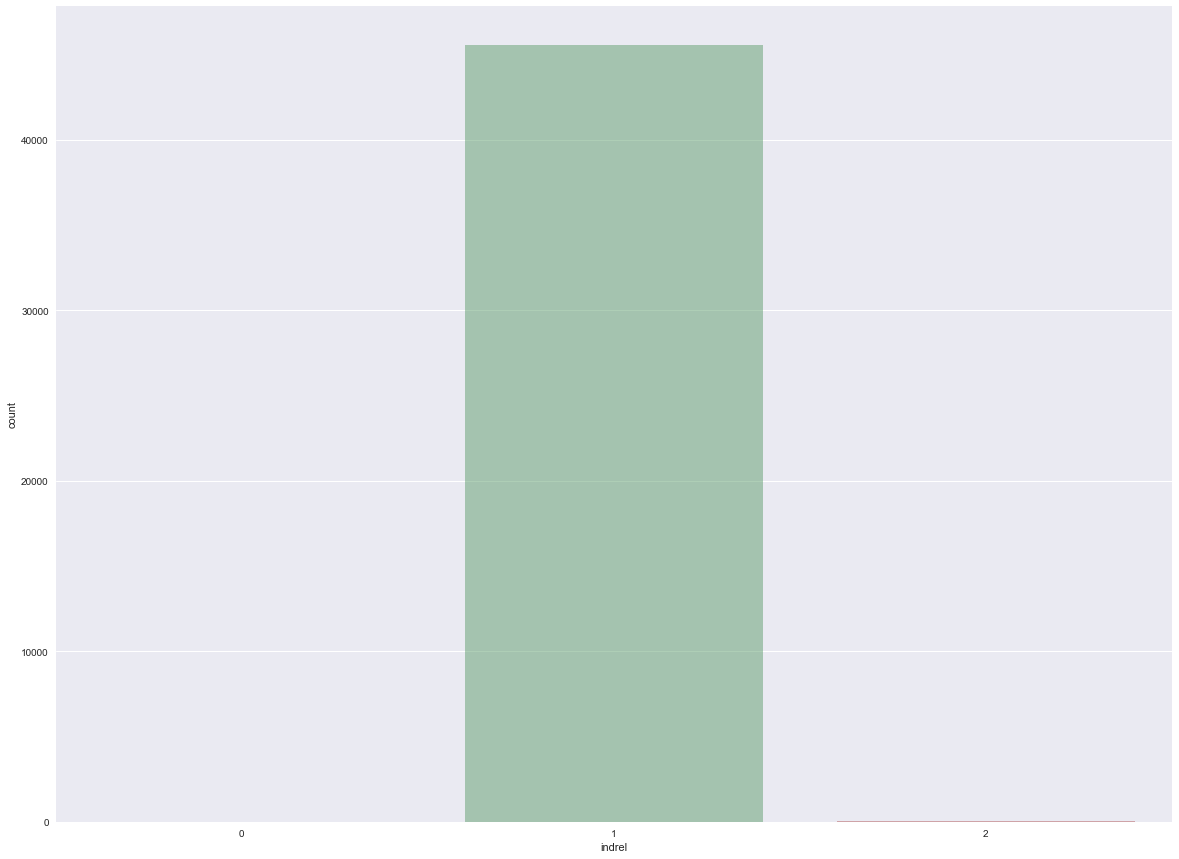

col :  ult_fec_cli_1t


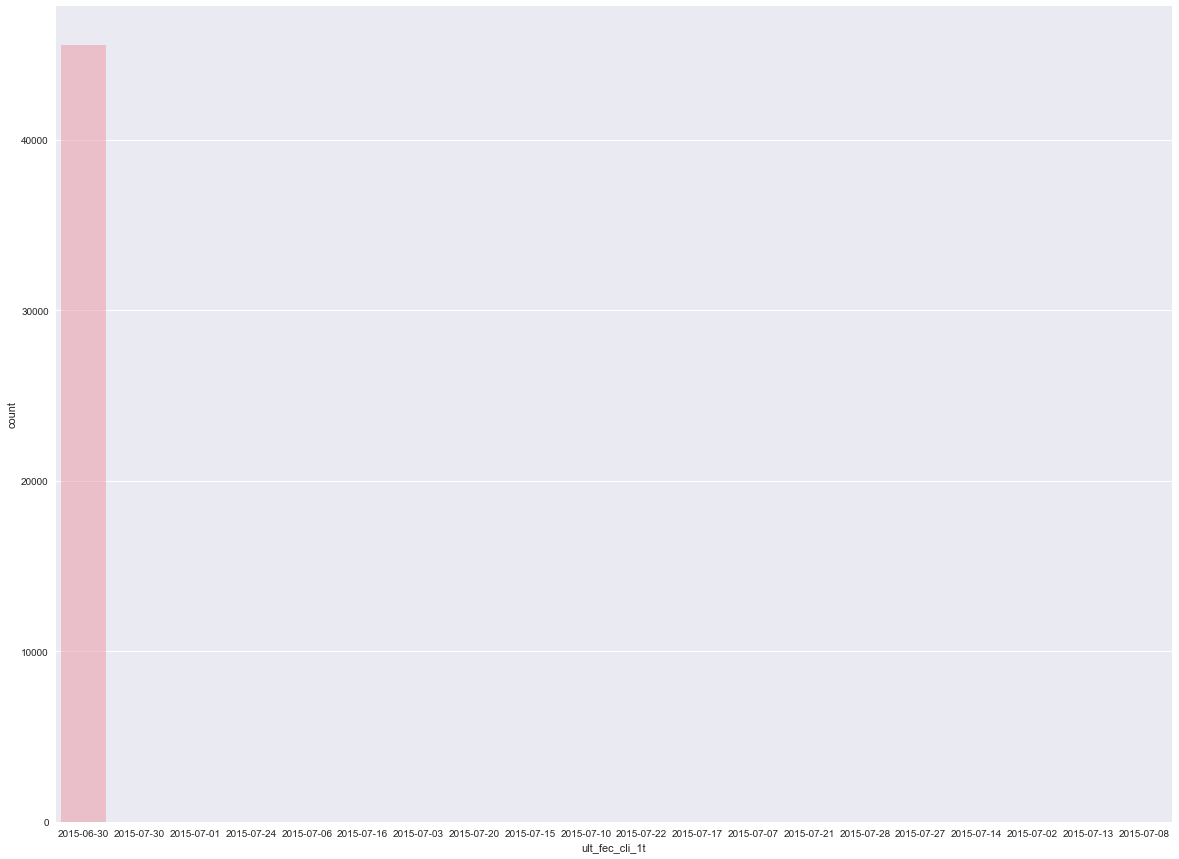

col :  indrel_1mes


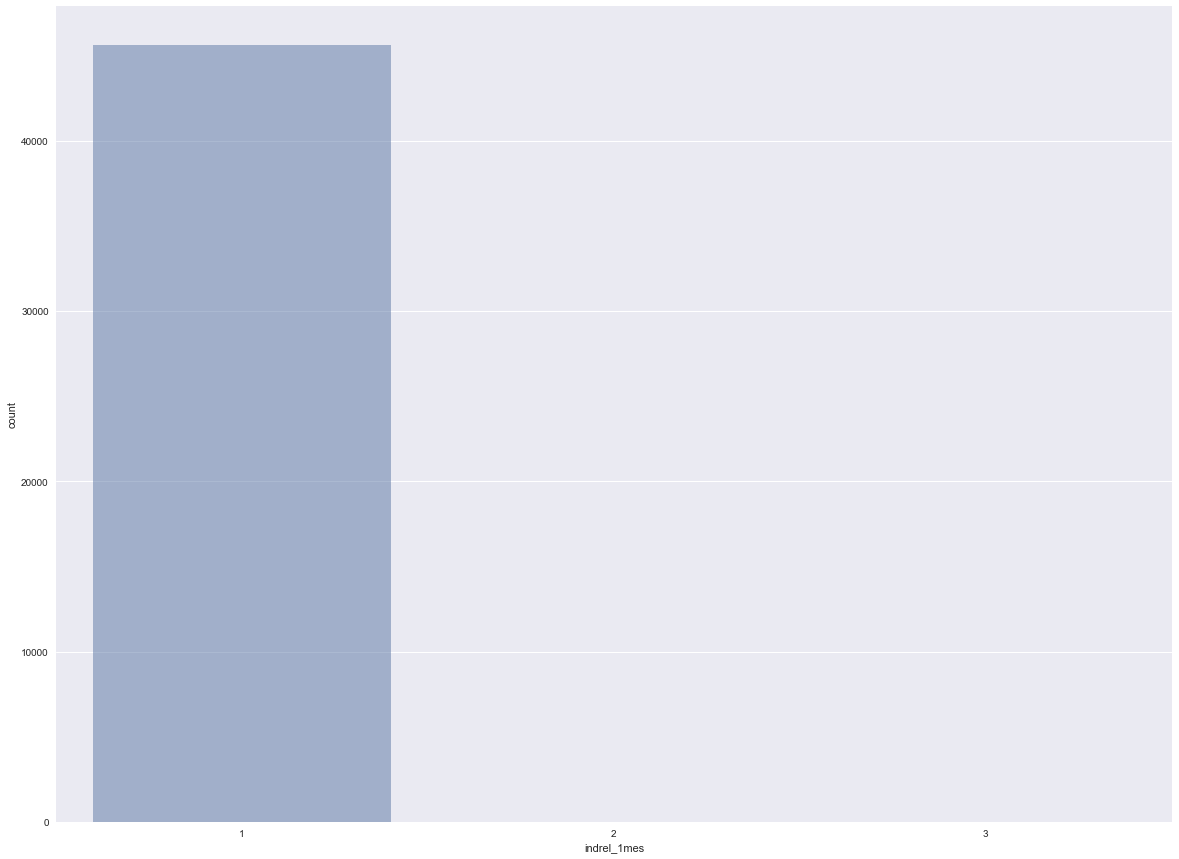

col :  tiprel_1mes


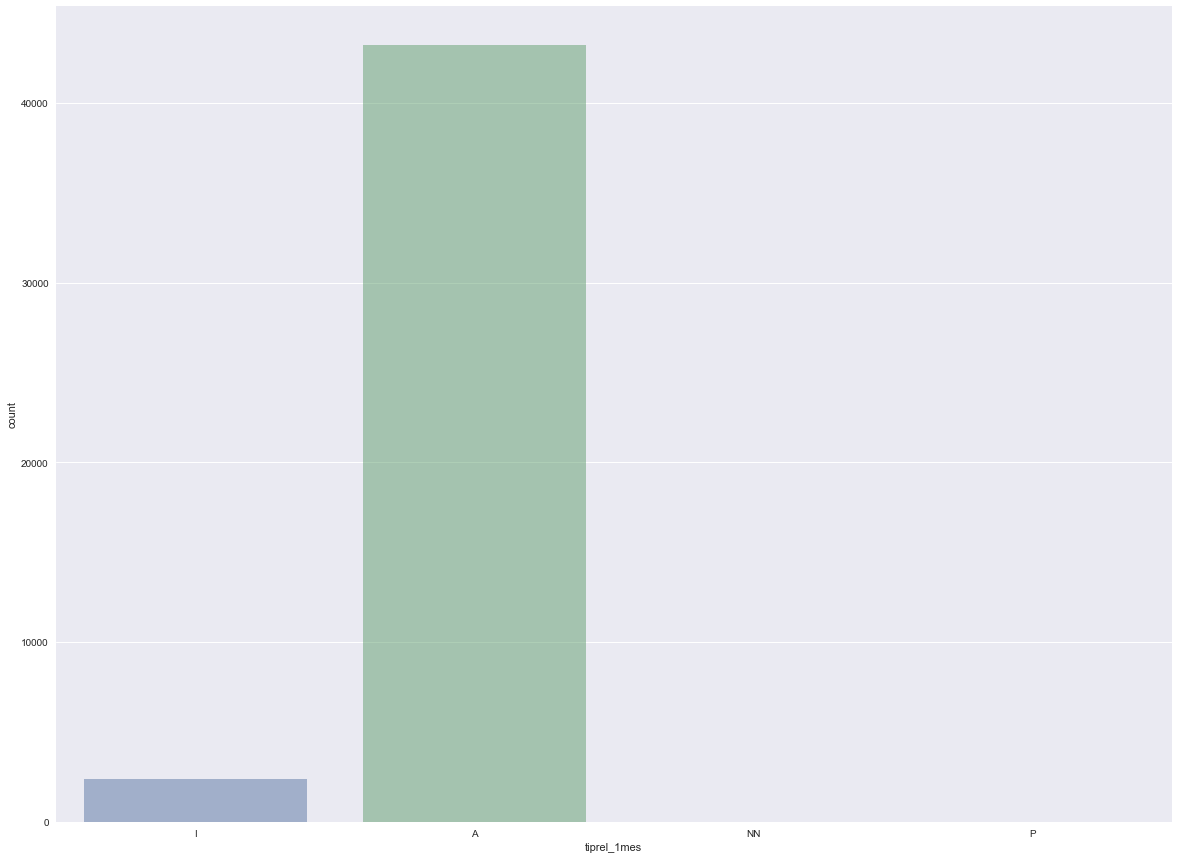

col :  indresi


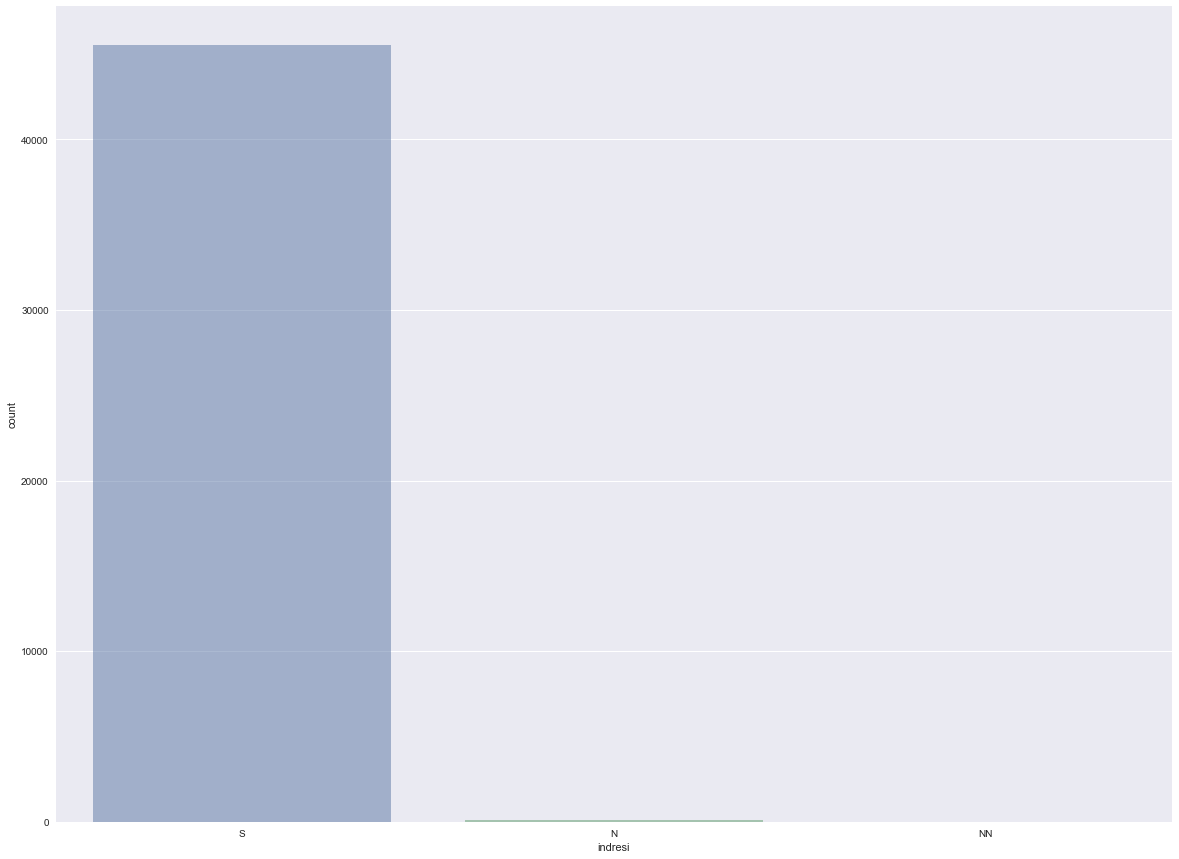

col :  indext


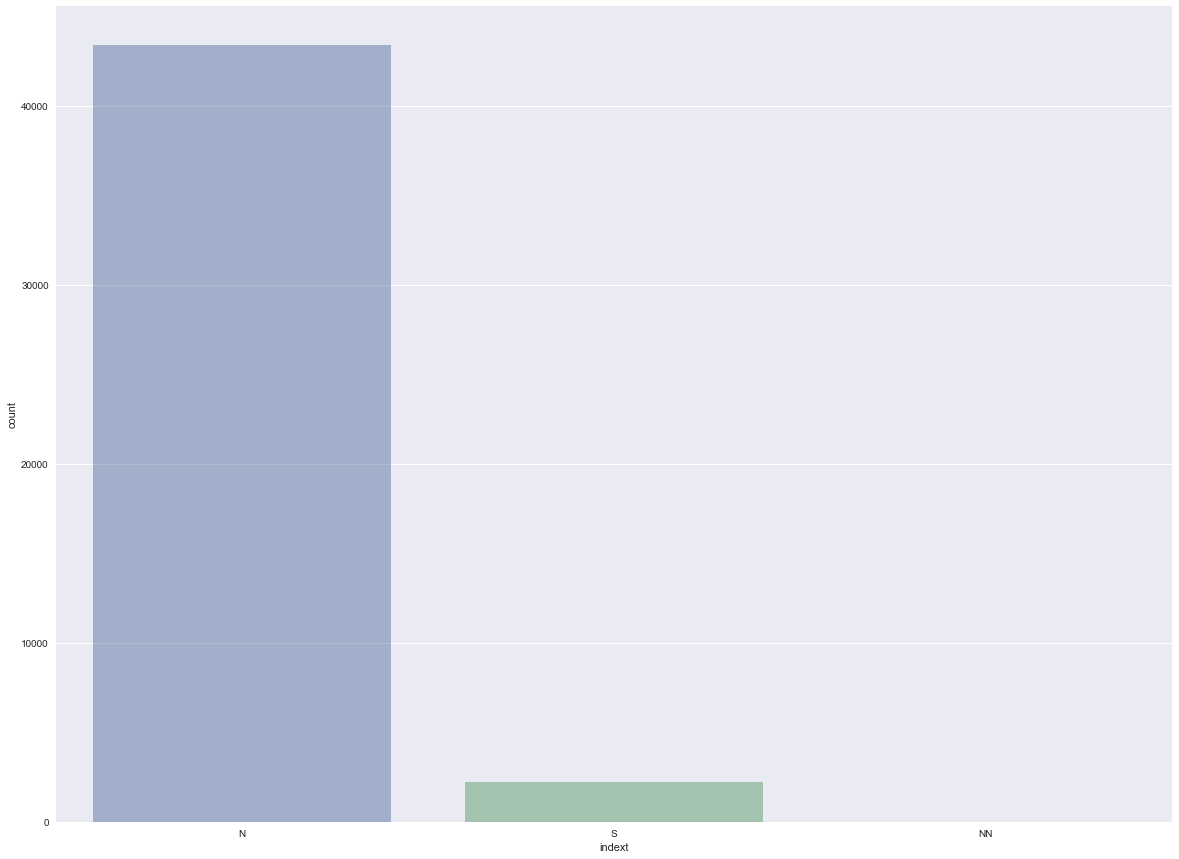

col :  conyuemp


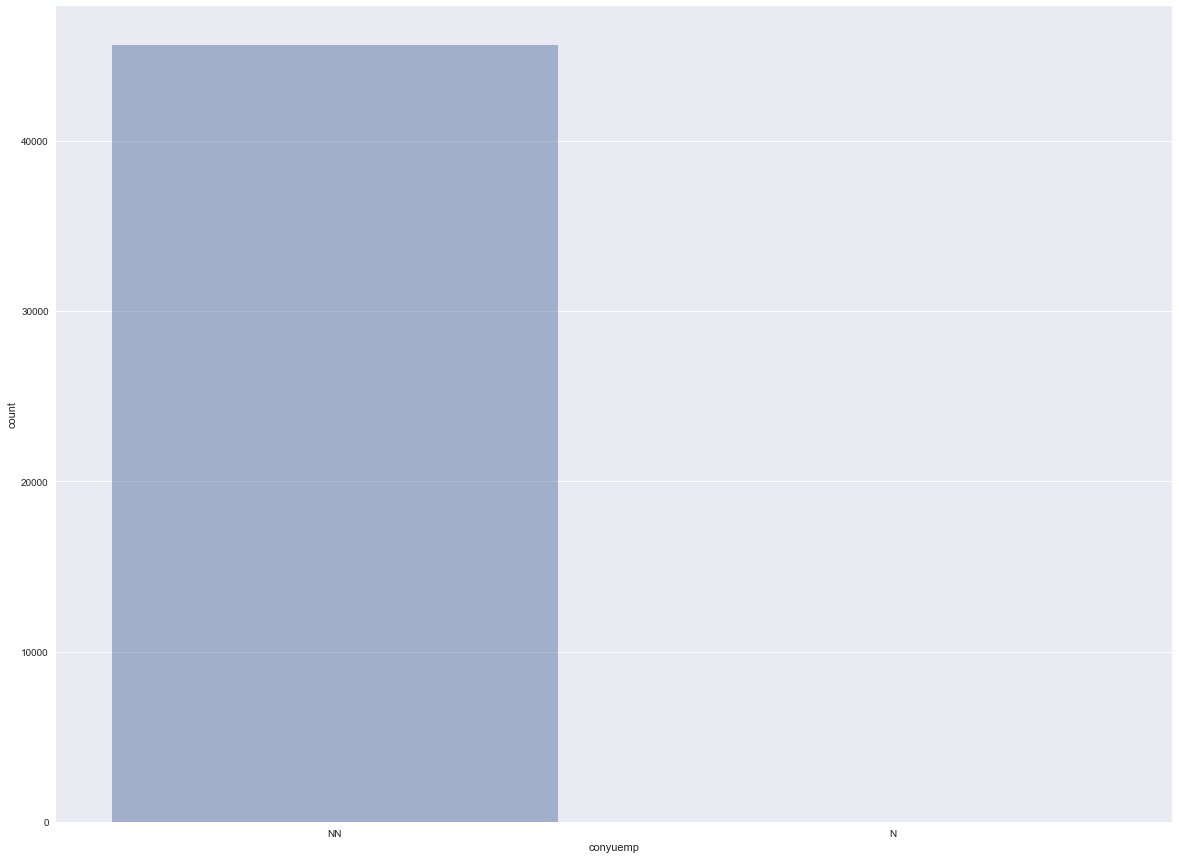

col :  canal_entrada


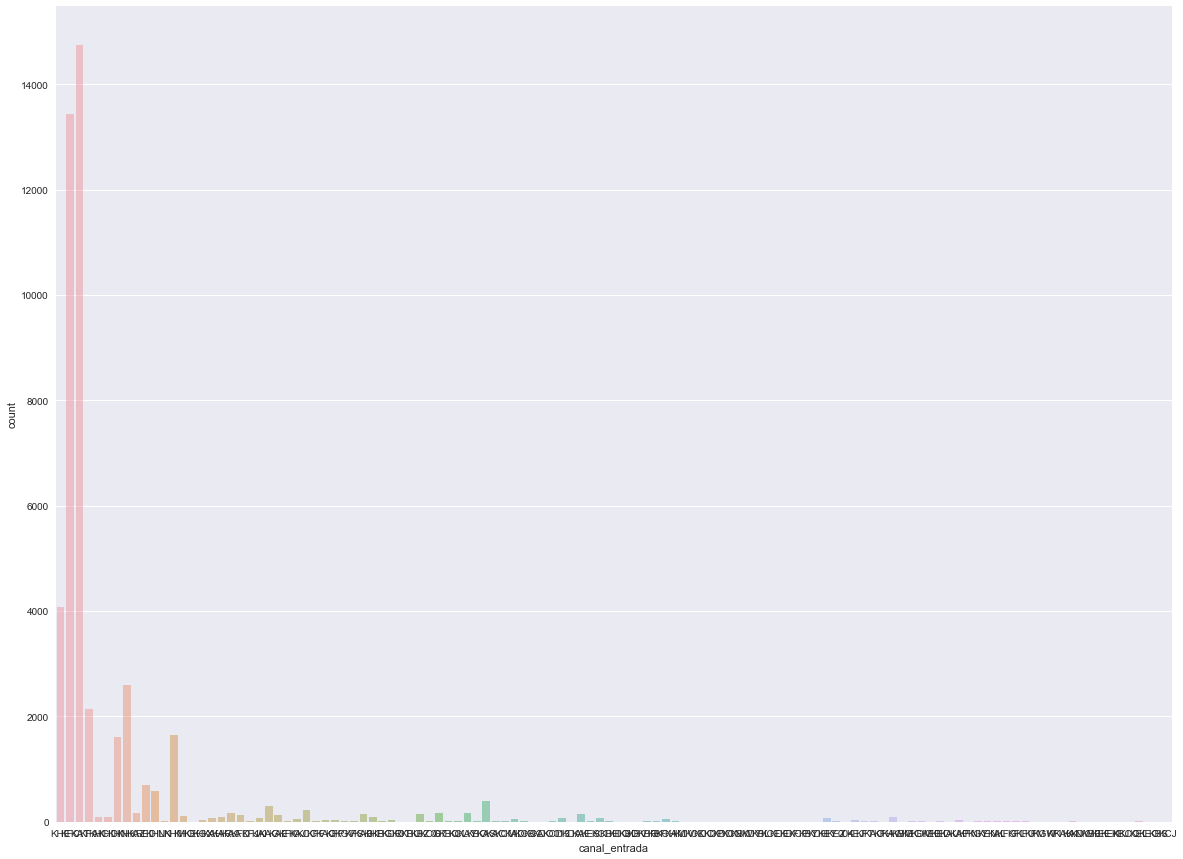

col :  indfall


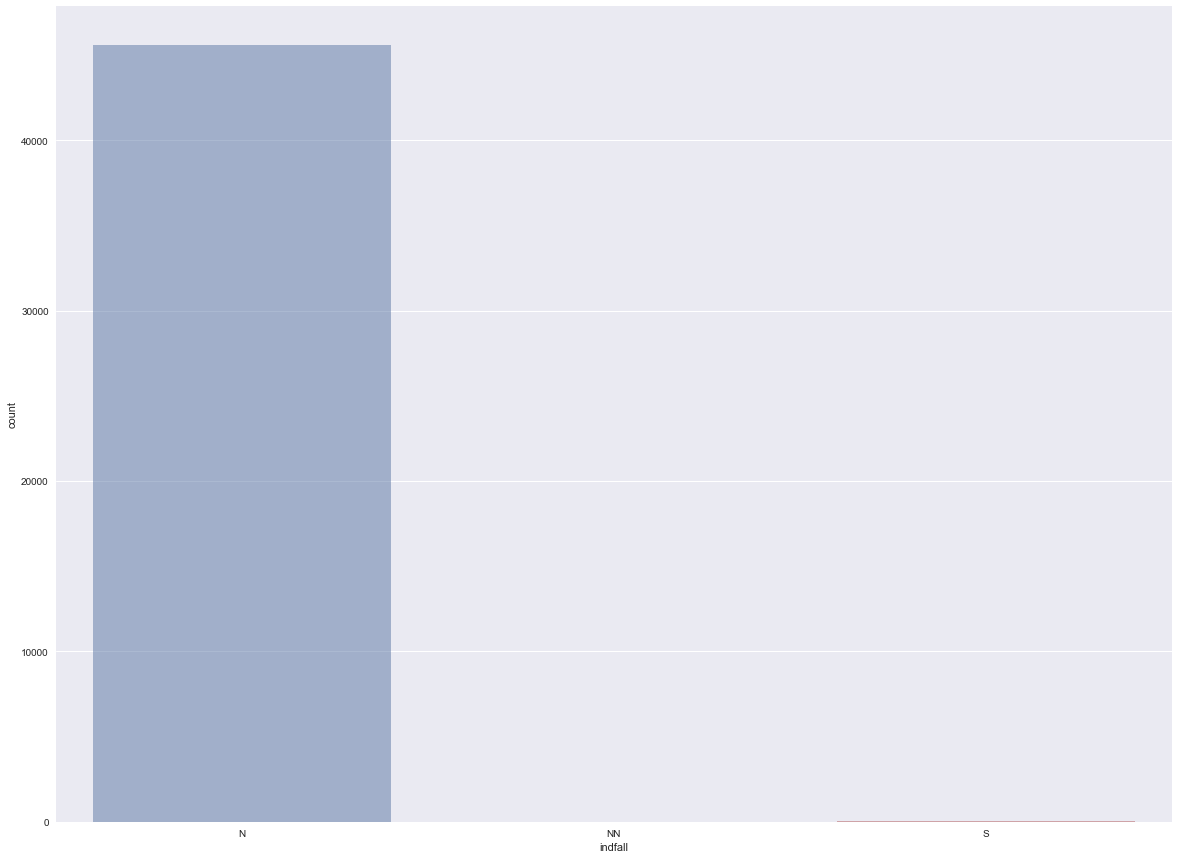

col :  cod_prov


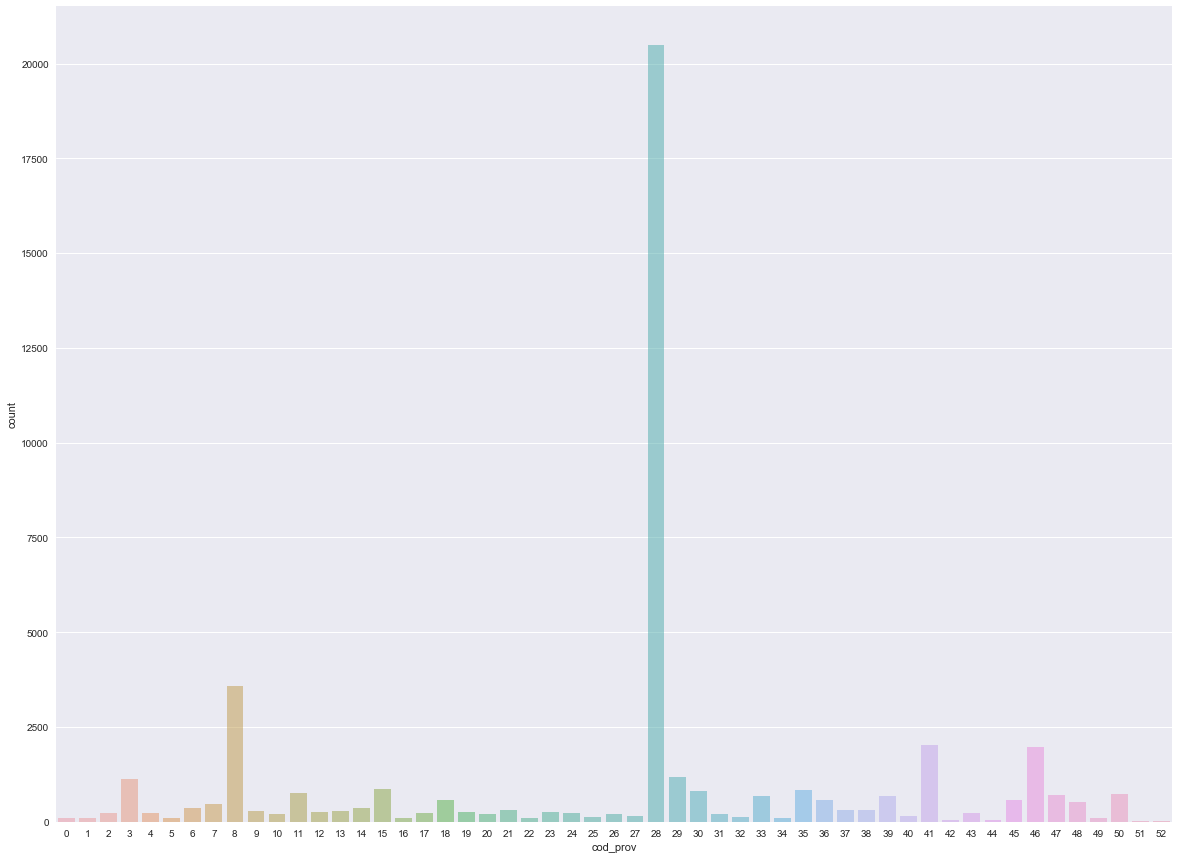

col :  nomprov


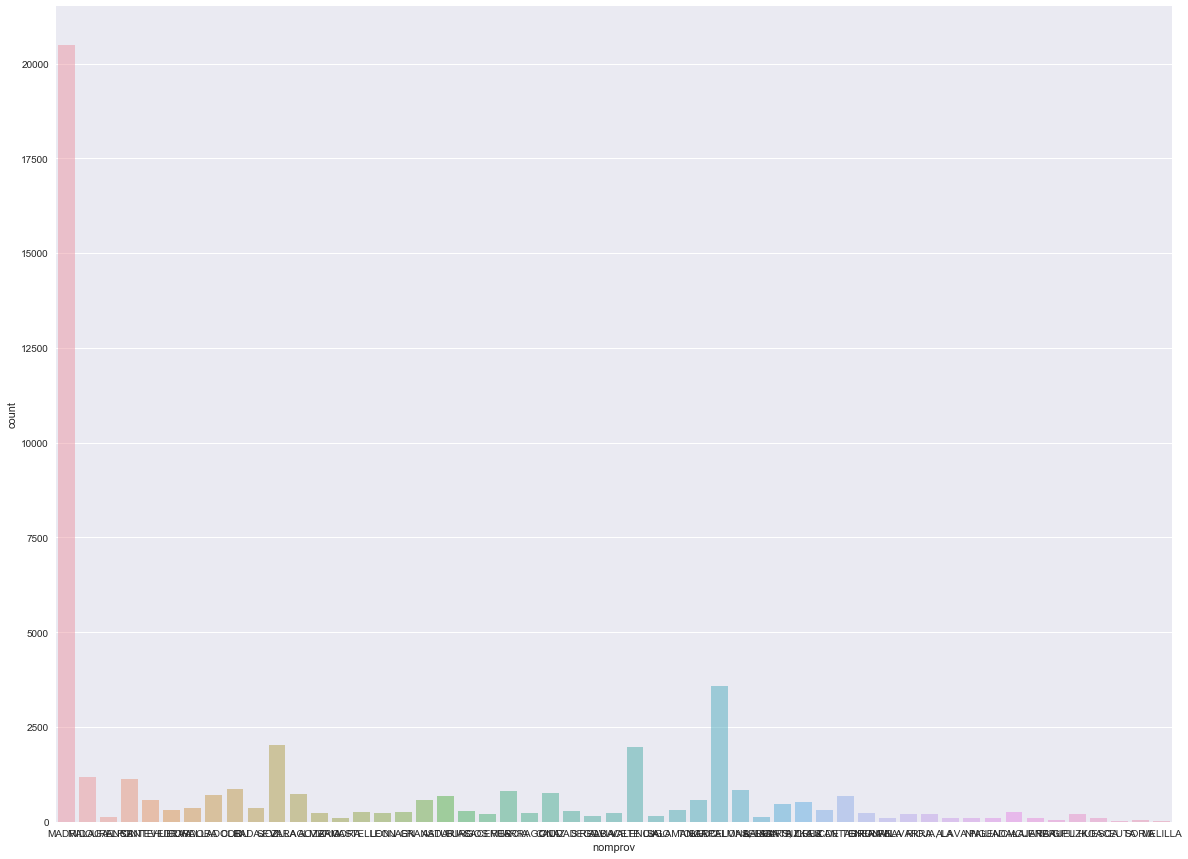

col :  ind_actividad_cliente


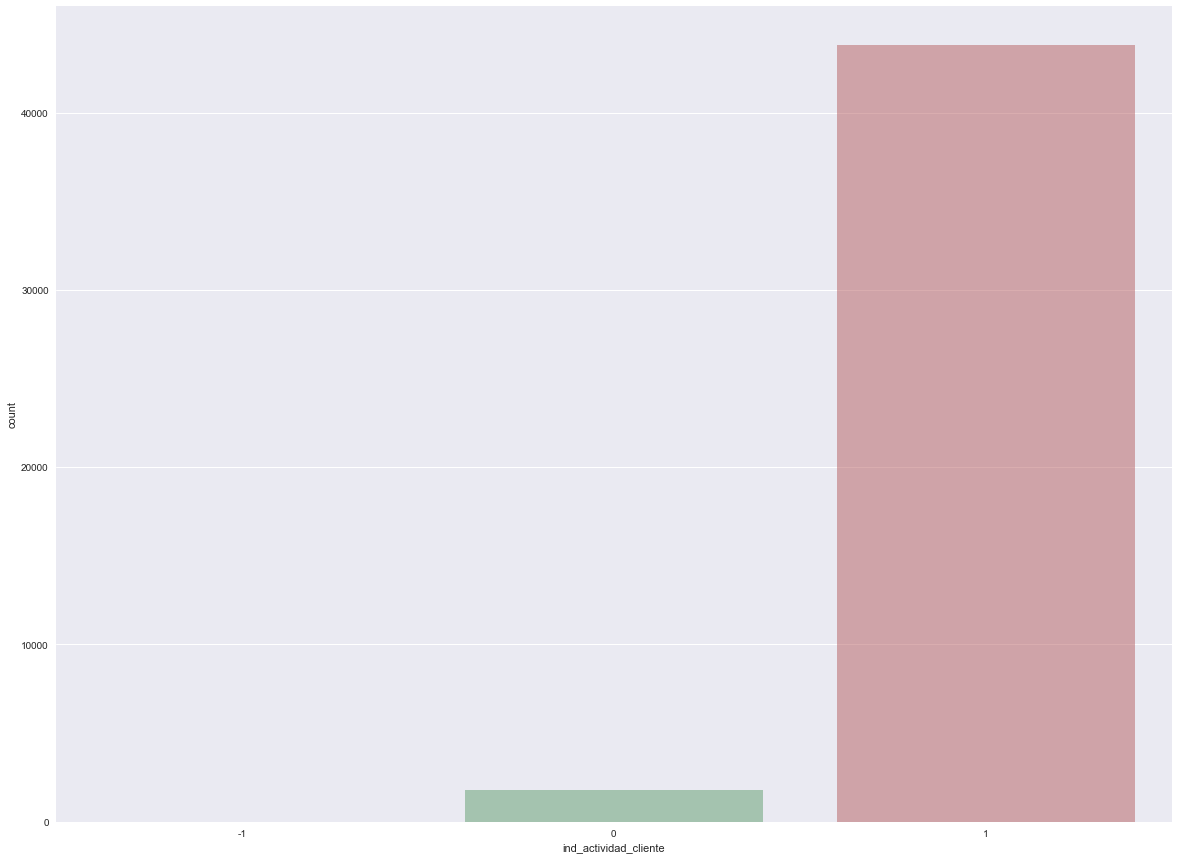

col :  renta


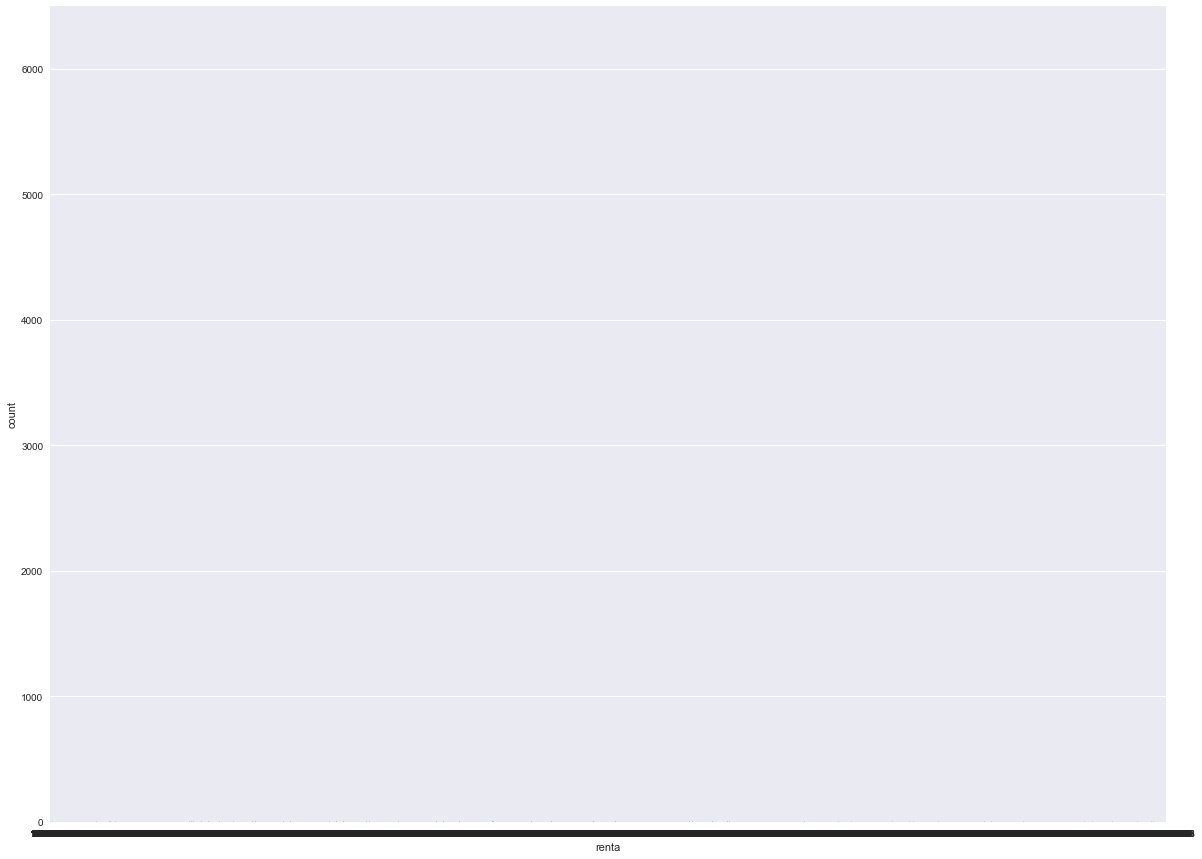

col :  segmento


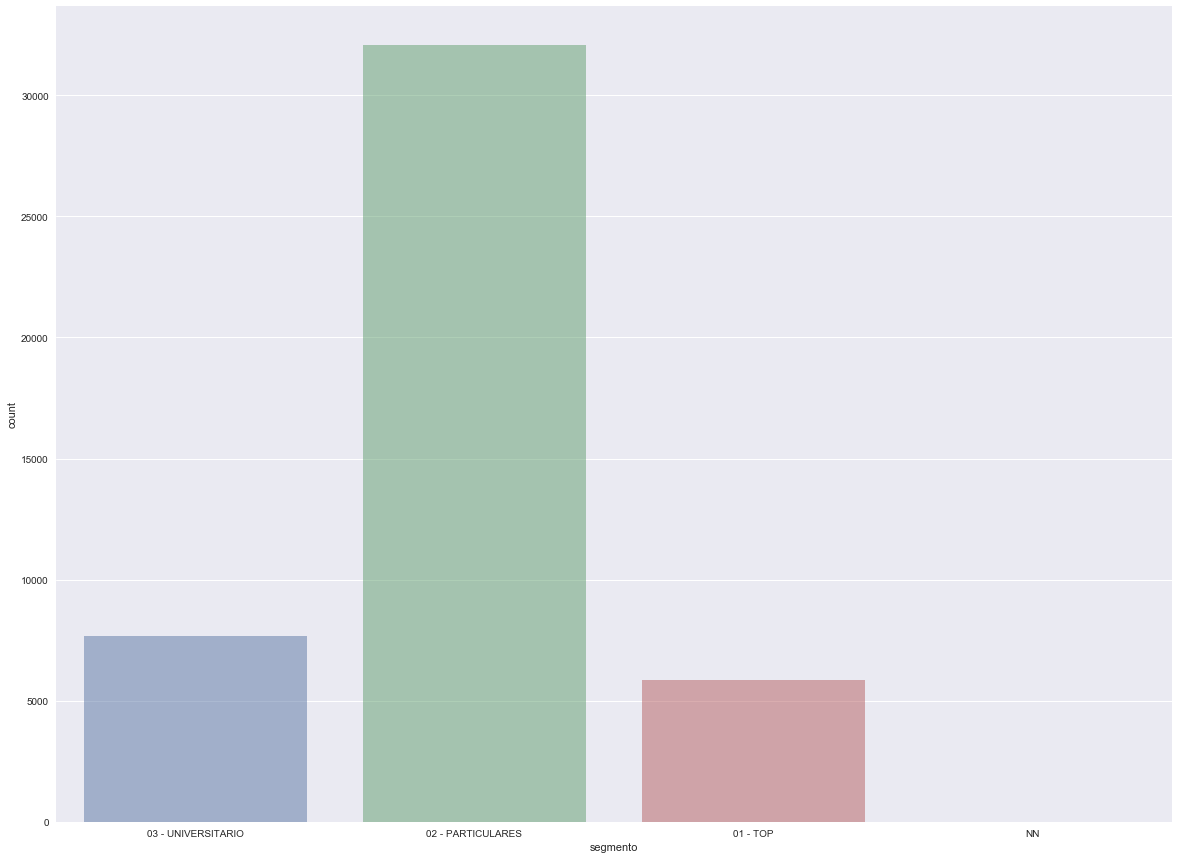

337.0 secs


In [28]:
st = time.time()

skip_cols = ['ncodpers']
# histogram of features
for col in trn.columns:
    if col in skip_cols:
        continue
    print '='*50
    print 'col : ', col
    f, ax = plt.subplots(figsize=(20, 15))
    sns.countplot(x=col, data=trn, alpha=0.5)
    plt.show()
    
print_time(time.time(),st)
# 363 secs

In [29]:
# refresh kernel for memory release

### 08 EDA on Clean Data _ Scatterplot against target

In [30]:
trn = pd.read_csv('../input/train_clean.csv')
tst = pd.read_csv('../input/test_clean.csv')
target = pd.read_csv('../input/train.csv', usecols=['target'])
trn['target'] = target

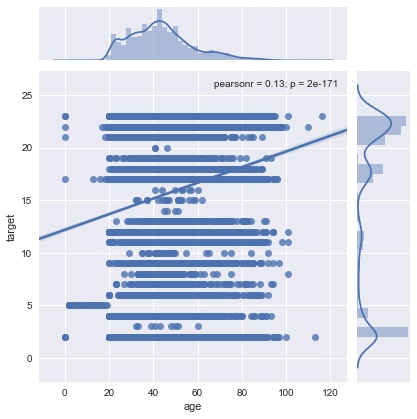

In [31]:
# three types of scatterplot
sns.jointplot('age', "target", data=trn, kind="reg")

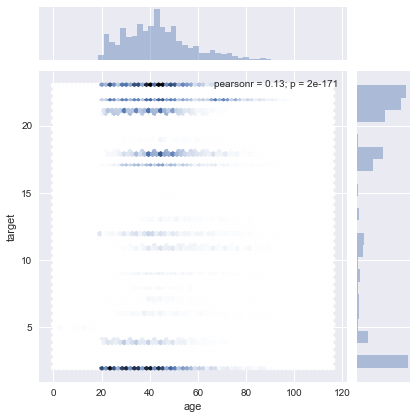

In [32]:
sns.jointplot('age', "target", data=trn, kind="hex")

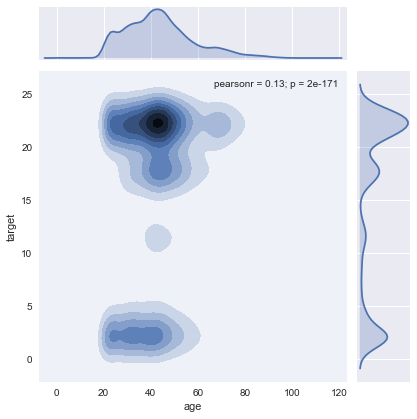

In [33]:
sns.jointplot('age', "target", data=trn, kind="kde")

In [34]:
# check number_cols and category_cols
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45619 entries, 0 to 45618
Data columns (total 24 columns):
fecha_dato               45619 non-null object
ncodpers                 45619 non-null int64
ind_empleado             45619 non-null object
pais_residencia          45619 non-null object
sexo                     45619 non-null object
age                      45619 non-null int64
fecha_alta               45619 non-null object
ind_nuevo                45619 non-null int64
antiguedad               45619 non-null int64
indrel                   45619 non-null int64
ult_fec_cli_1t           45619 non-null object
indrel_1mes              45619 non-null int64
tiprel_1mes              45619 non-null object
indresi                  45619 non-null object
indext                   45619 non-null object
conyuemp                 45619 non-null object
canal_entrada            45619 non-null object
indfall                  45619 non-null object
cod_prov                 45619 non-null int64
nompr

In [35]:
category_cols = ['fecha_dato','ind_empleado','pais_residencia','sexo','fecha_alta','ult_fec_cli_1t',\
                 'tiprel_1mes','indresi','indext','conyuemp','canal_entrada','indfall','nomprov','segmento']

col :  ind_empleado


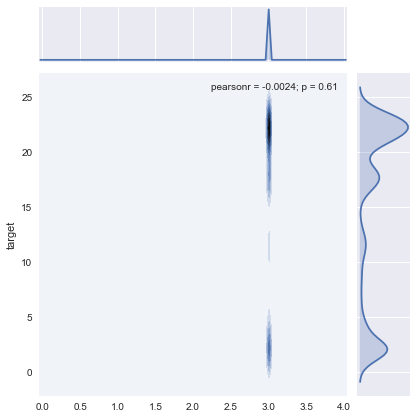

col :  pais_residencia


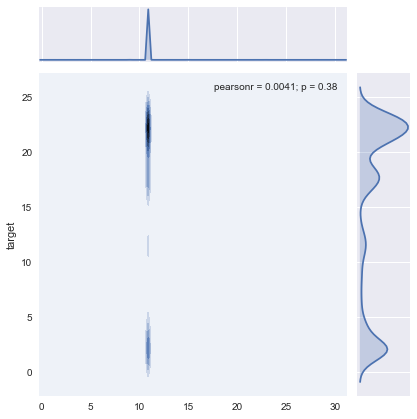

col :  sexo


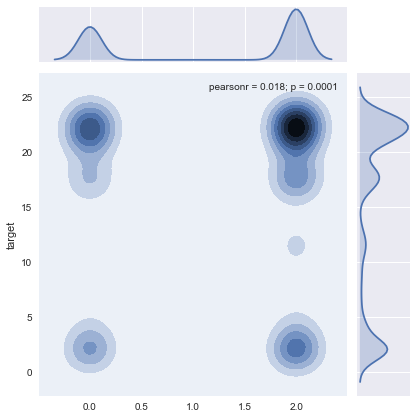

col :  age


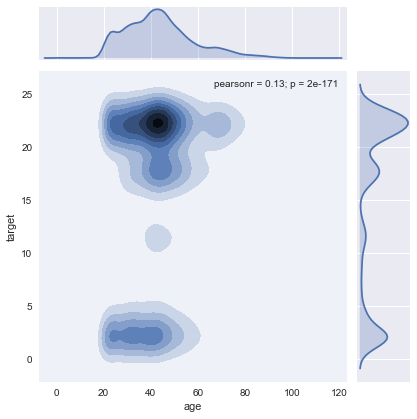

col :  fecha_alta


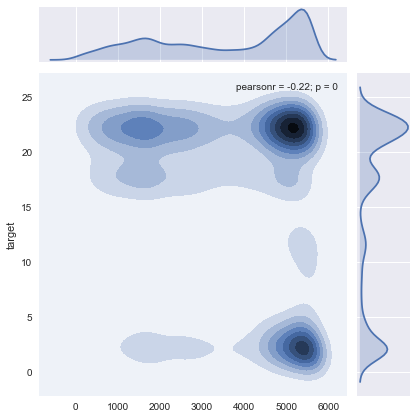

col :  ind_nuevo


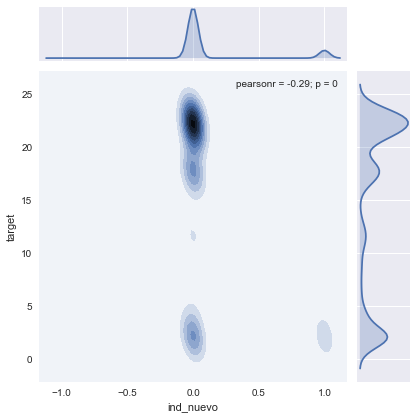

col :  antiguedad


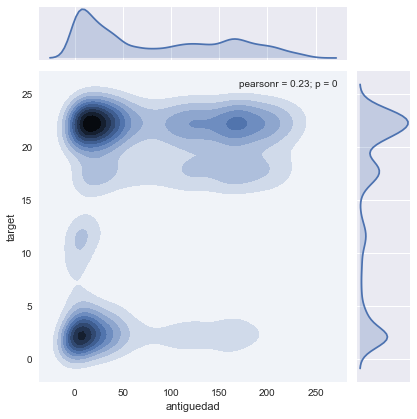

col :  indrel


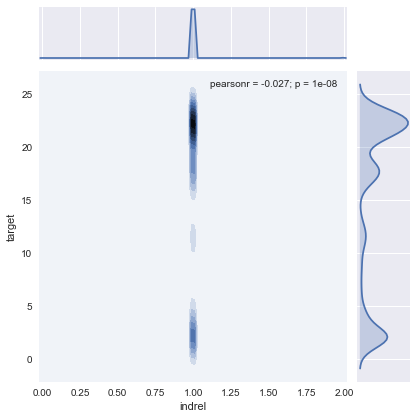

col :  ult_fec_cli_1t


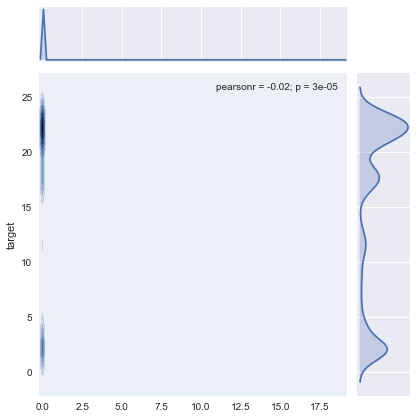

col :  indrel_1mes


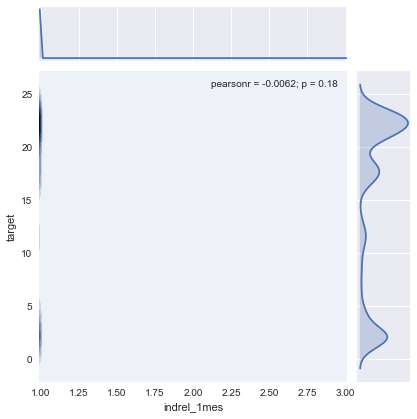

col :  tiprel_1mes


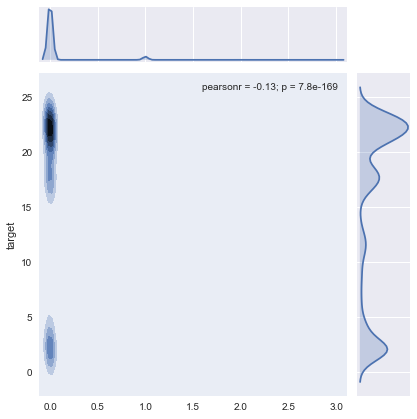

col :  indresi


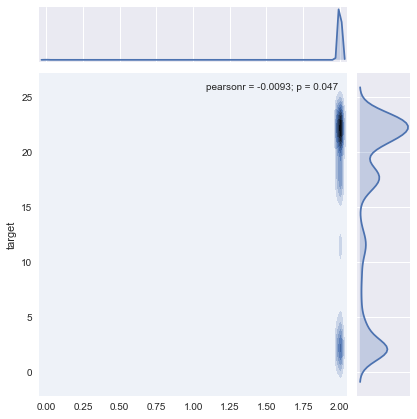

col :  indext


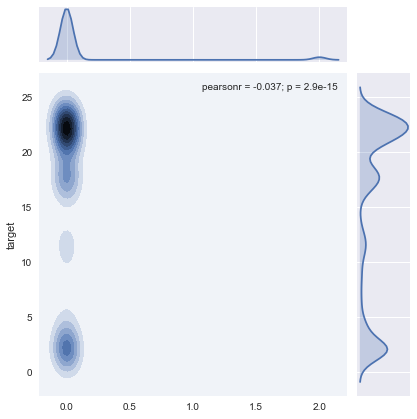

col :  conyuemp


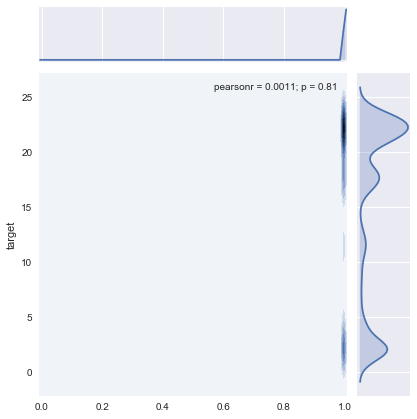

col :  canal_entrada


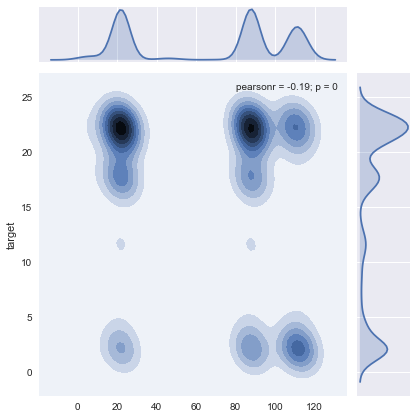

col :  indfall


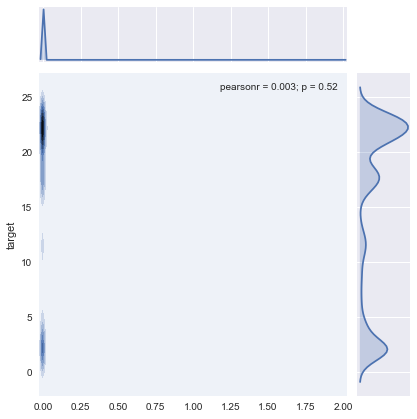

col :  cod_prov


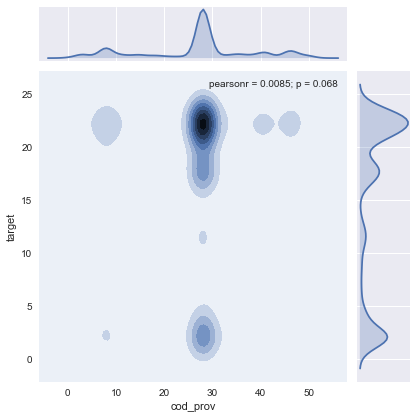

col :  nomprov


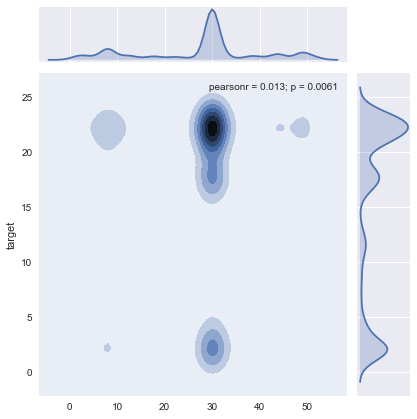

col :  ind_actividad_cliente


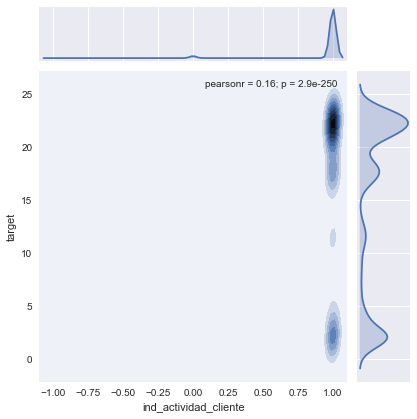

col :  renta


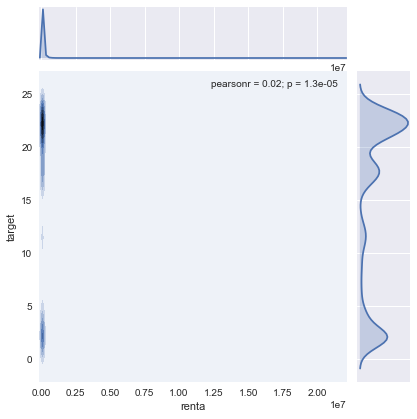

col :  segmento


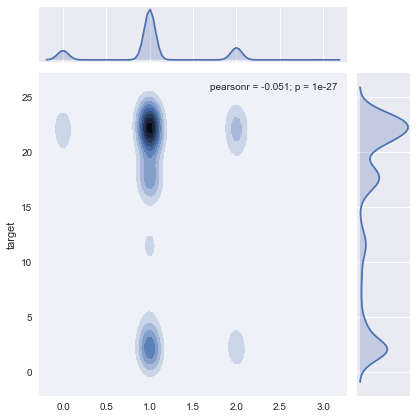

291.0 secs


In [36]:
st = time.time()

lb = LabelEncoder()
skip_cols = ['fecha_dato','ncodpers','target']
# histogram of features
for col in trn.columns:
    if col in skip_cols:
        continue
    print '='*50
    print 'col : ', col

    # check category or number
    if col in category_cols:
        x = lb.fit_transform(trn[col])
    else:
        x = trn[col]
    sns.jointplot(x, trn["target"], kind="kde")
    plt.show()
    
print_time(time.time(),st)
# 291.0 secs

col :  ind_empleado


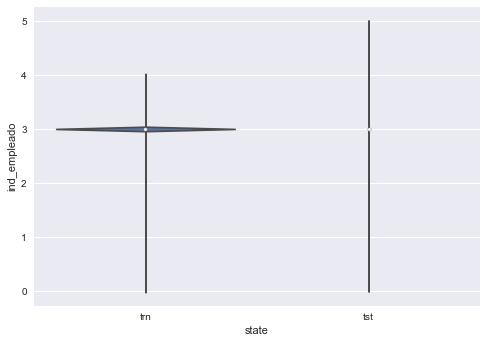

col :  pais_residencia


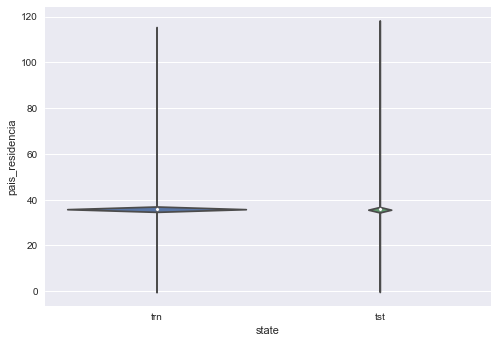

col :  sexo


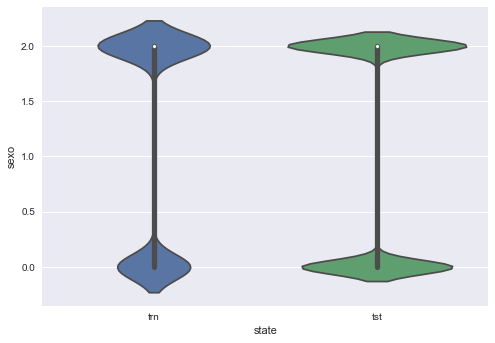

col :  age


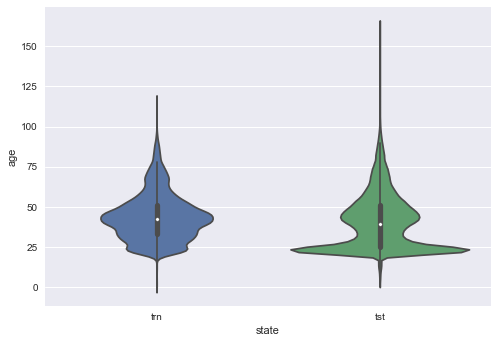

col :  fecha_alta


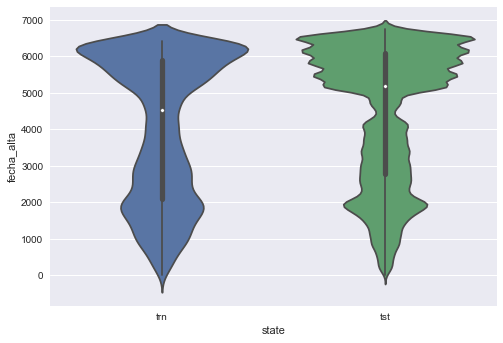

col :  ind_nuevo


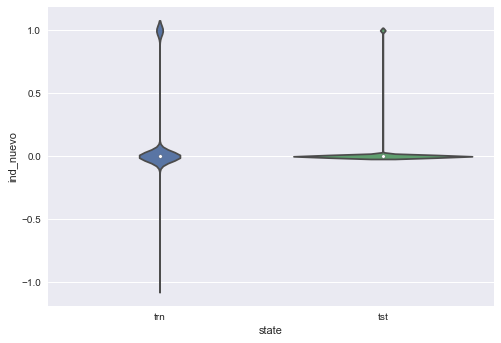

col :  antiguedad


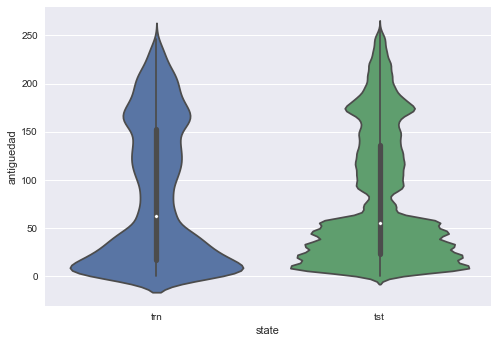

col :  indrel


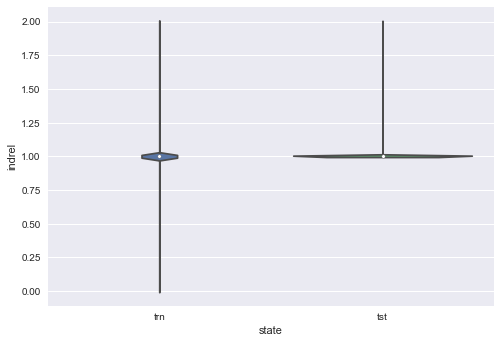

col :  ult_fec_cli_1t


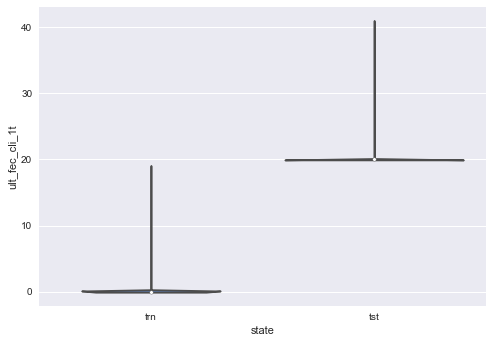

col :  indrel_1mes


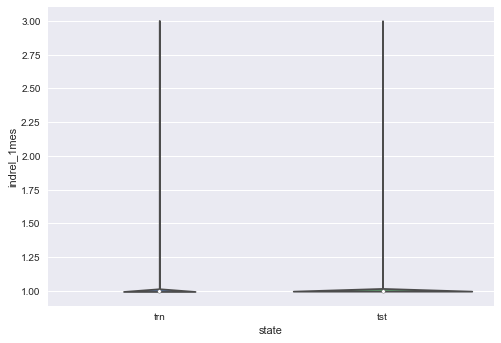

col :  tiprel_1mes


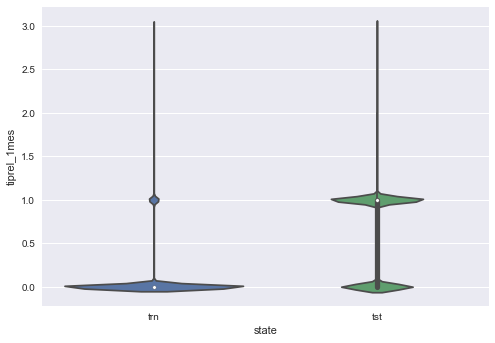

col :  indresi


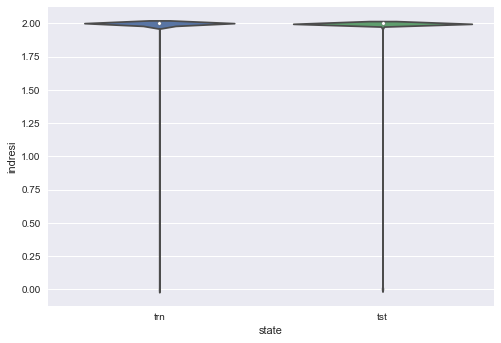

col :  indext


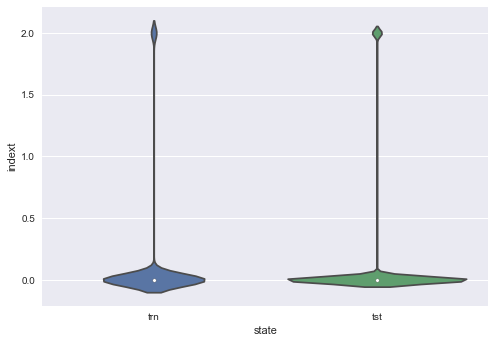

col :  conyuemp


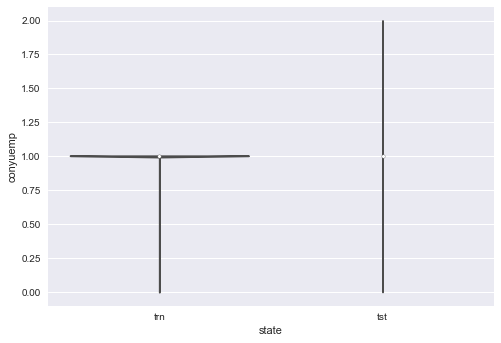

col :  canal_entrada


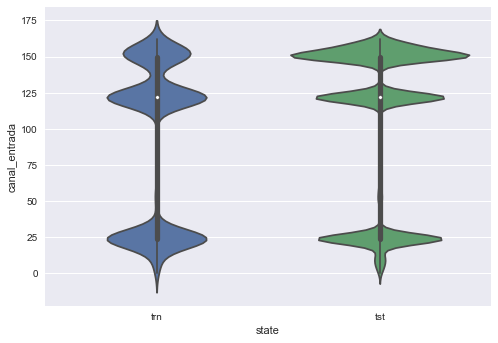

col :  indfall


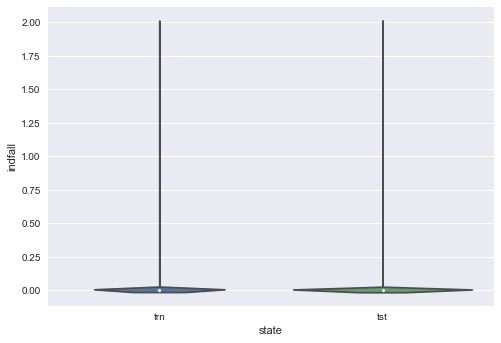

col :  cod_prov


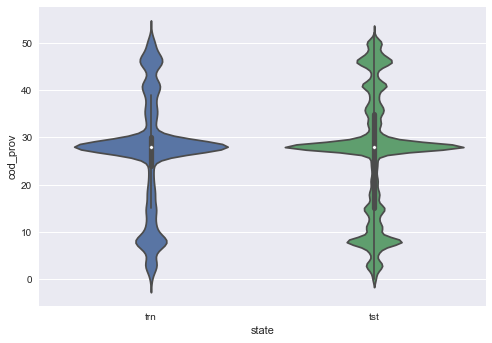

col :  nomprov


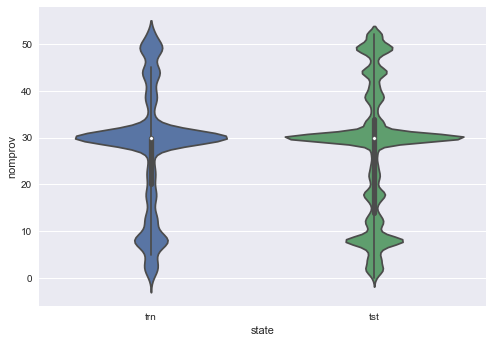

col :  ind_actividad_cliente


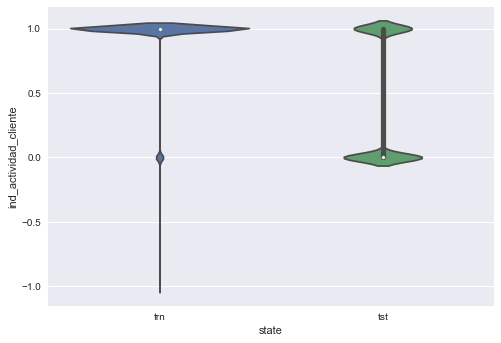

col :  renta


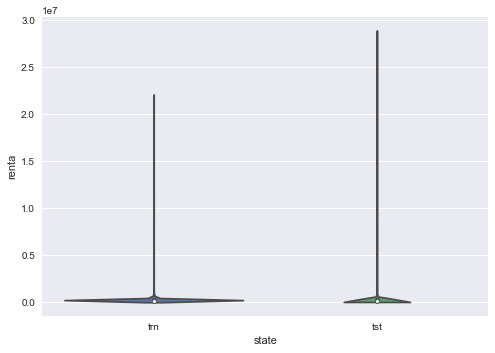

col :  segmento


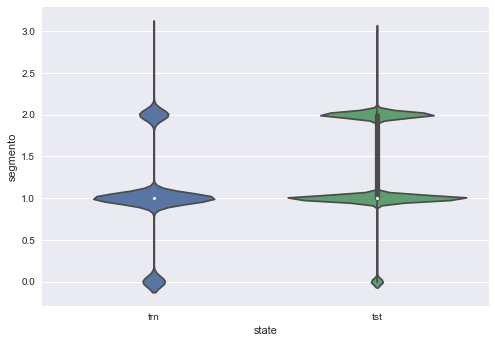

113.0 secs


In [37]:
# compare with test data
st = time.time()

lb = LabelEncoder()
skip_cols = ['fecha_dato','ncodpers','target']
# histogram of features
for col in trn.columns:
    if col in skip_cols:
        continue
    print '='*50
    print 'col : ', col

    trn_tmp = pd.DataFrame(trn[col])
    tst_tmp = pd.DataFrame(tst[col])
    trn_tmp['state'] = 'trn'
    tst_tmp['state'] = 'tst'
    tmp = pd.concat([trn_tmp, tst_tmp], axis=0)
    
    # check category or number
    if col in category_cols:
        tmp[col] = LabelEncoder().fit_transform(tmp[col])

    sns.violinplot(x="state", y=col, data=tmp)
    plt.show()
    
print_time(time.time(),st)
# 113.0 secs